<a href="https://colab.research.google.com/github/AlchemistDude/Cadenas-de-Markov-y-Aplicaciones-2024-1/blob/main/Tarea1_Markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TAREA 1 CADENAS DE MARKOV Y APLICACIONES**

---





### Integrantes:




1.   Oscar Julián Rodríguez Cardenas
2.   Tania Julieth Araque Dueñas
3.   Angela Sofia Rubiano Quintero



# Ejercicios

# 1. Implemente el algoritmo (Gibbs Sampler) visto en clase para generar muestras de una distribución que se aproxime a la distribución uniforme sobre las configuraciones factibles del modelo Hard - Core, en la rejilla cuadrada $k\times k$. ($3 \leq k \leq 20$).

  Lo ideal es que se puedan visualizar las muestras y algunos pasos de la trayectoria de la cadena de Markov que condujo a la muestra.(Sugerencia: Tome $X_{10000}$ o $X_{100000}$ como tiempo final).

In [ ]:
### Librerias

import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import networkx as nx
import random


In [ ]:
## Variables para el experimento

dimension = 20 # k
iteration_total = 100000   # X

In [ ]:
def valid_placement(matrix, row, col):

    # Verifica si una posición es válida en el modelo Hard Core

    offsets = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for d_row, d_col in offsets:
        n_row, n_col = row + d_row, col + d_col
        if 0 <= n_row < dimension and 0 <= n_col < dimension:
            if matrix[n_row, n_col]:  # Existe un vecino ocupado
                return False
    return True

In [ ]:
def visualize_configuration(config, step, interval=100):

  # Visualizar el estado del tablero por cada x iteraciones

    if step % interval == 0:
        plt.imshow(config, interpolation='nearest', vmin=0, vmax=1)
        plt.title(f'Tablero en el paso {step}')
        plt.colorbar()
        plt.show()


In [ ]:
def hard_core_gibbs(dimension, iteration_total, interval=100, color_map='bone'):

    # Algoritmo de Gibbs

    # Inicializar todo en 0's (No hay particulas)
    config = np.zeros((dimension, dimension), dtype=np.int8)

    for step in range(1, iteration_total + 1):
        # Escoger al azar un lugar
        row, col = random.randint(0, dimension - 1), random.randint(0, dimension - 1)


        if config[row, col] == 0 and valid_placement(config, row, col):
            config[row, col] = 1  # Poner
        elif config[row, col] == 1:
            config[row, col] = 0  # Quitar


        visualize_configuration(config, step, interval)

    return config

Ahora veamos algunas ejecuciones para valores de $k$ y $X$ distintos:

**Para $k = 3$ y $X_{10000}$**

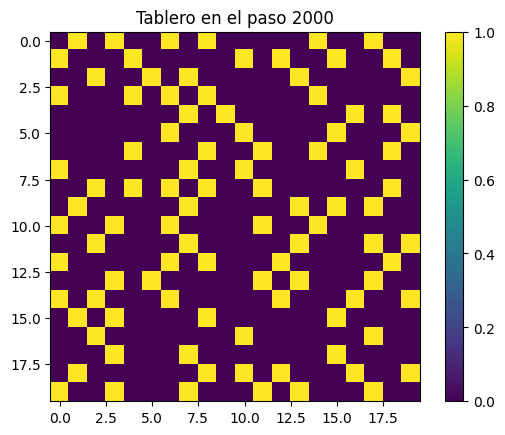

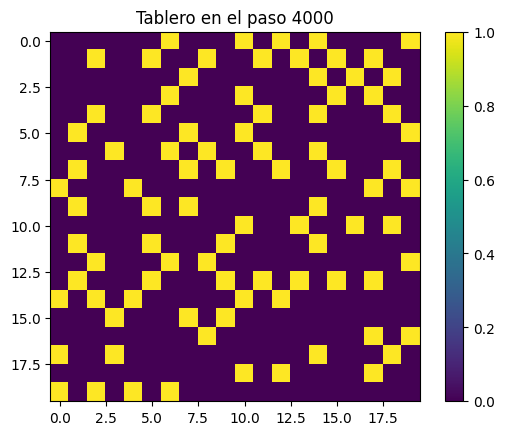

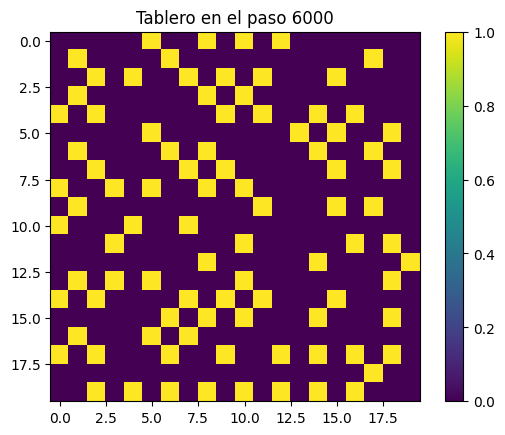

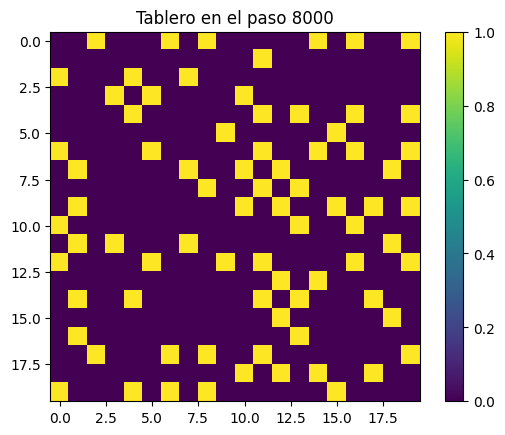

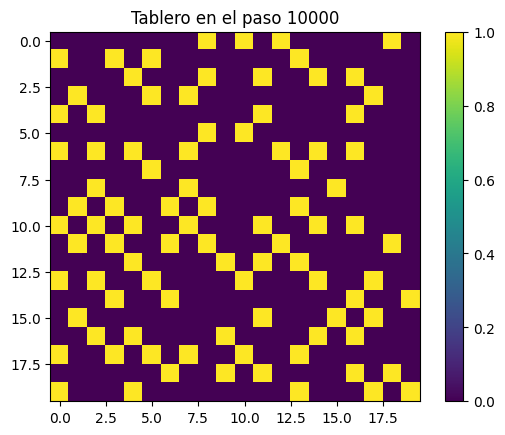

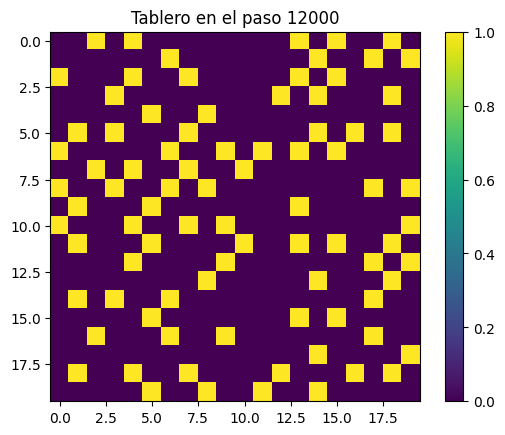

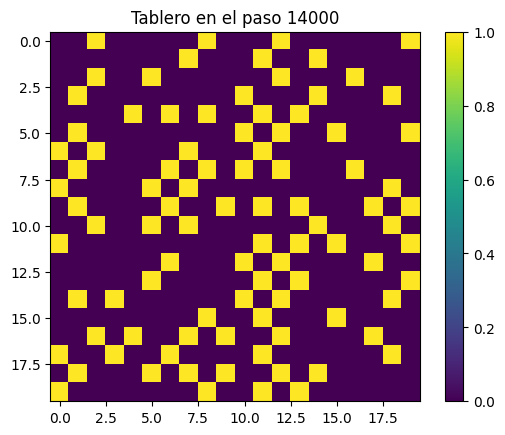

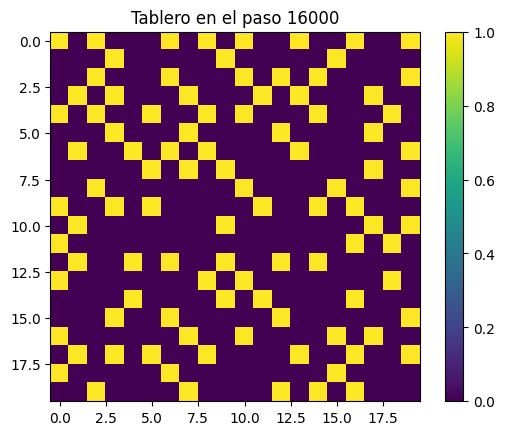

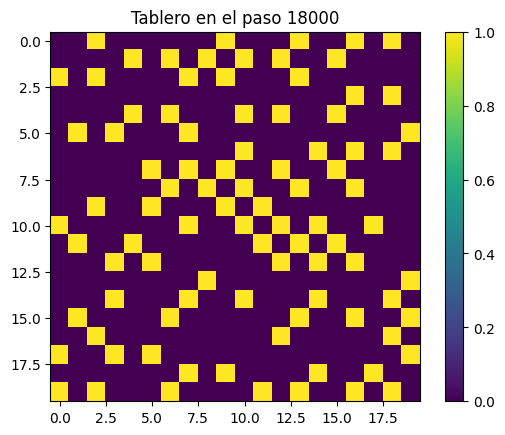

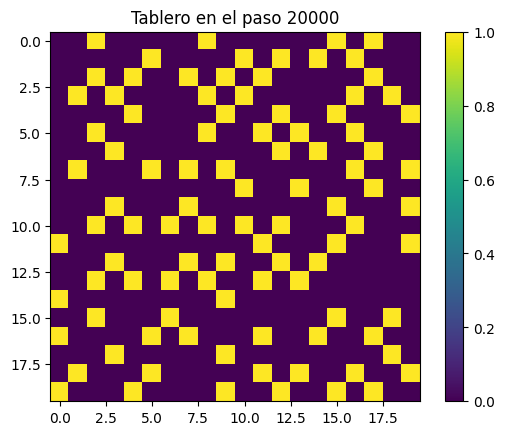

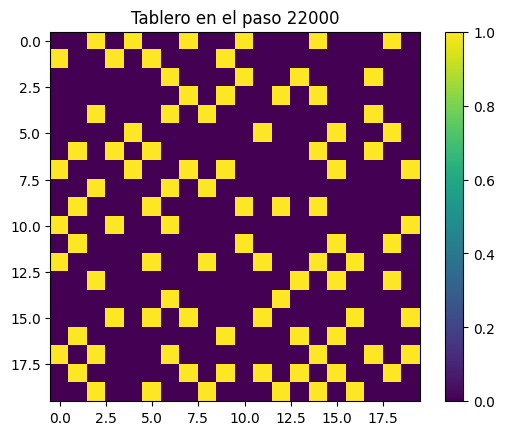

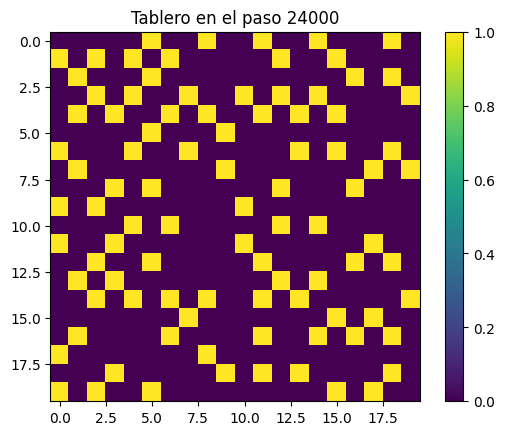

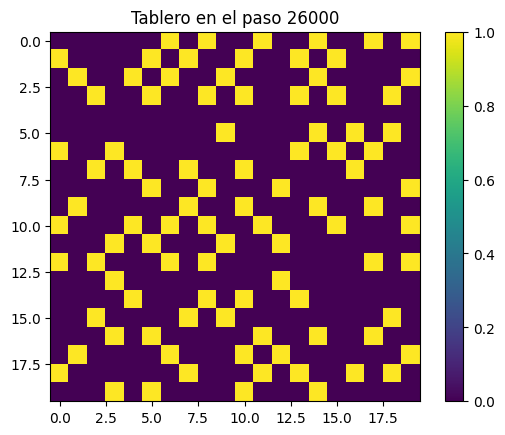

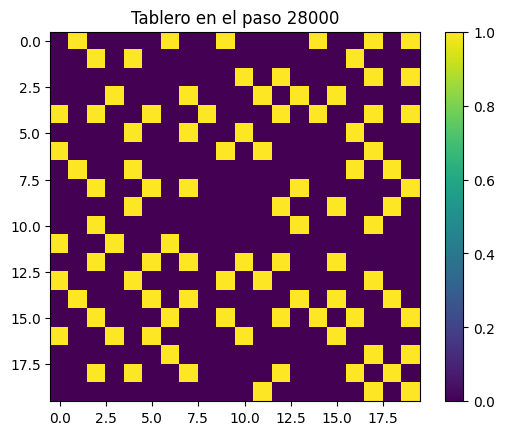

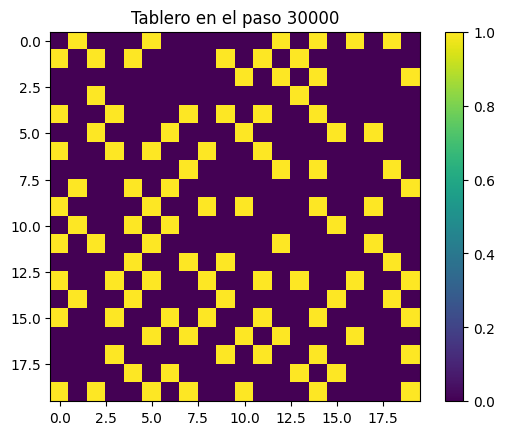

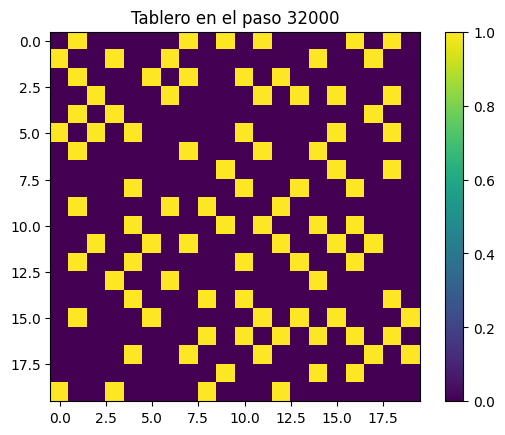

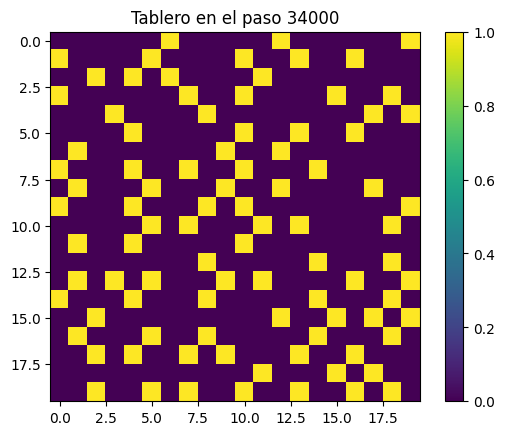

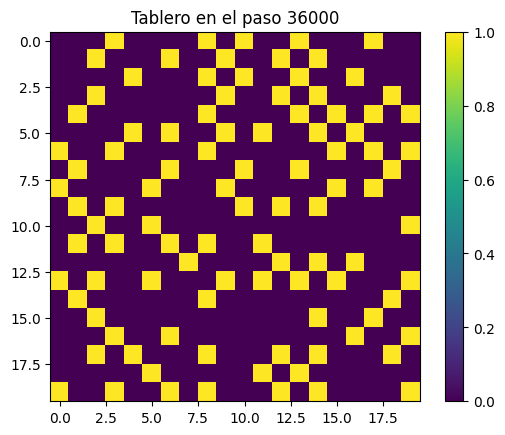

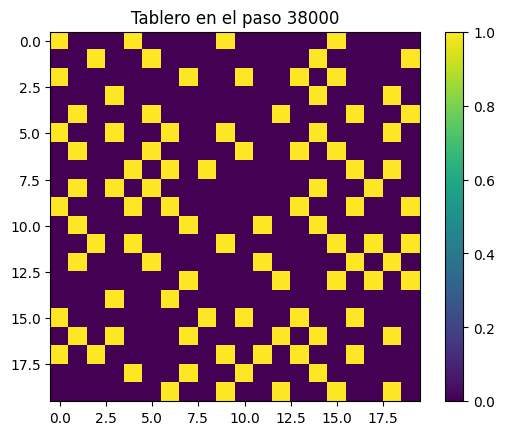

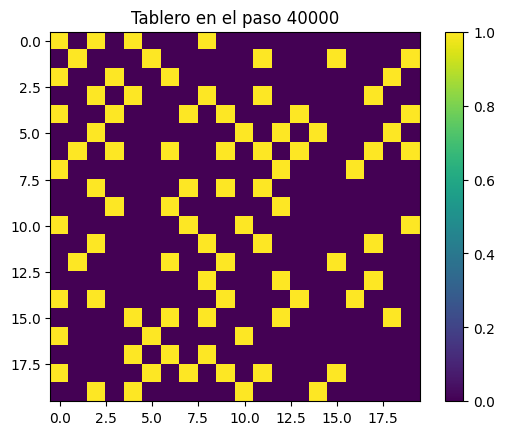

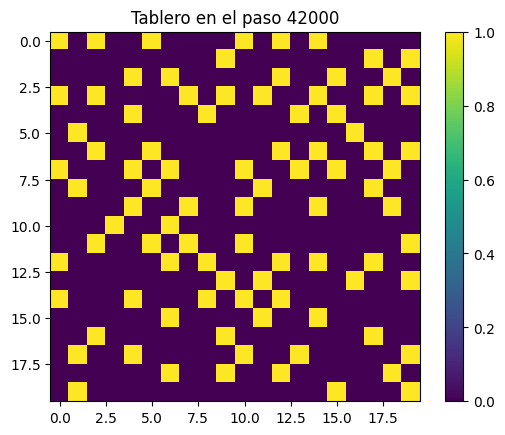

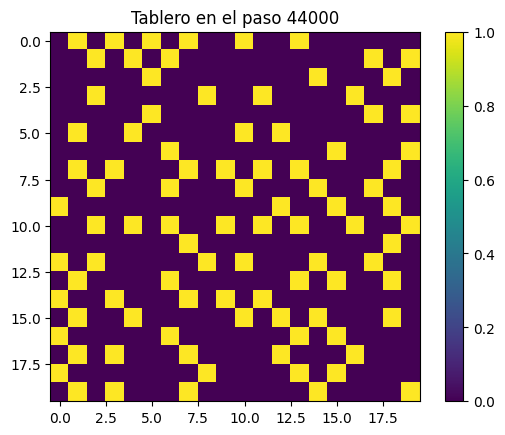

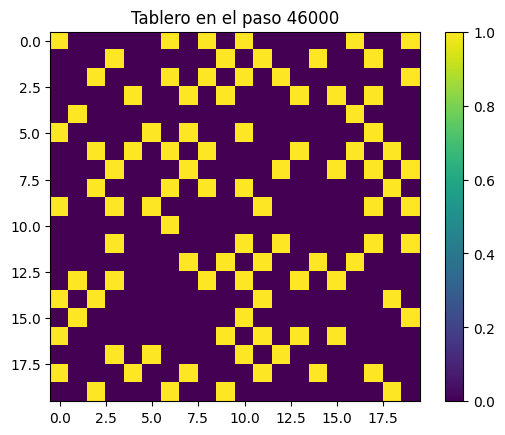

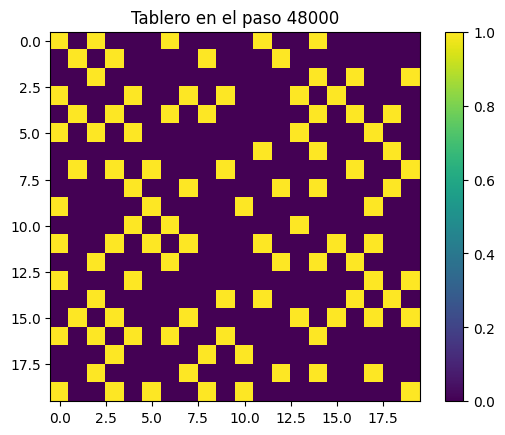

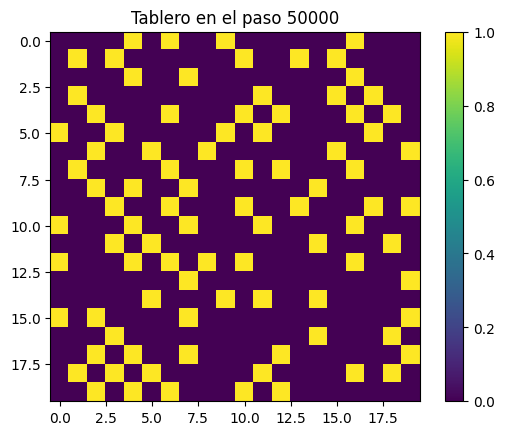

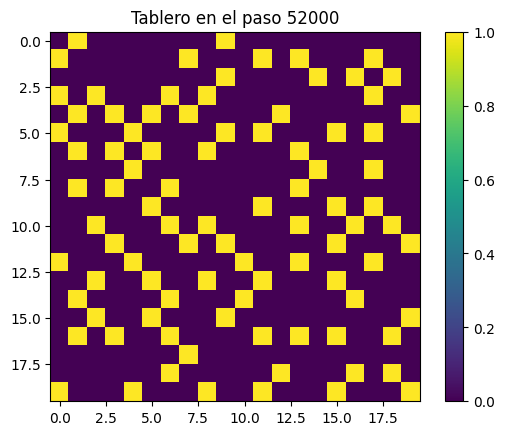

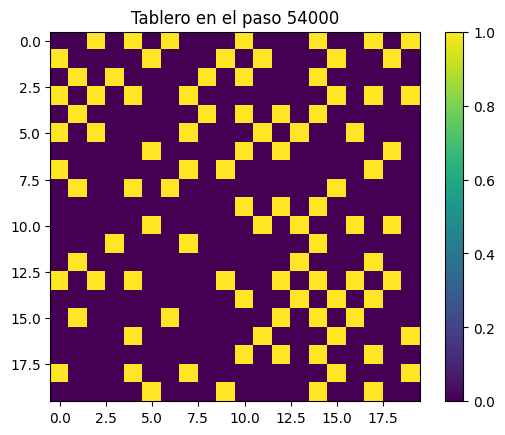

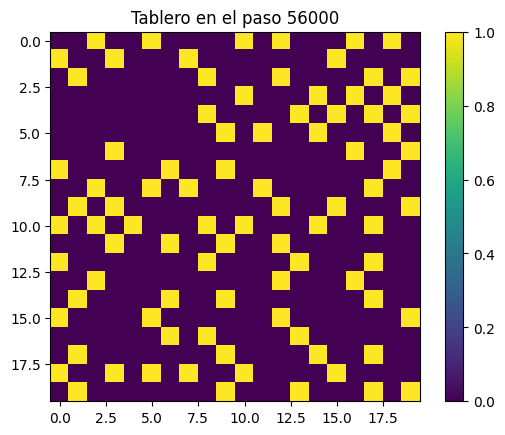

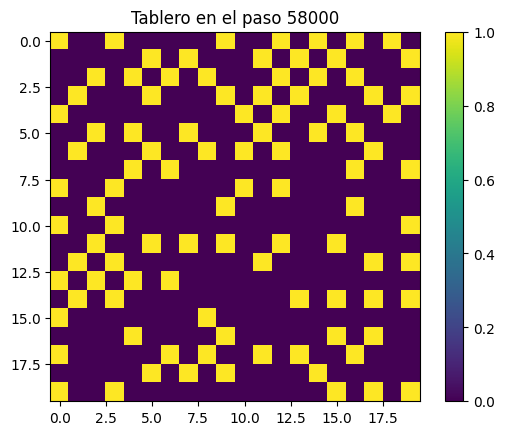

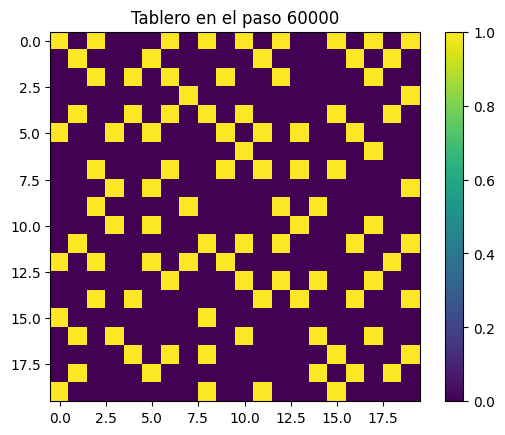

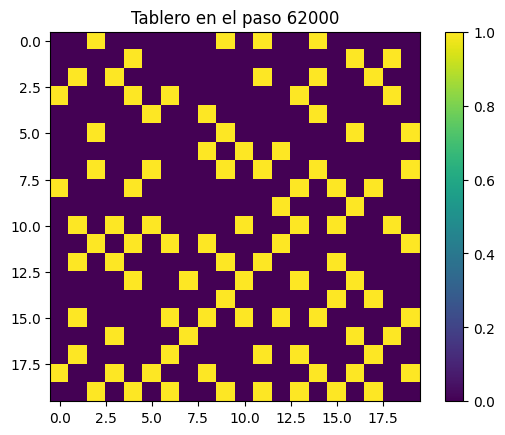

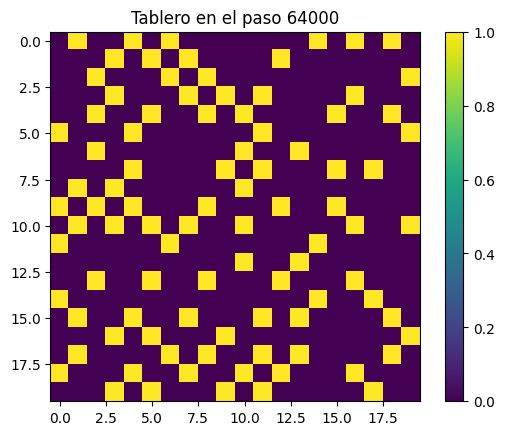

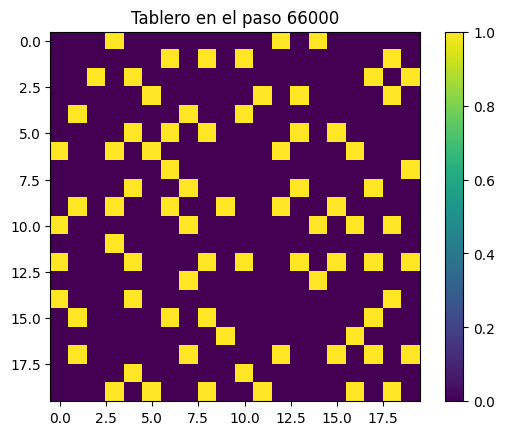

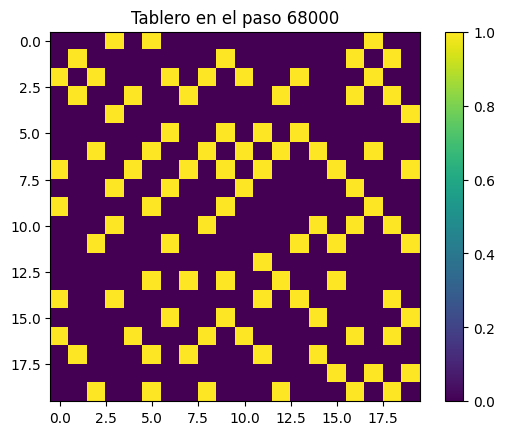

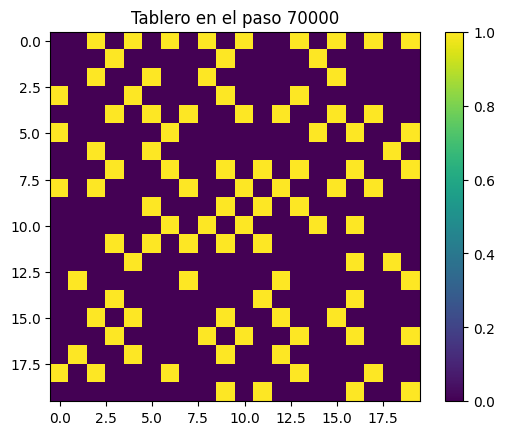

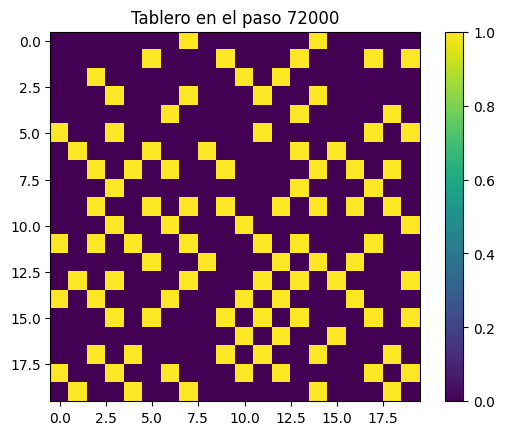

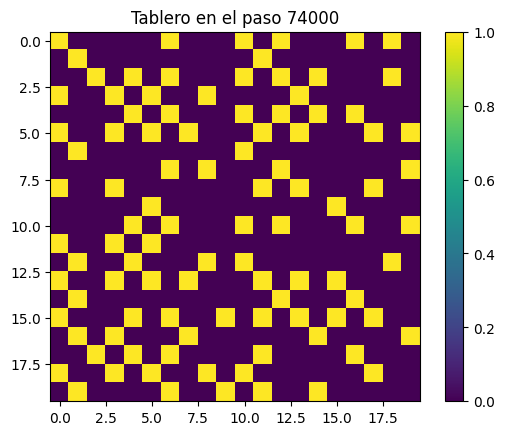

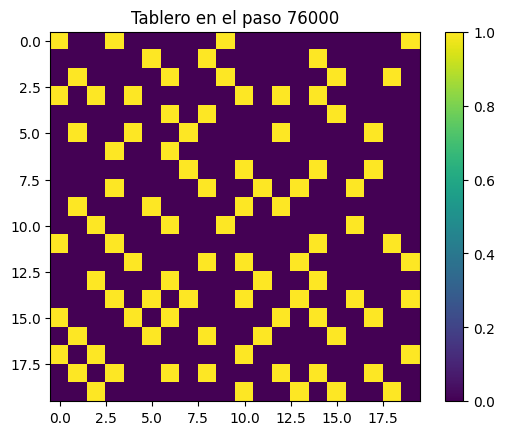

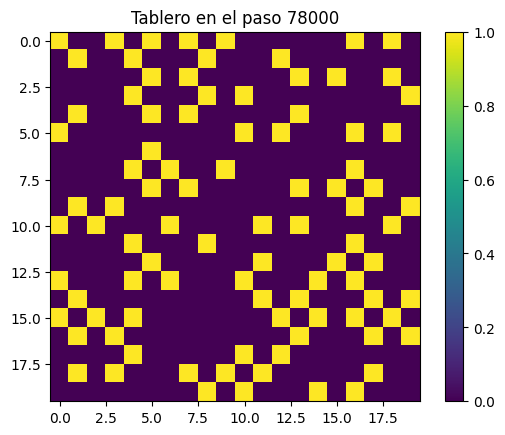

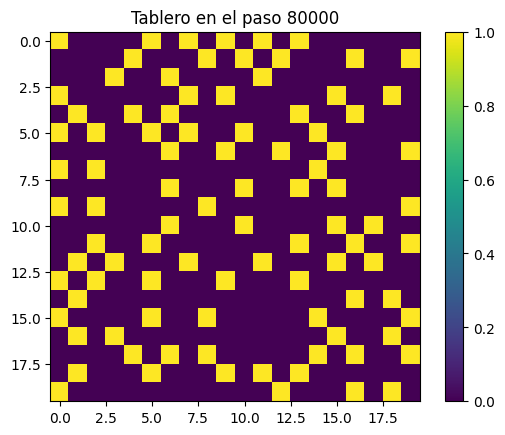

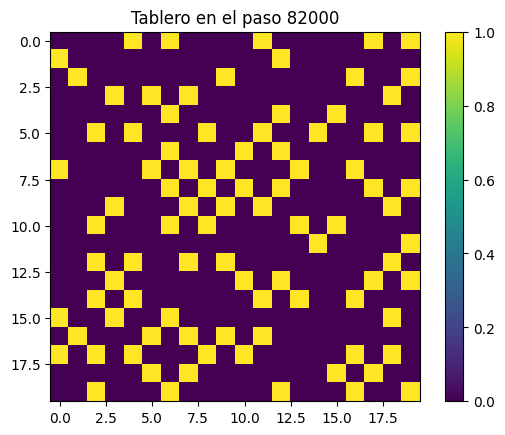

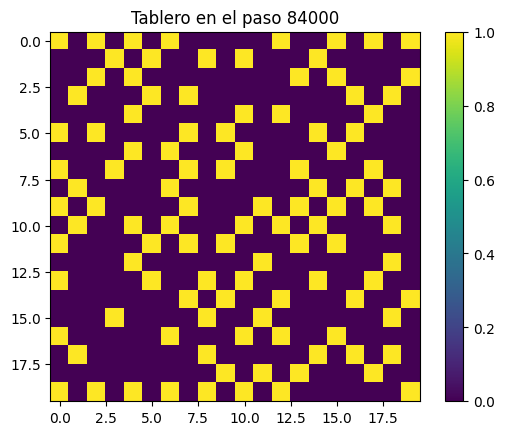

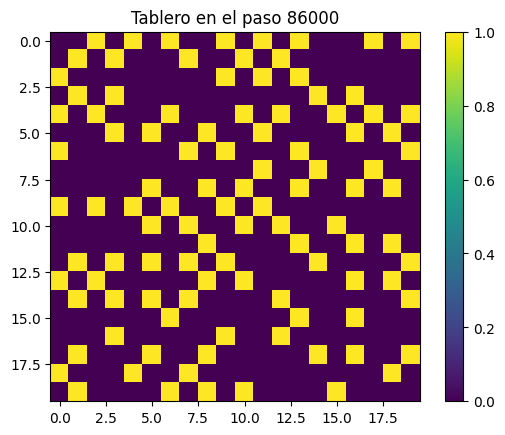

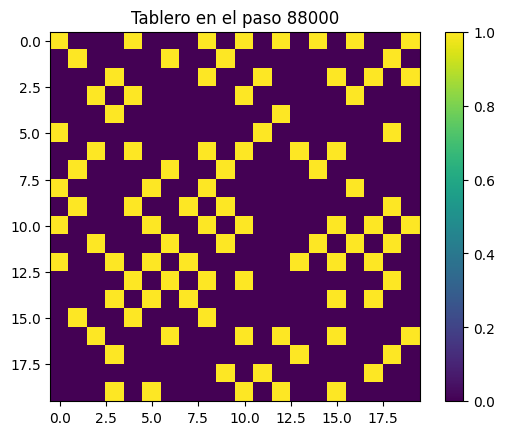

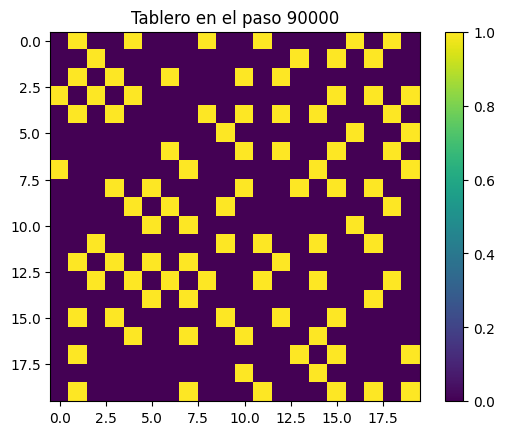

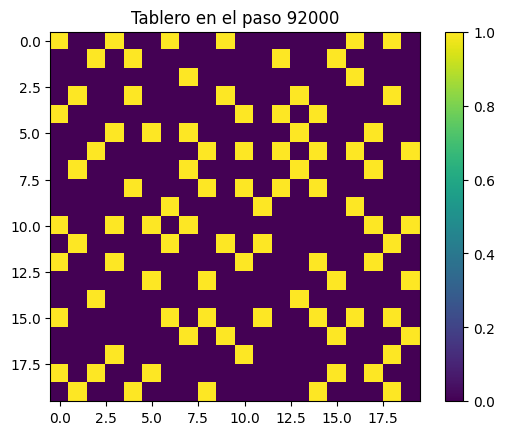

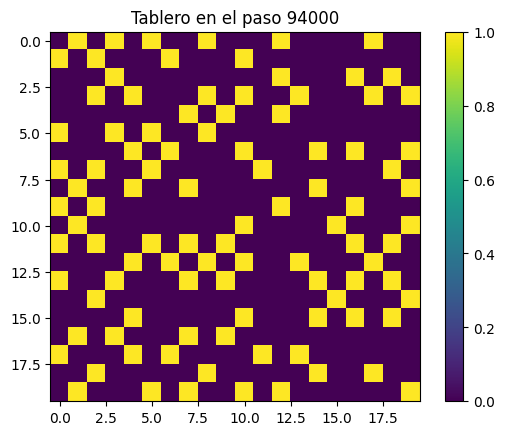

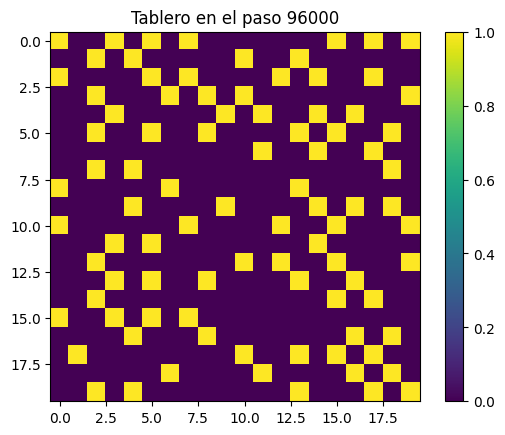

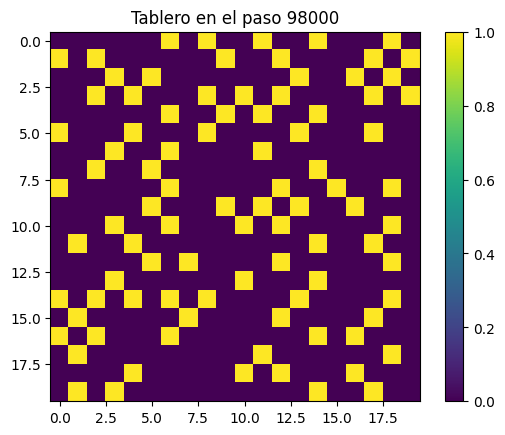

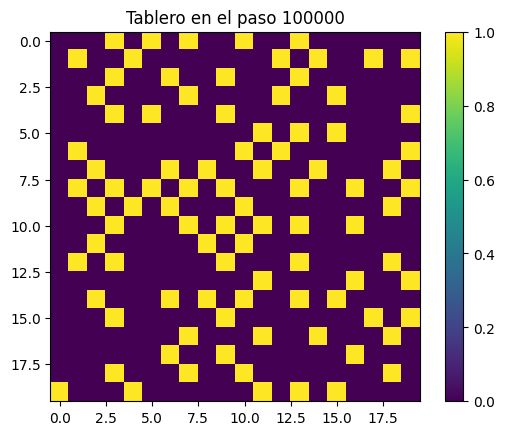

In [ ]:
final_configuration = hard_core_gibbs(dimension, iteration_total, interval=2000)

**Para $k = 3$ y $X_{15000}$**

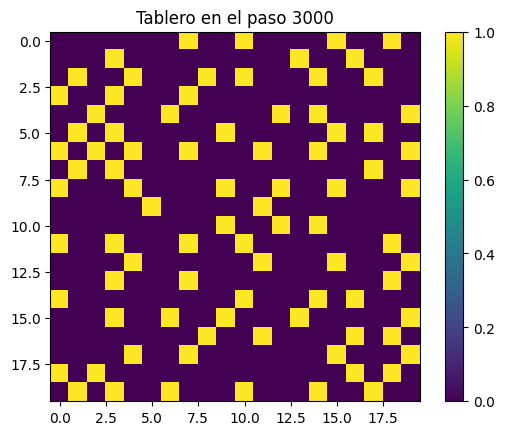

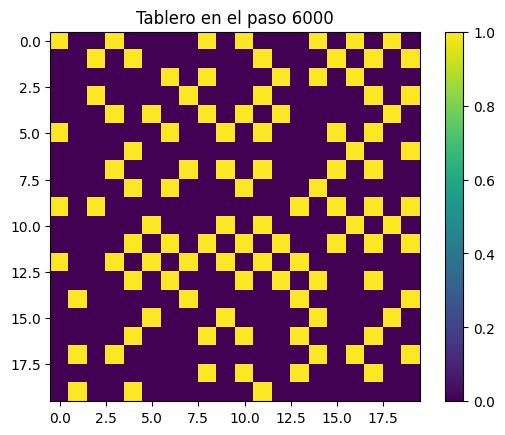

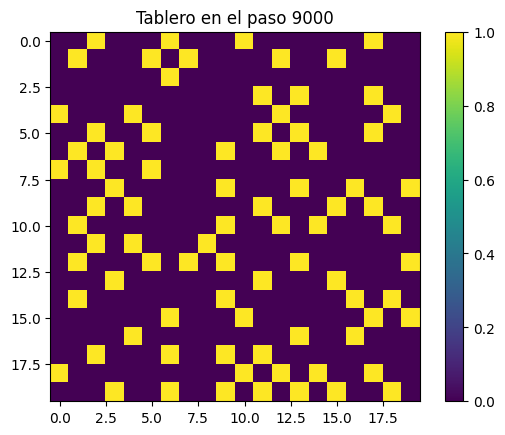

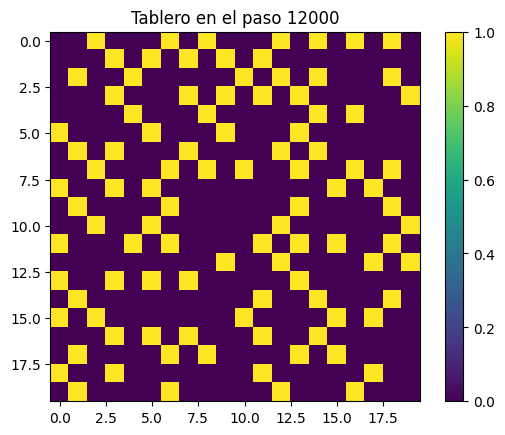

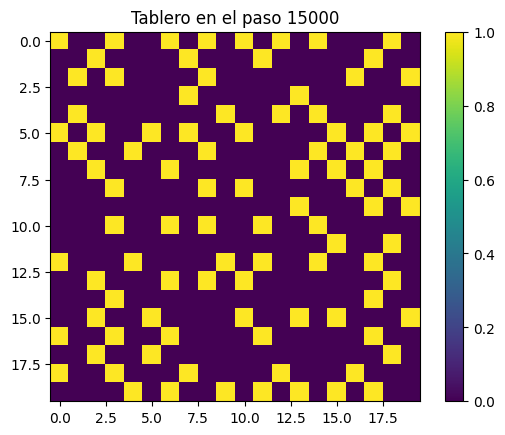

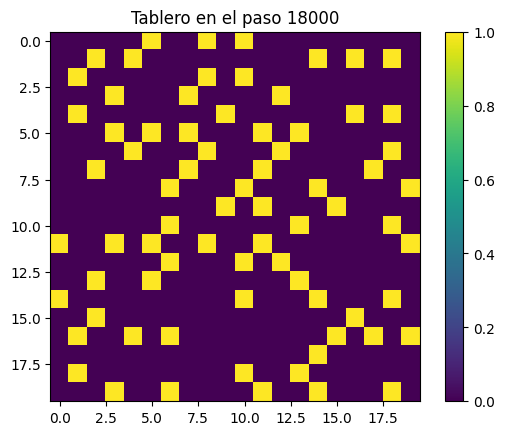

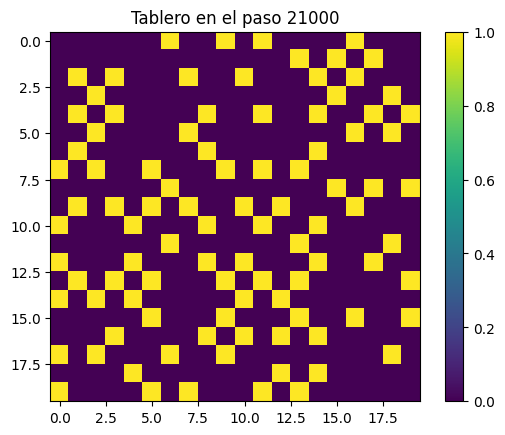

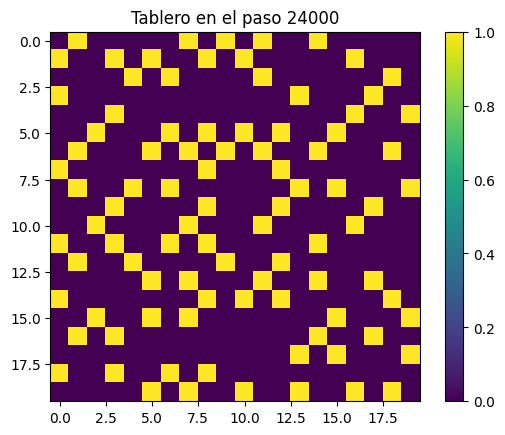

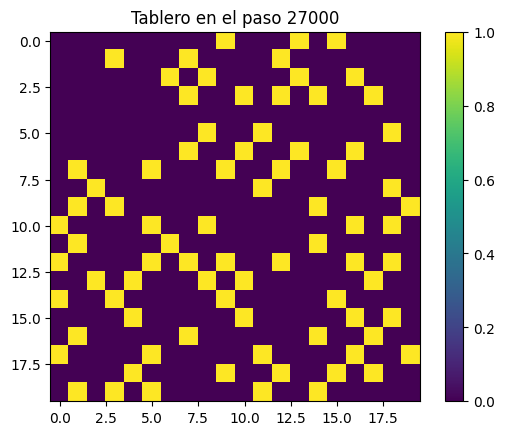

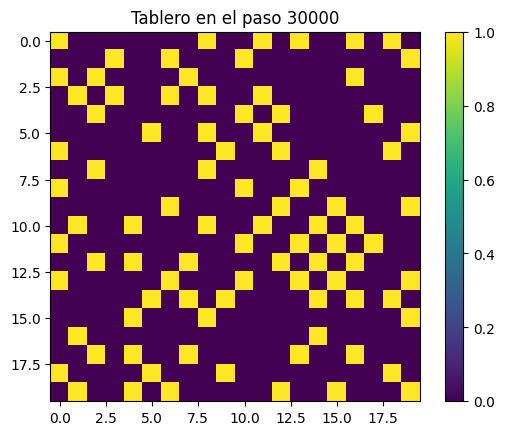

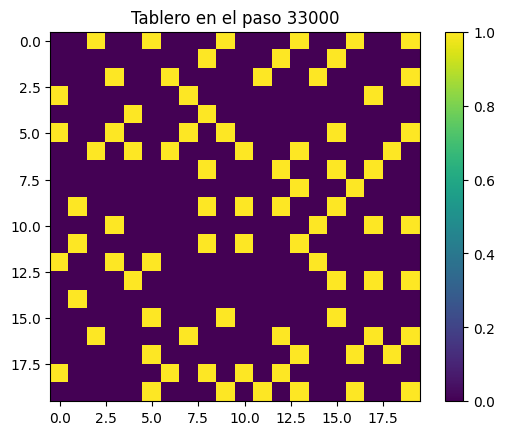

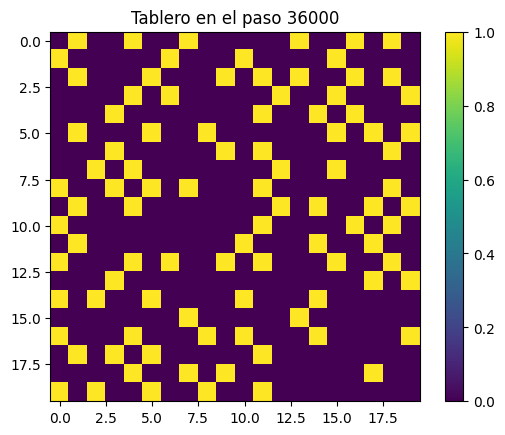

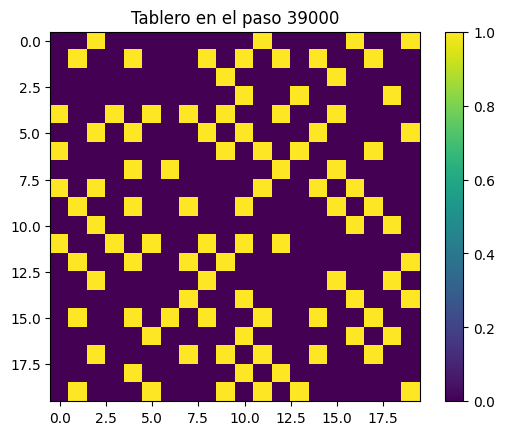

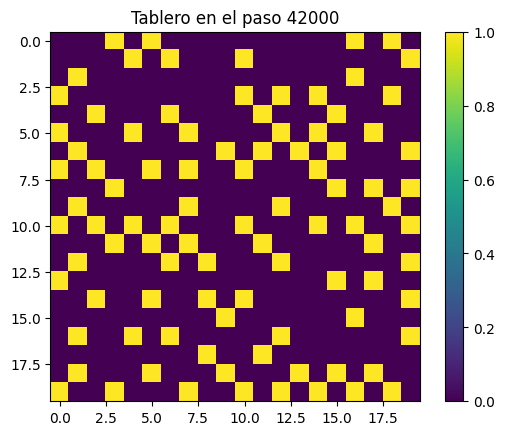

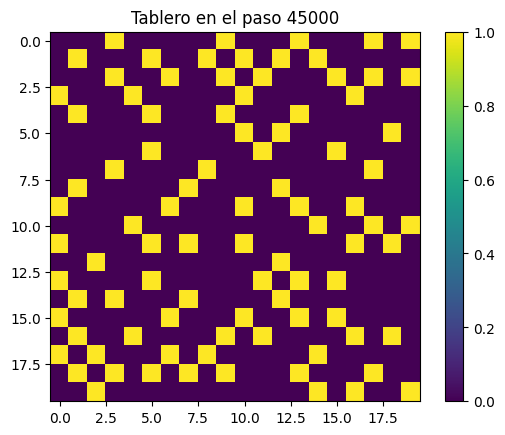

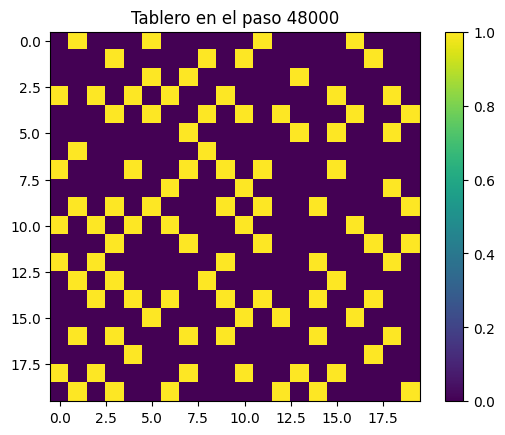

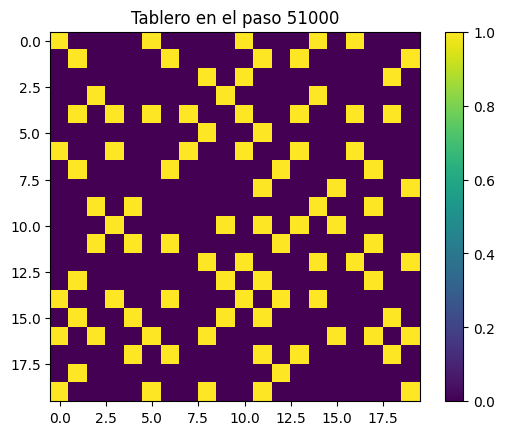

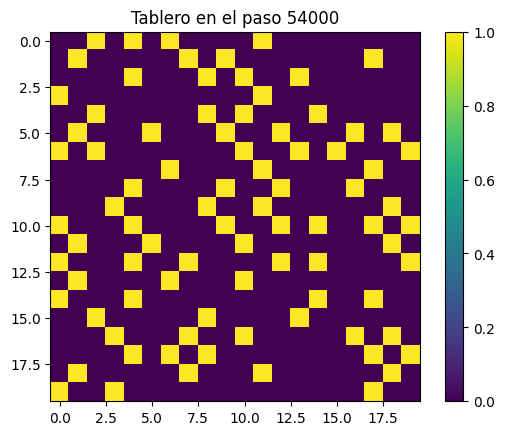

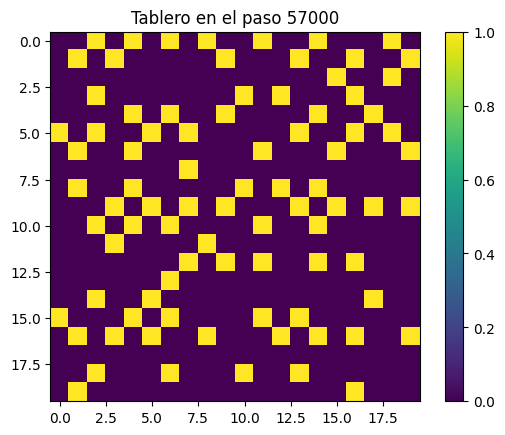

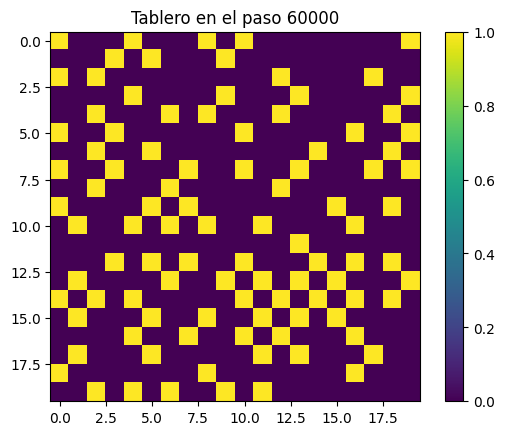

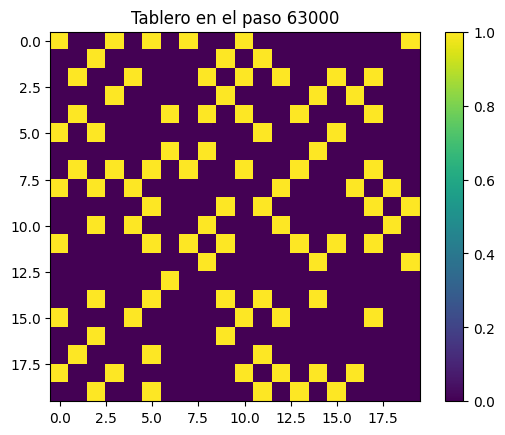

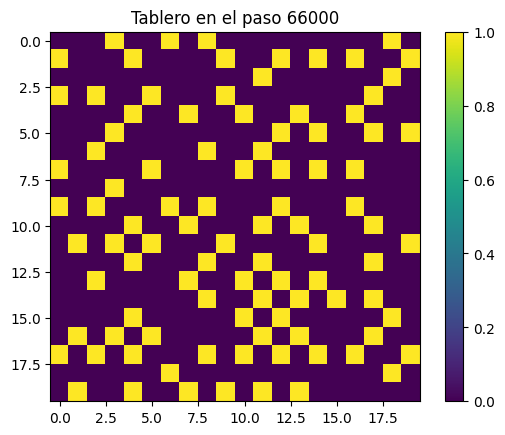

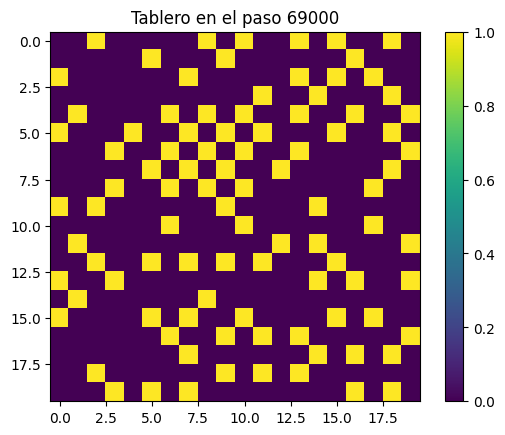

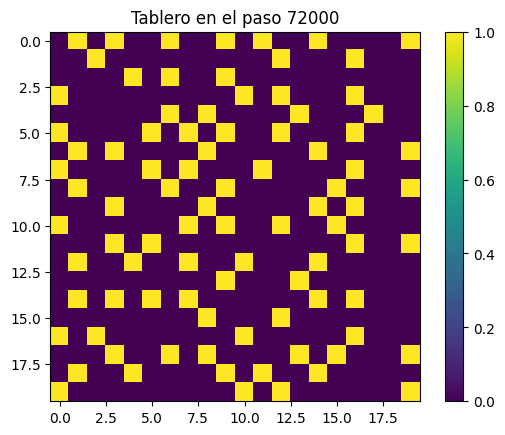

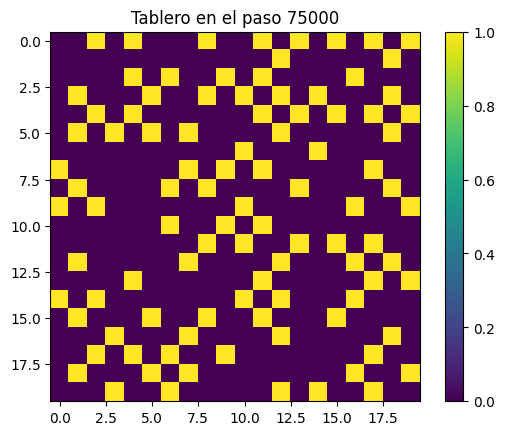

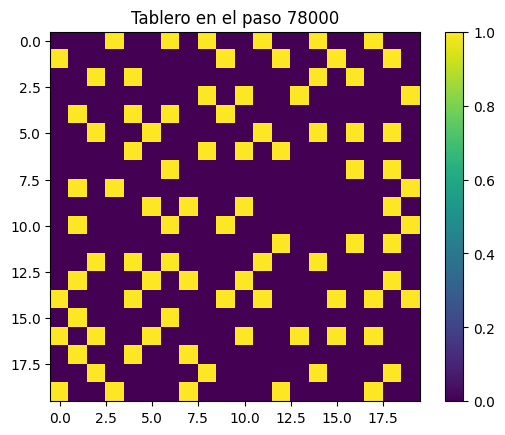

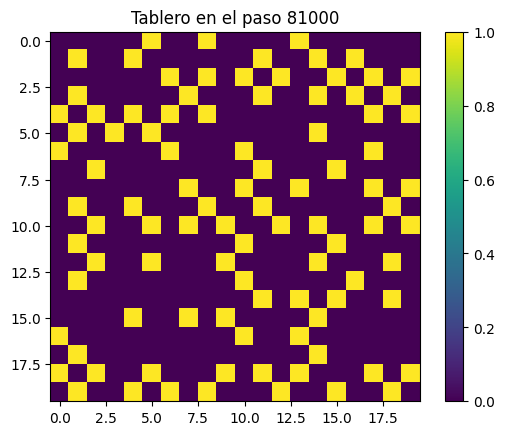

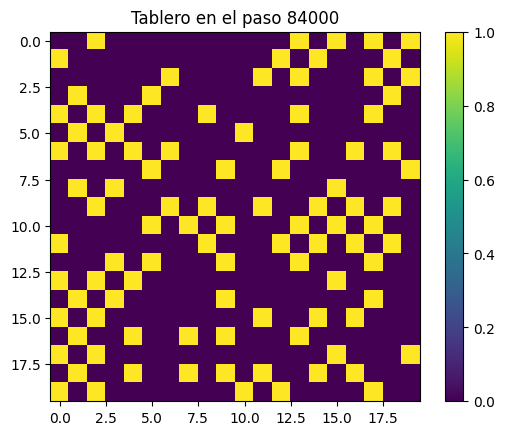

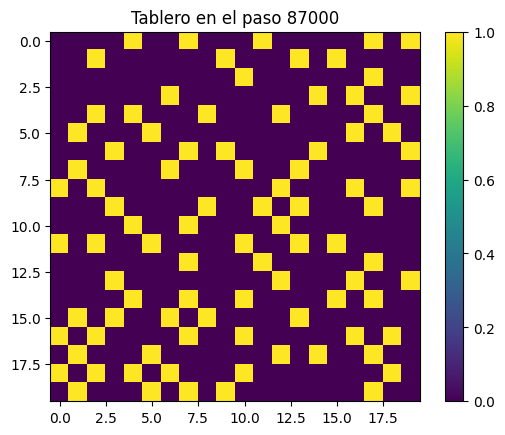

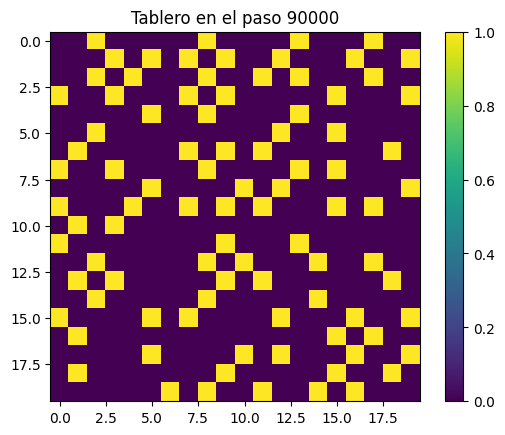

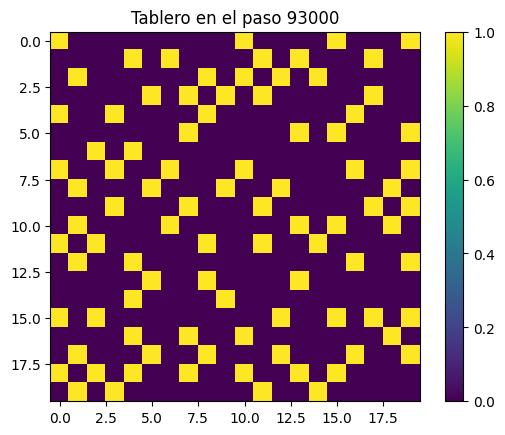

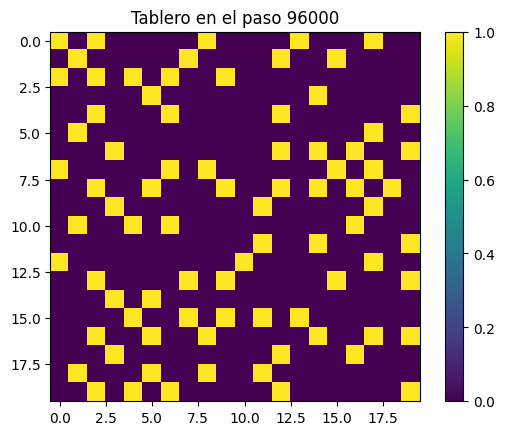

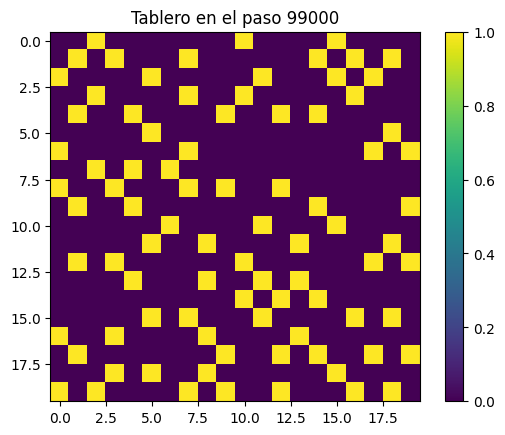

In [ ]:
final_configuration = hard_core_gibbs(dimension, iteration_total, interval=3000)

Para $k=5$ y $X_{10000}$

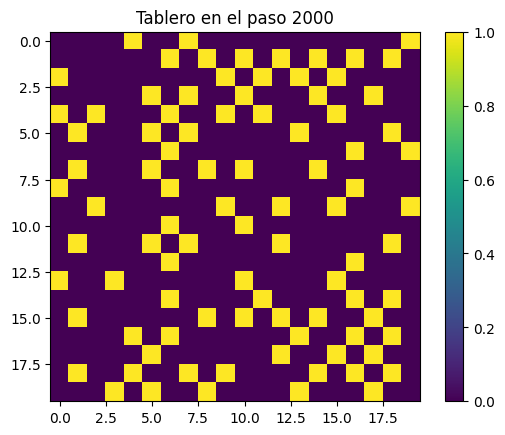

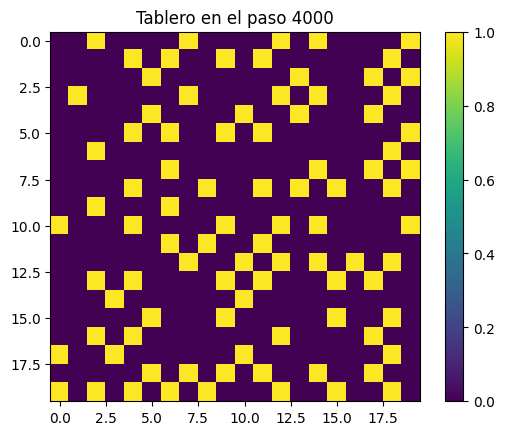

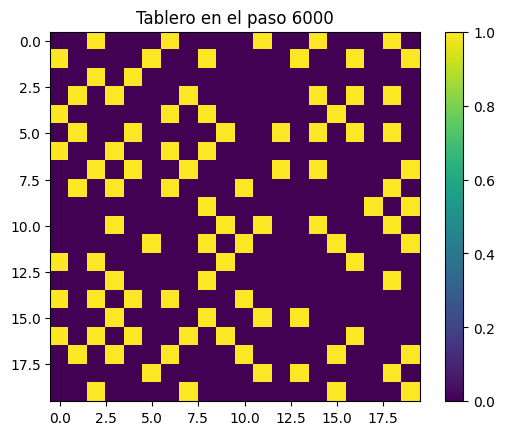

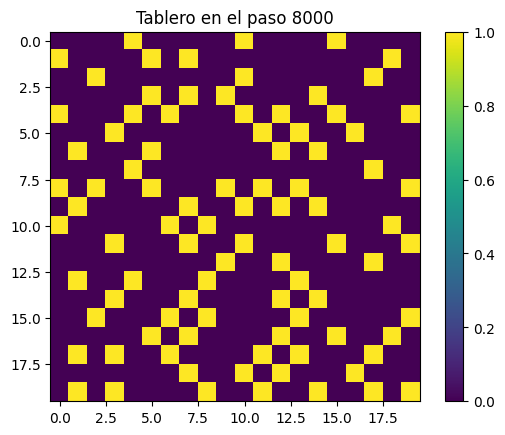

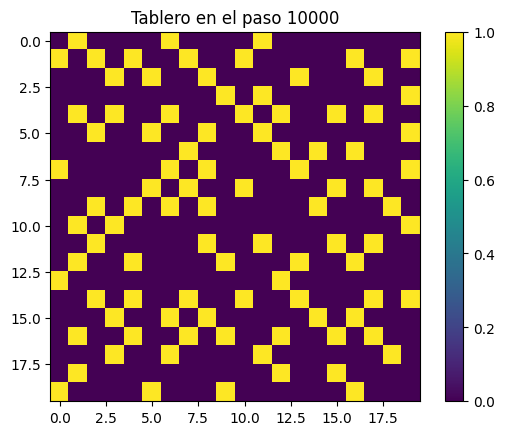

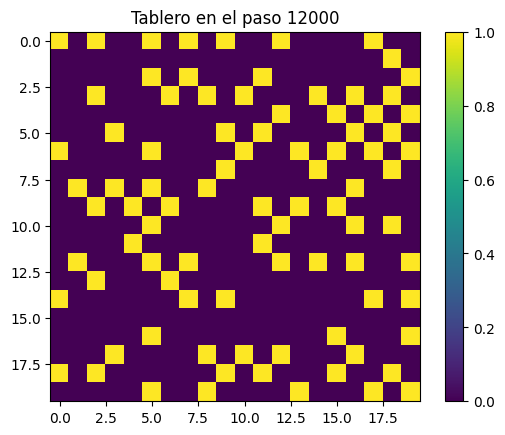

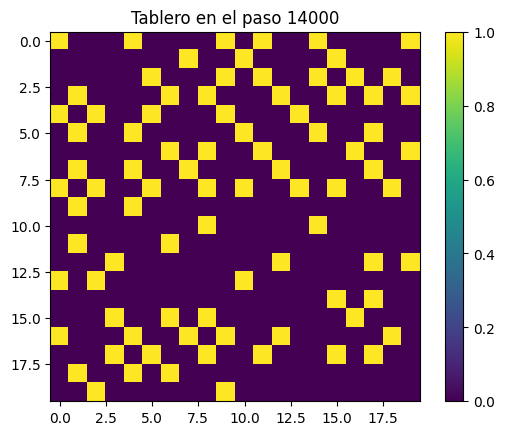

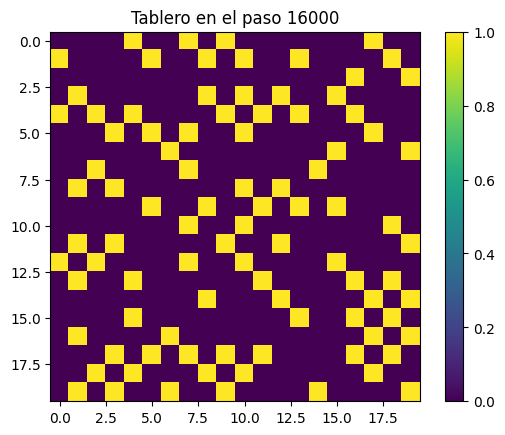

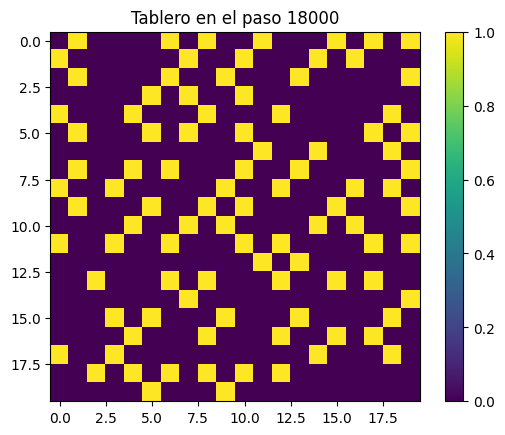

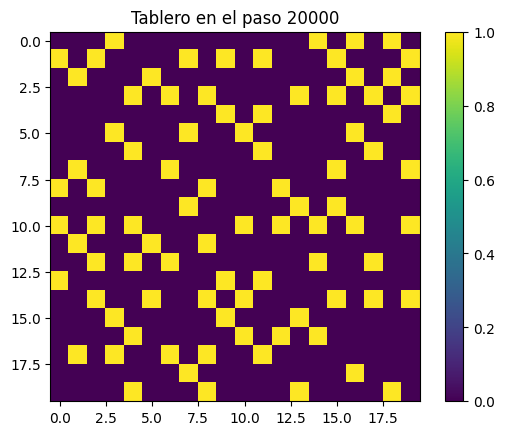

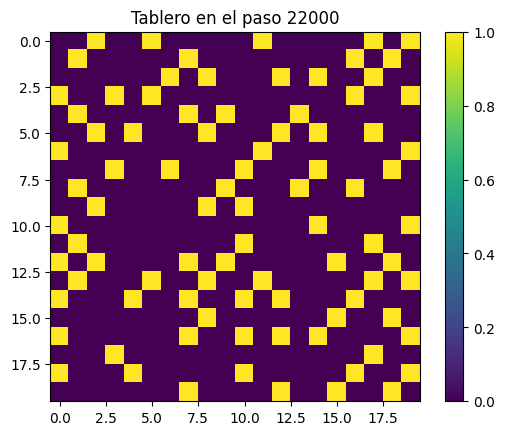

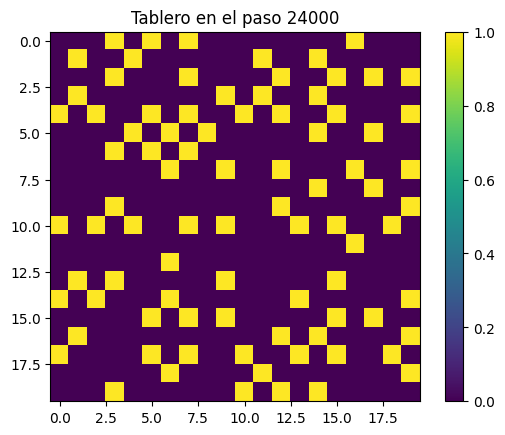

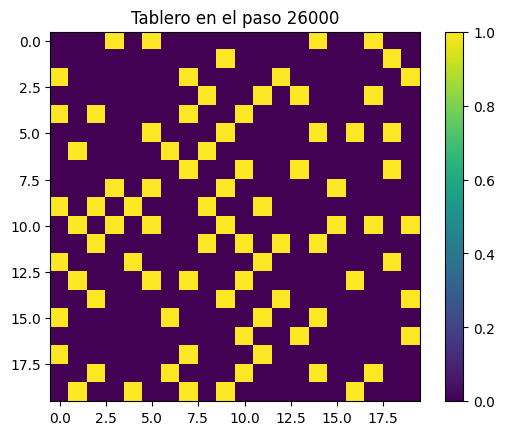

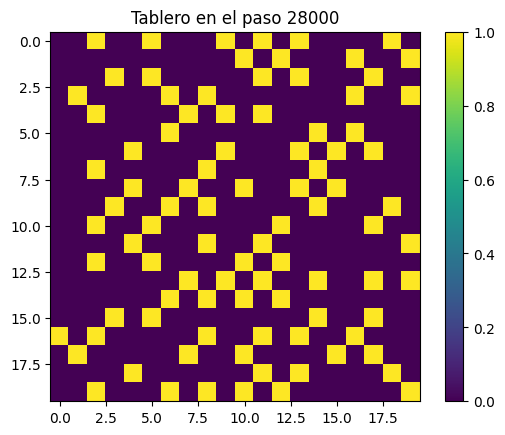

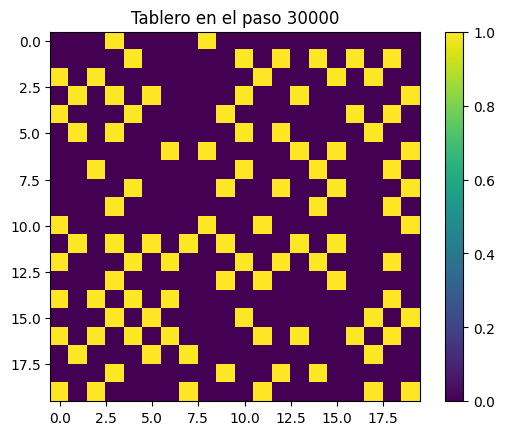

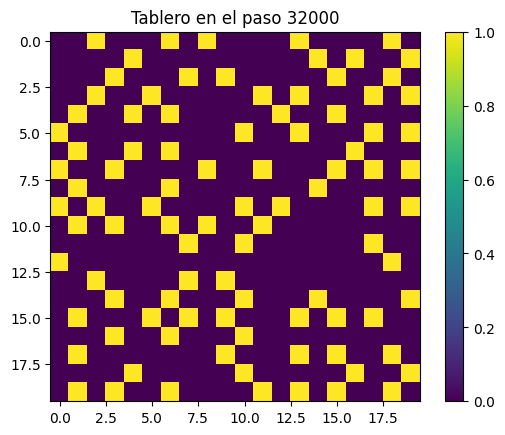

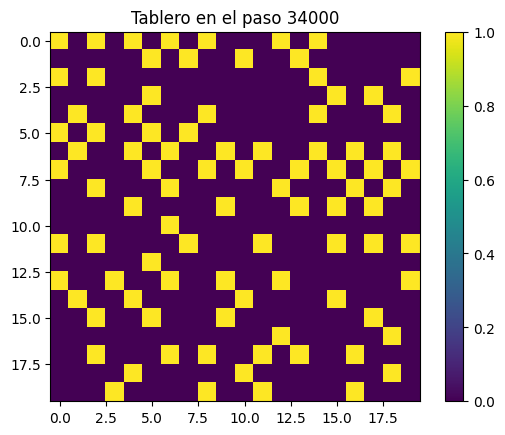

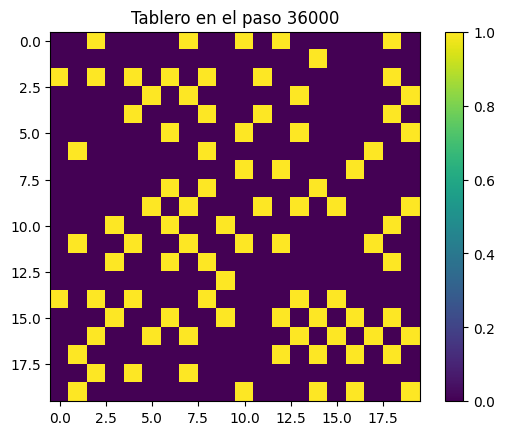

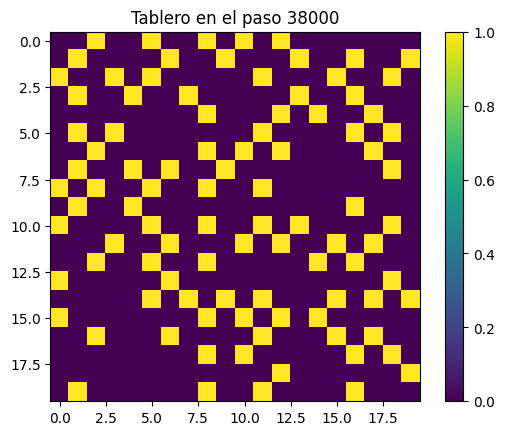

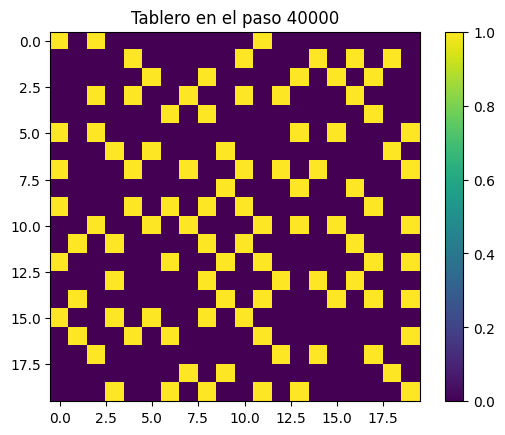

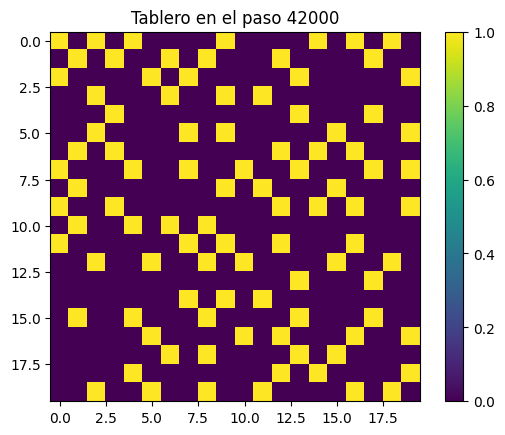

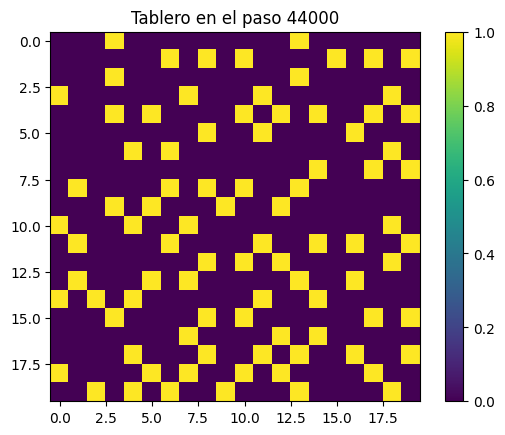

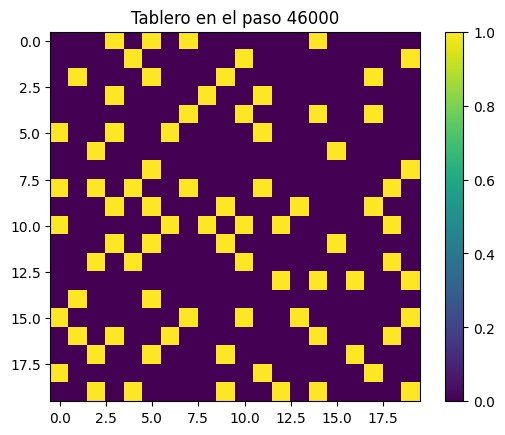

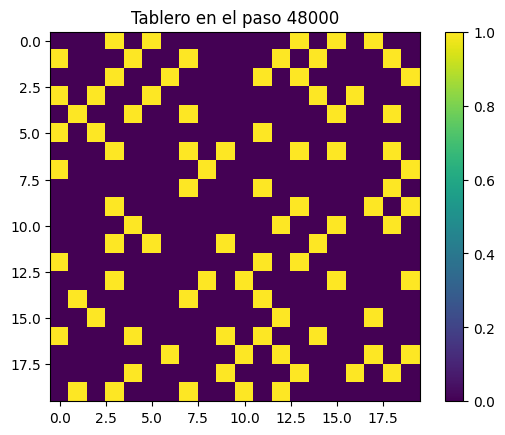

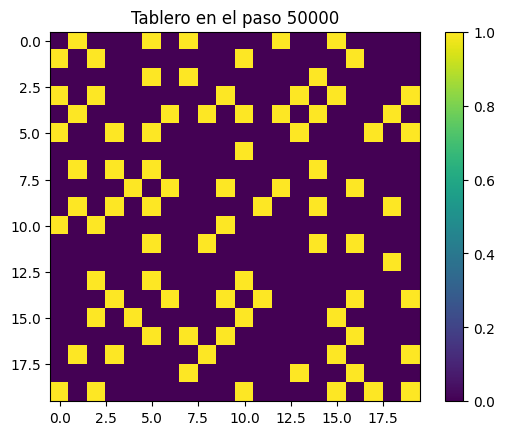

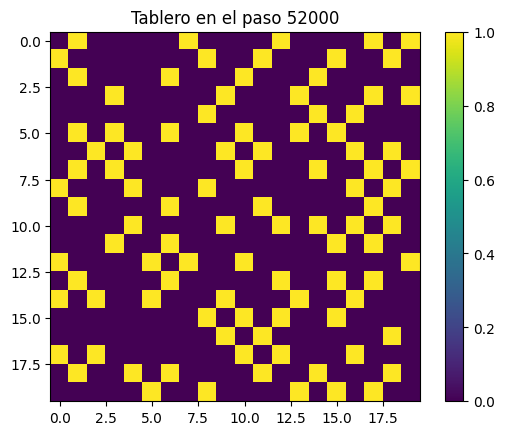

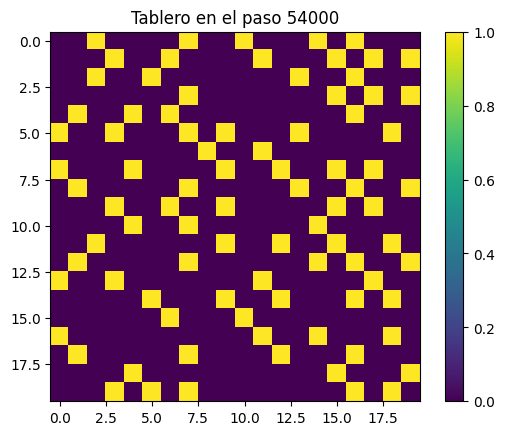

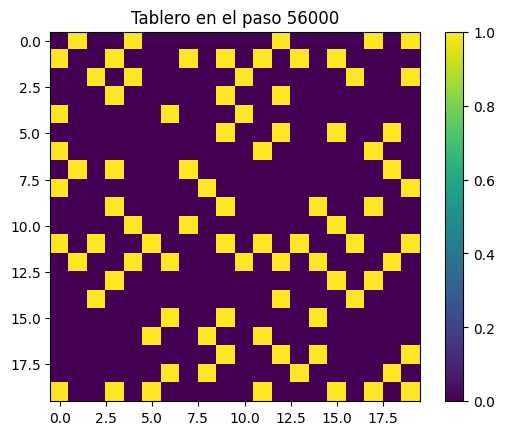

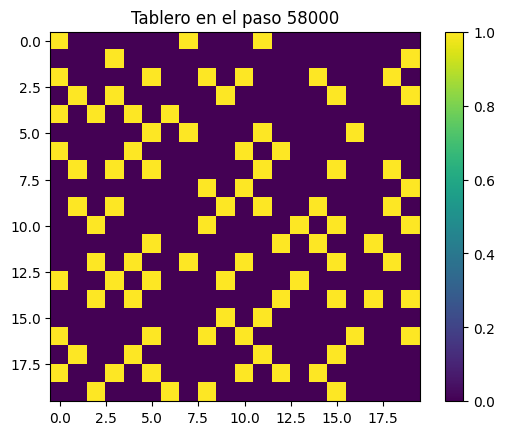

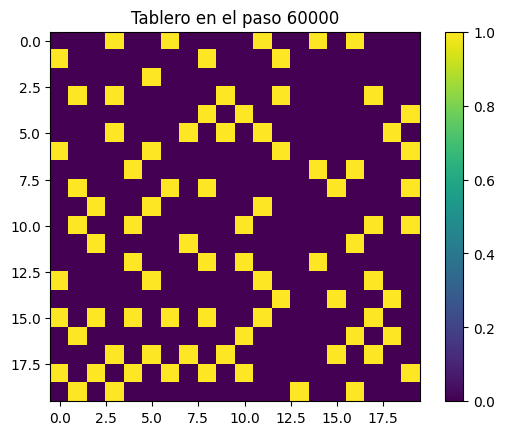

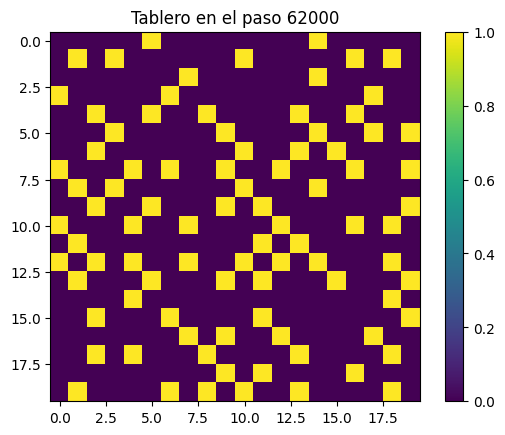

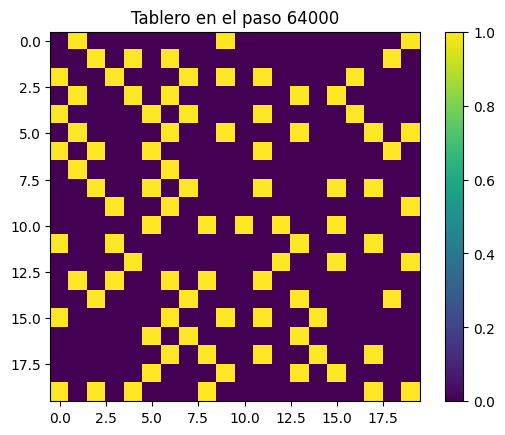

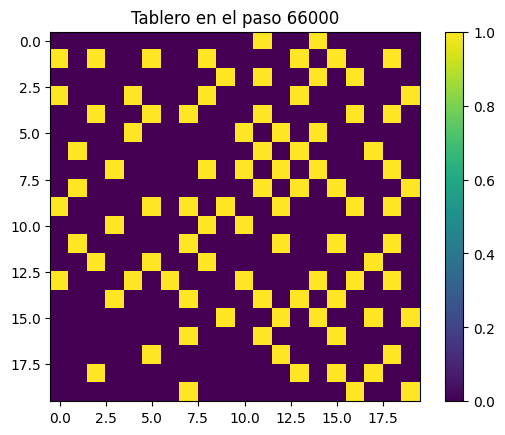

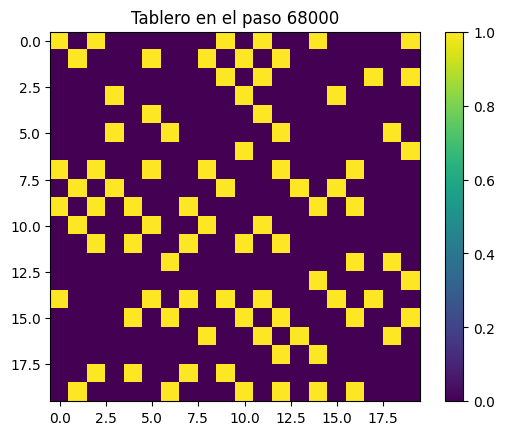

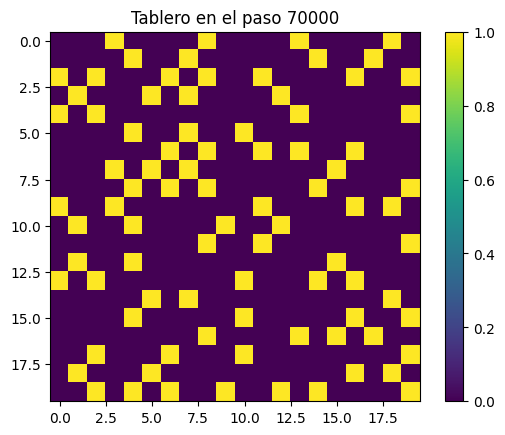

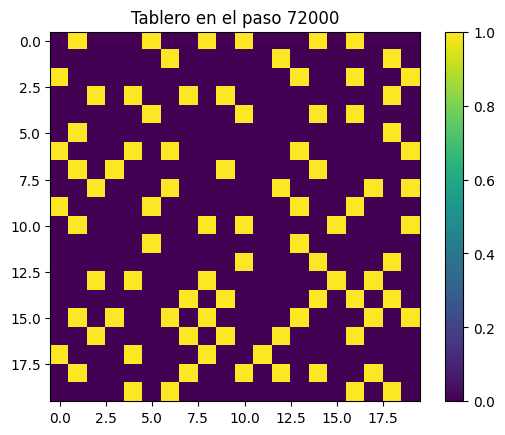

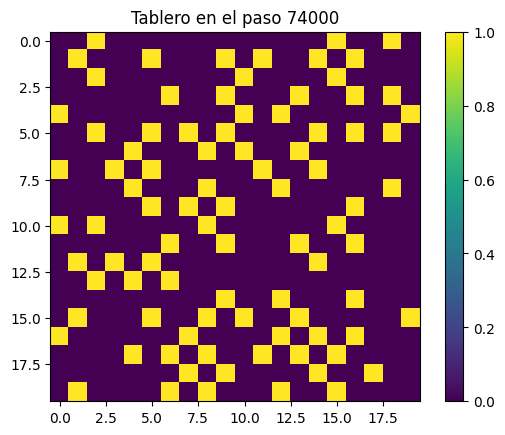

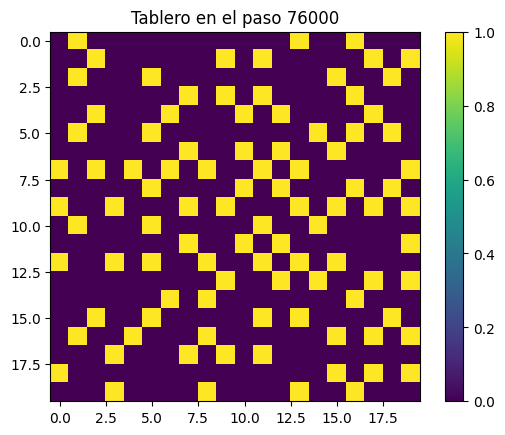

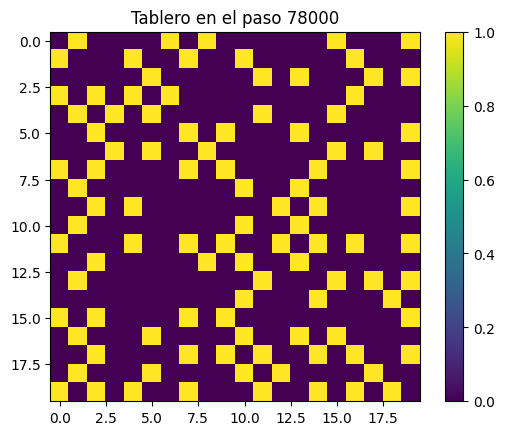

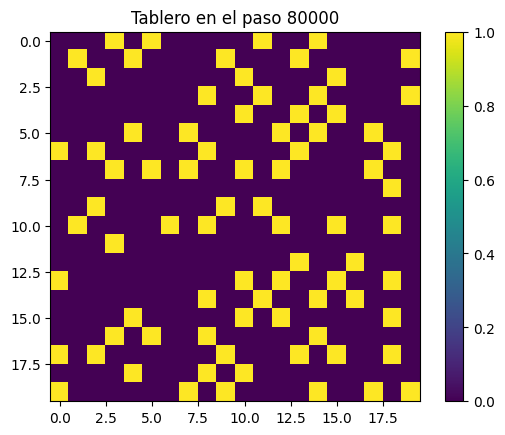

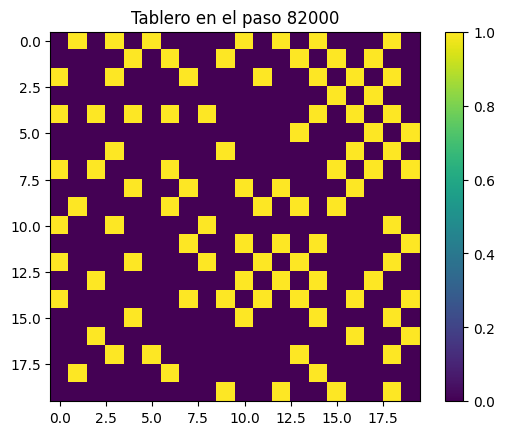

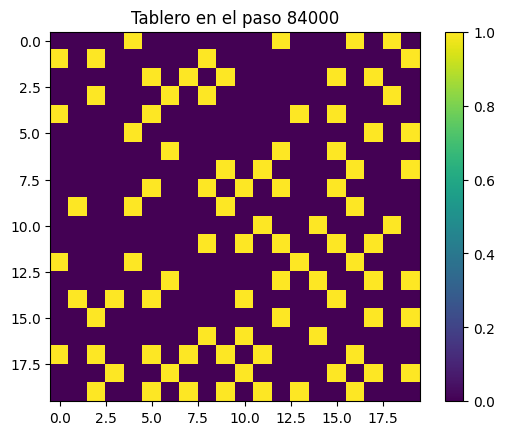

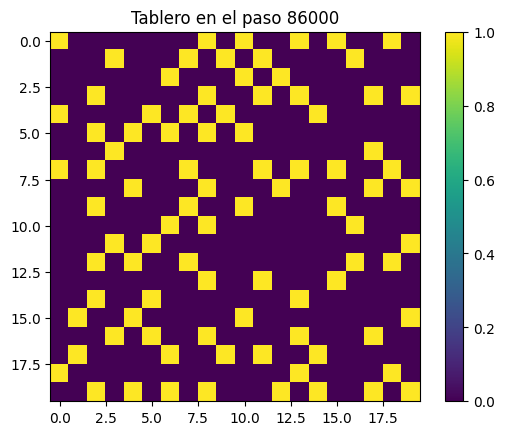

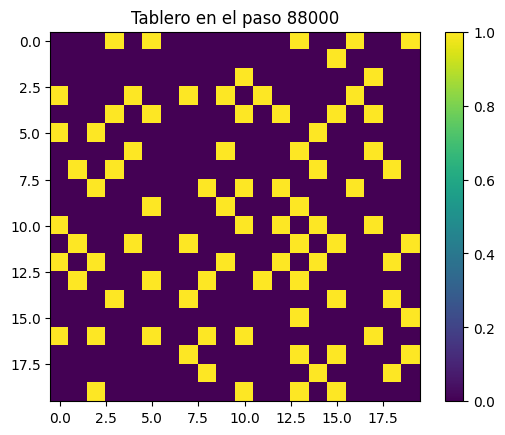

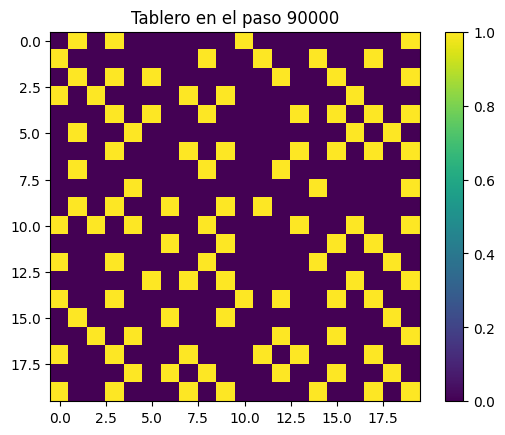

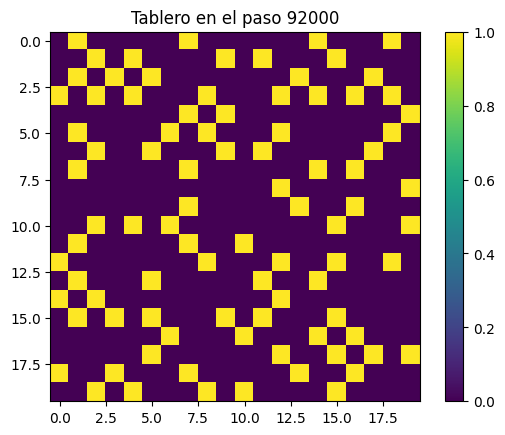

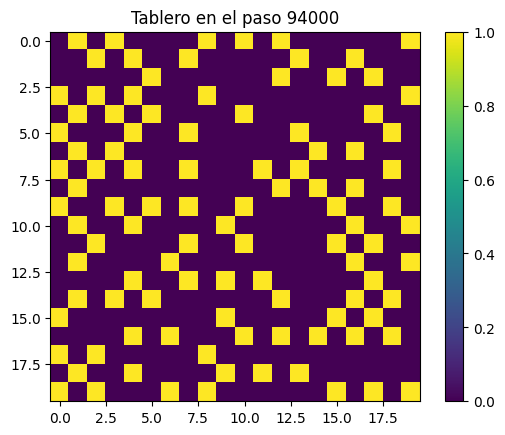

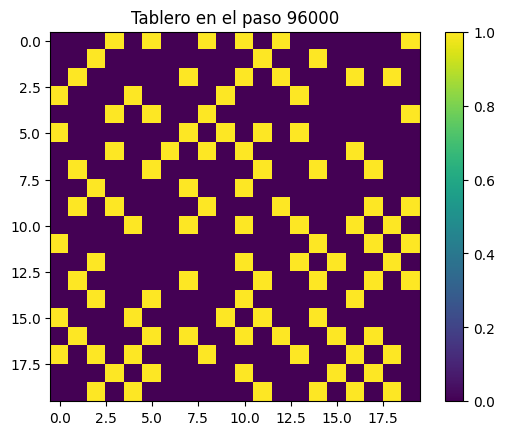

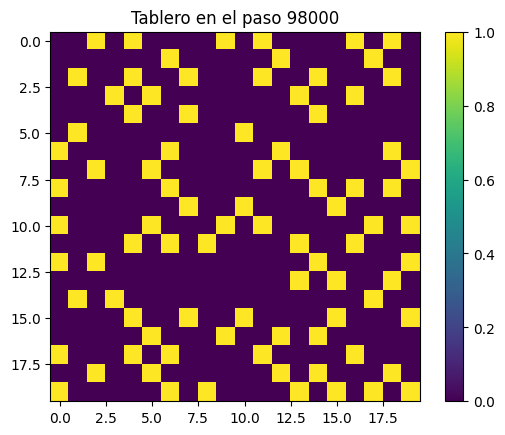

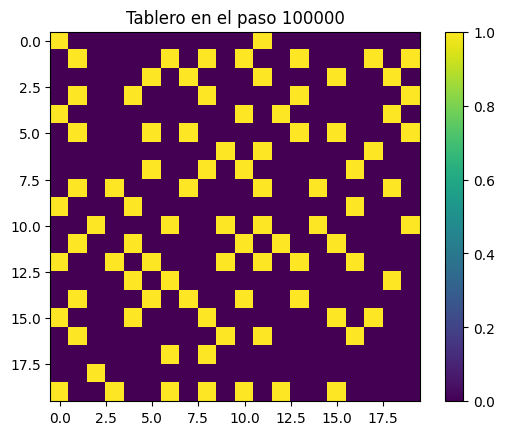

In [ ]:
final_configuration = hard_core_gibbs(dimension, iteration_total, interval=2000)

Para $k=5$ y $X_{15000}$

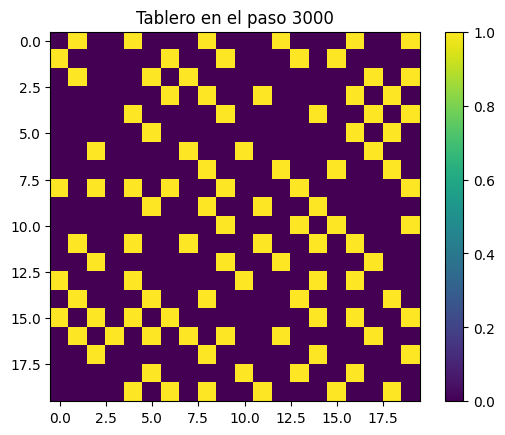

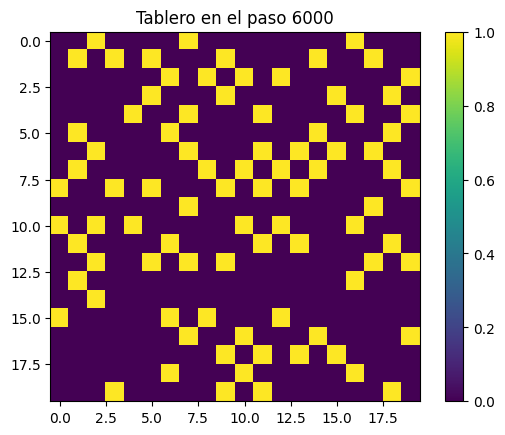

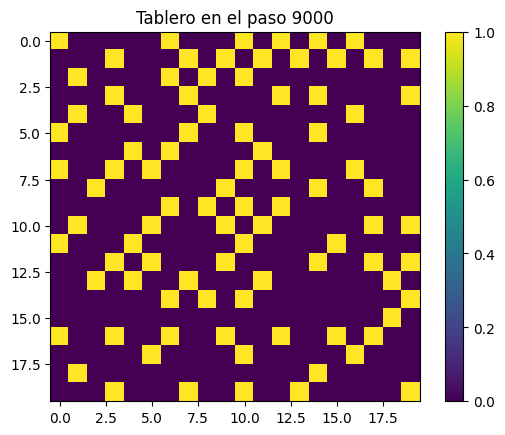

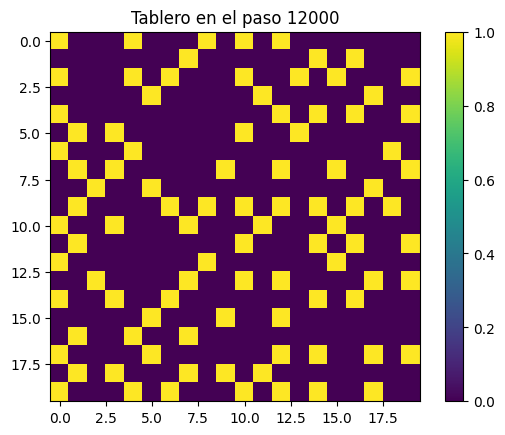

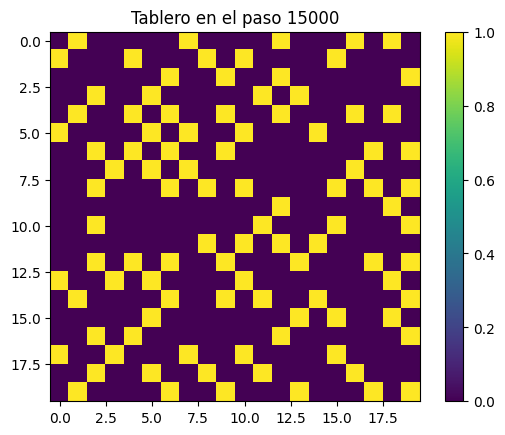

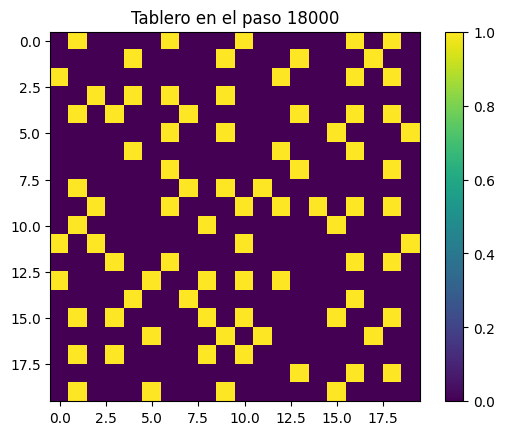

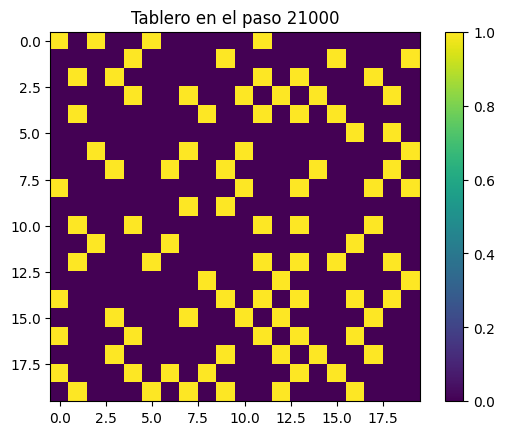

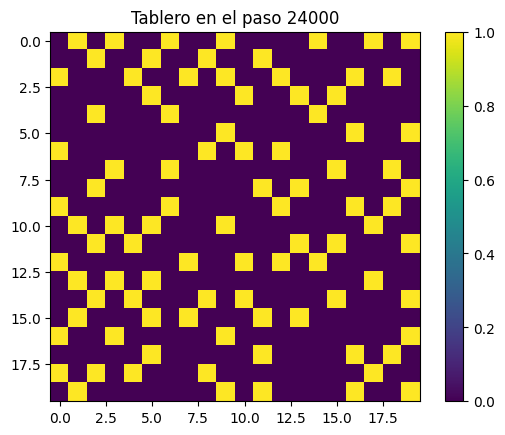

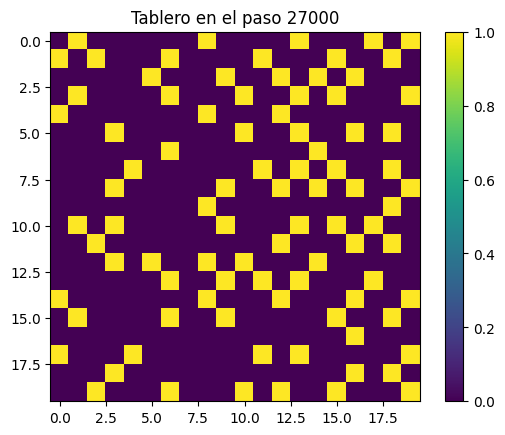

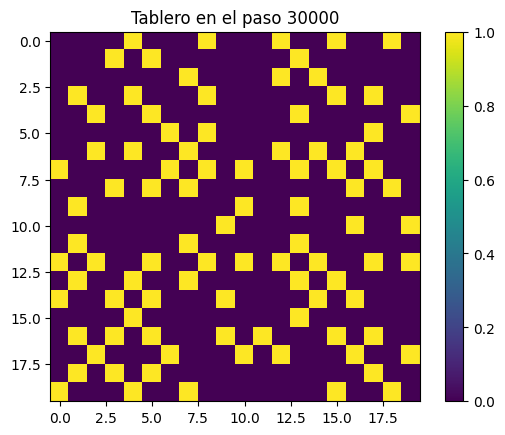

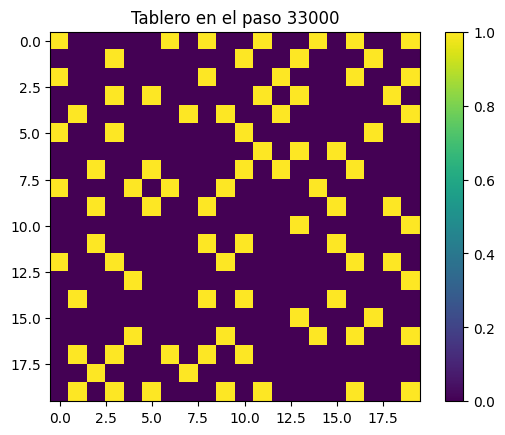

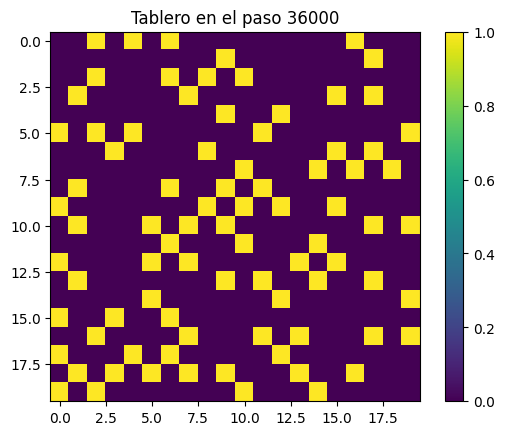

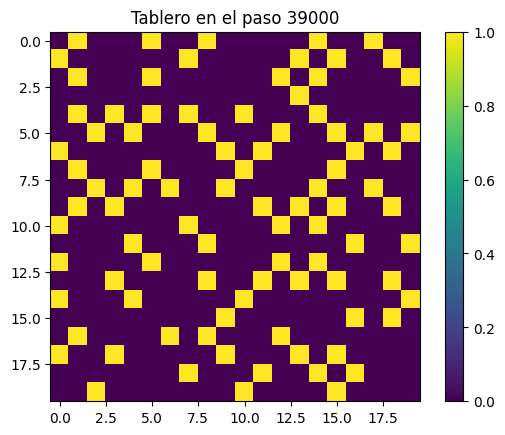

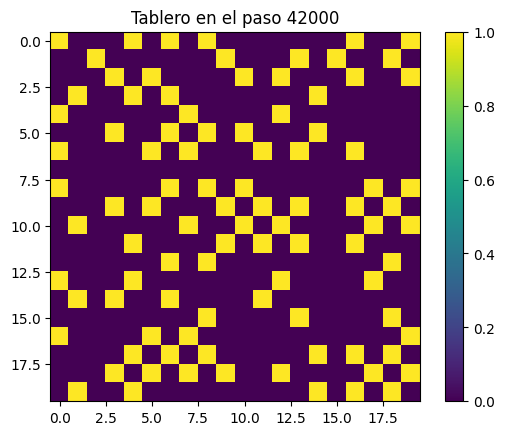

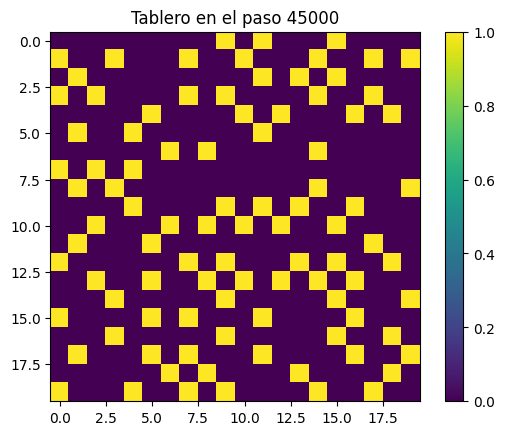

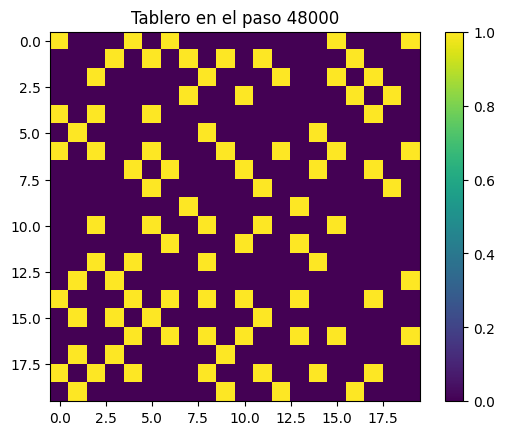

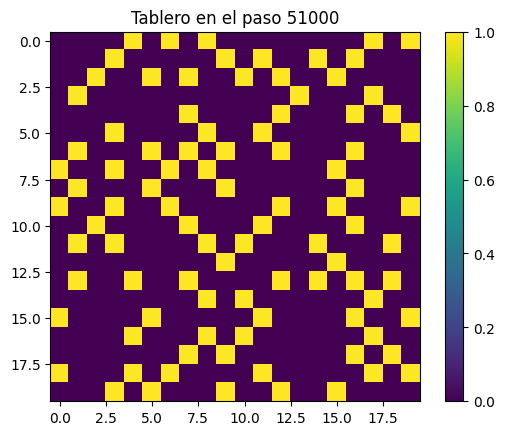

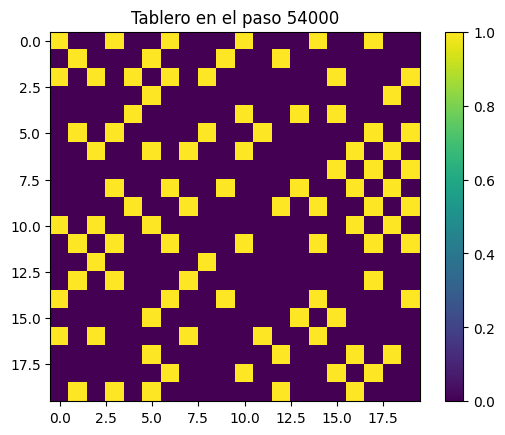

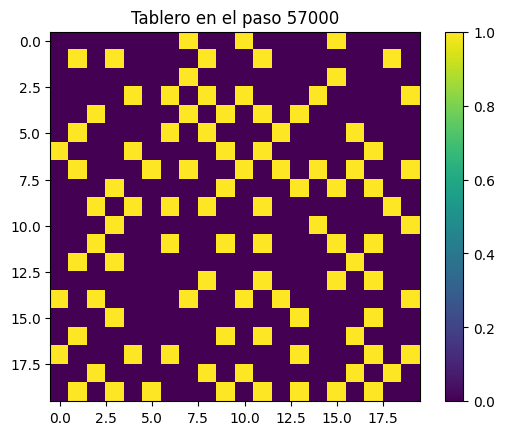

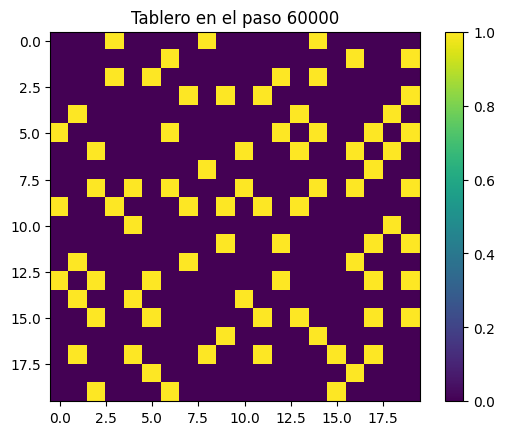

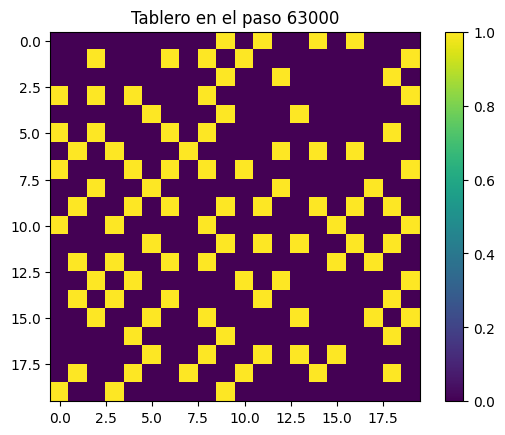

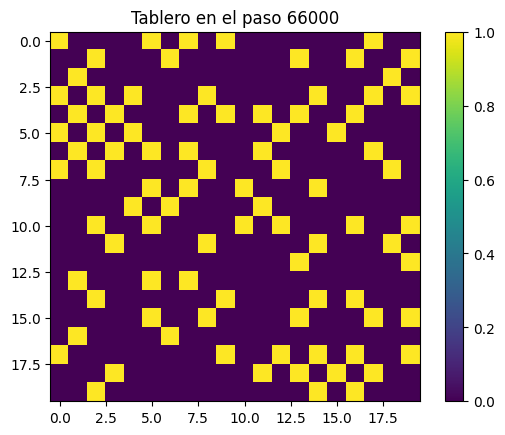

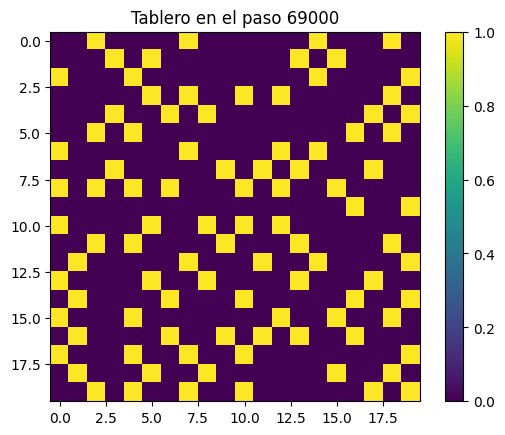

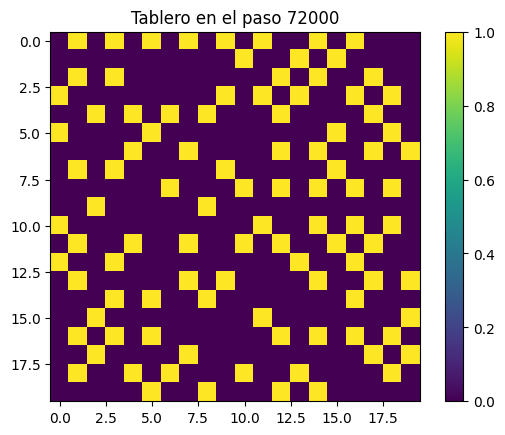

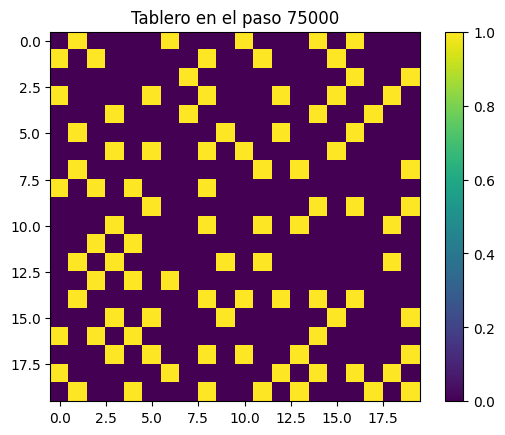

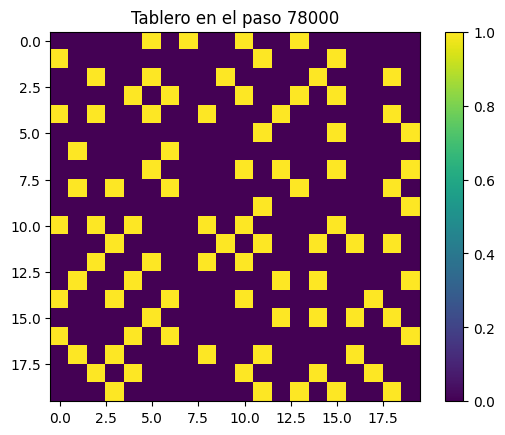

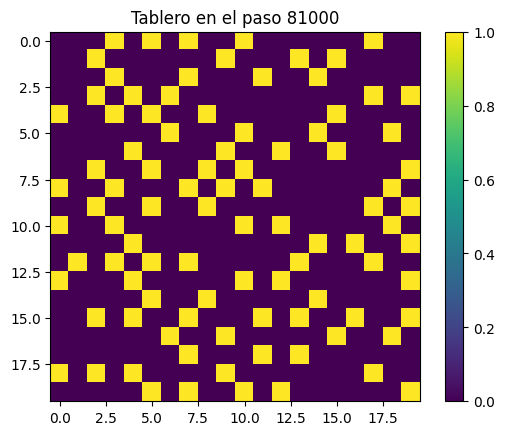

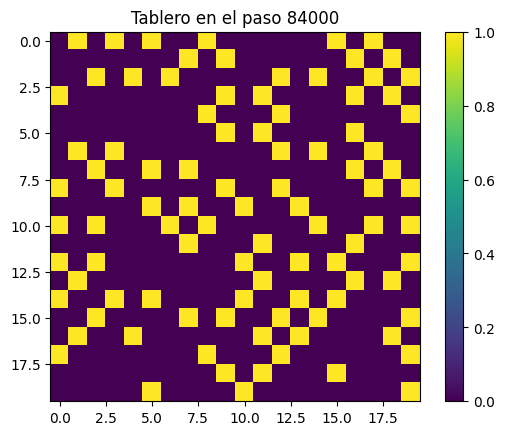

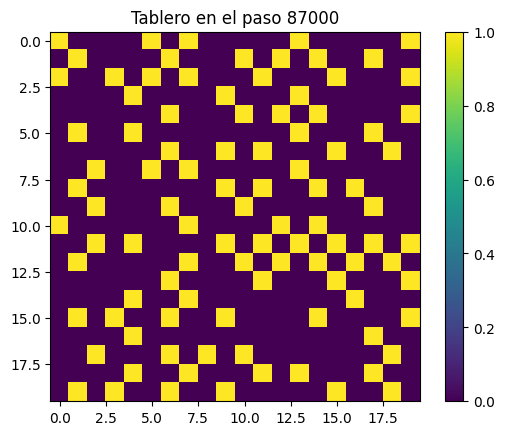

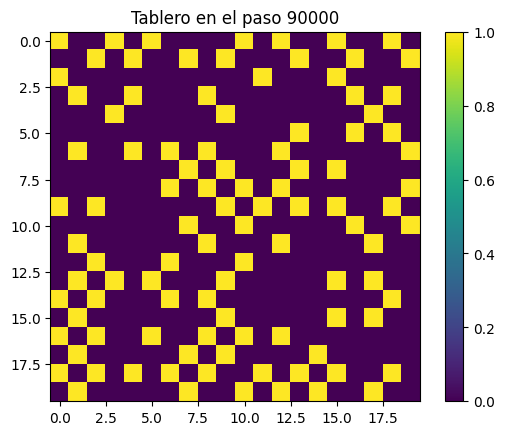

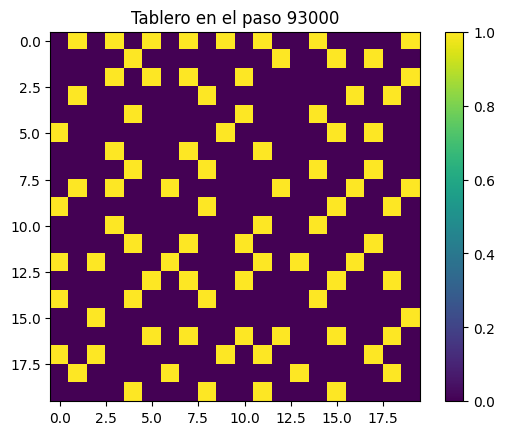

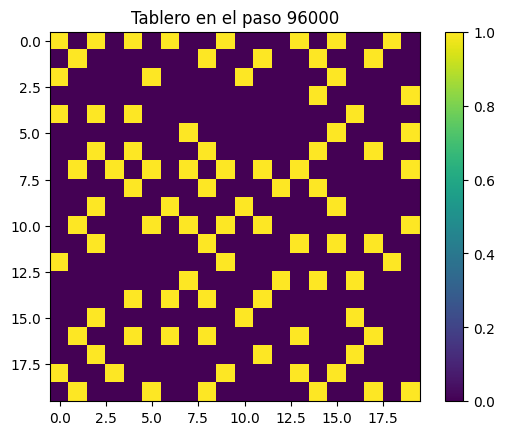

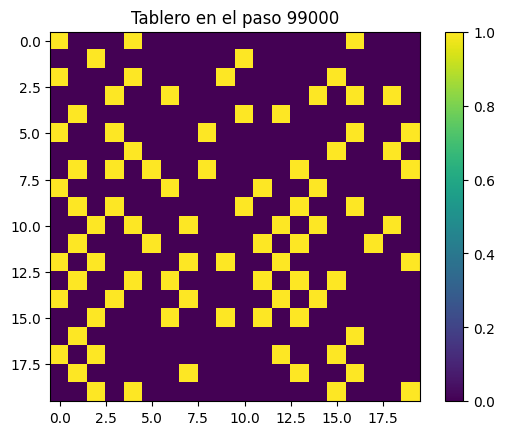

In [ ]:
final_configuration = hard_core_gibbs(dimension, iteration_total, interval=3000)

Para $k=10$ y $X_{15000}$

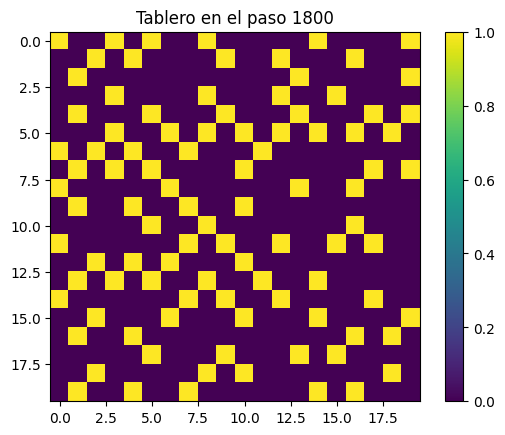

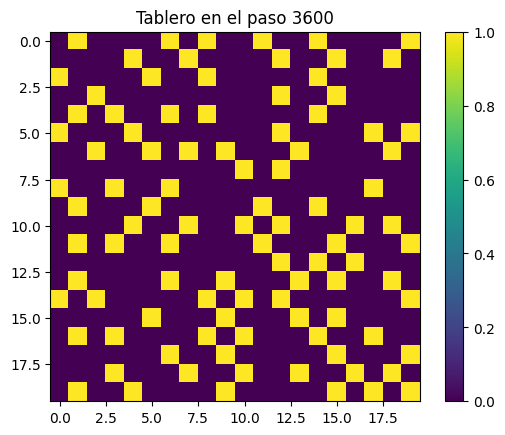

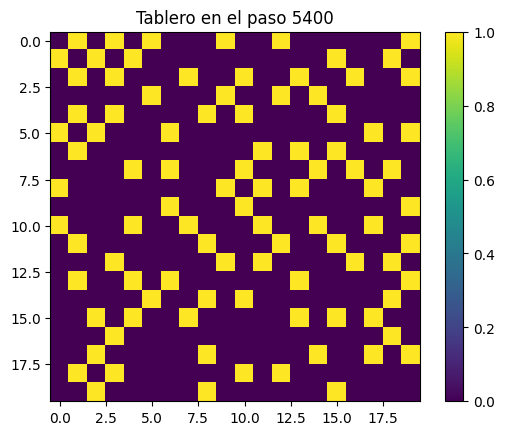

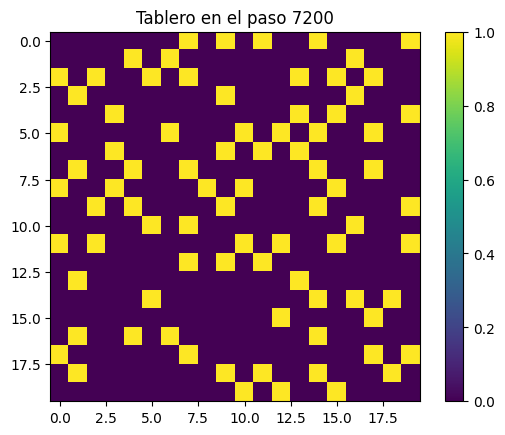

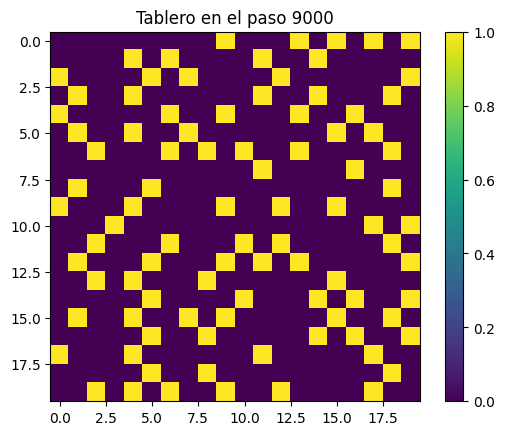

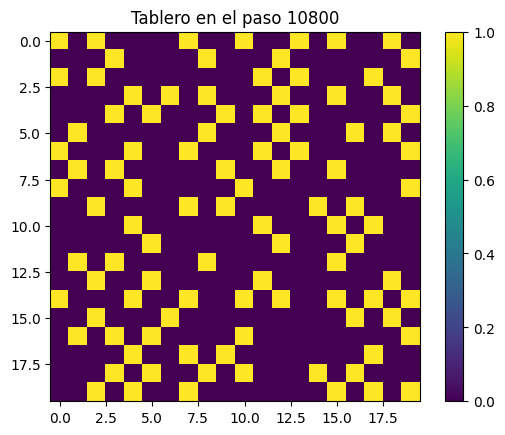

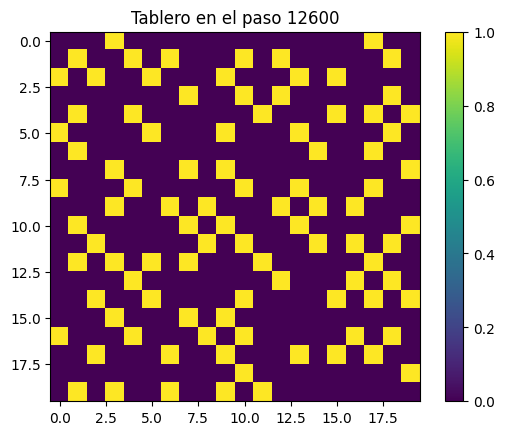

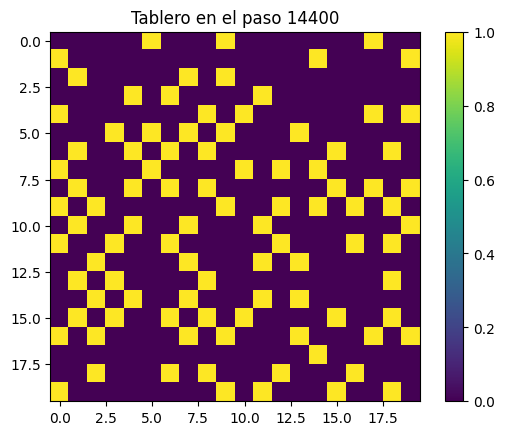

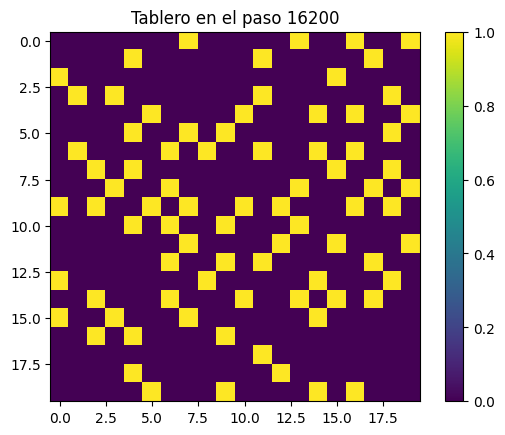

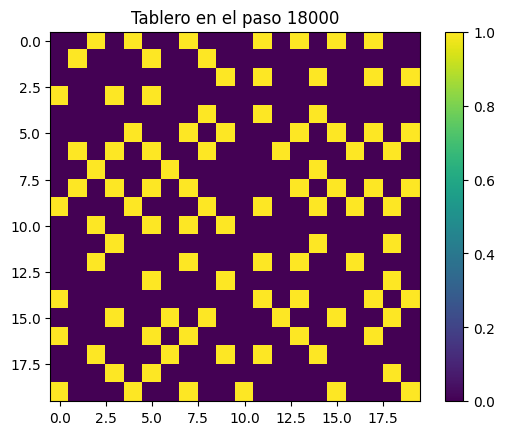

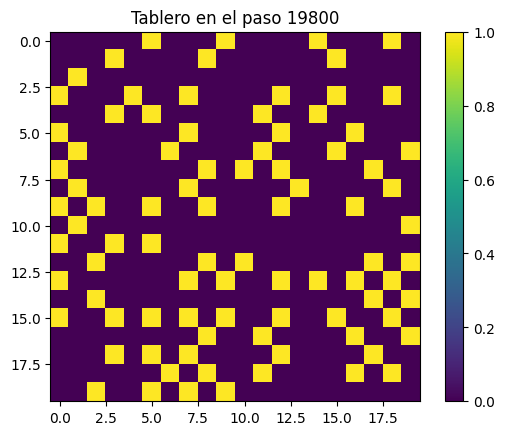

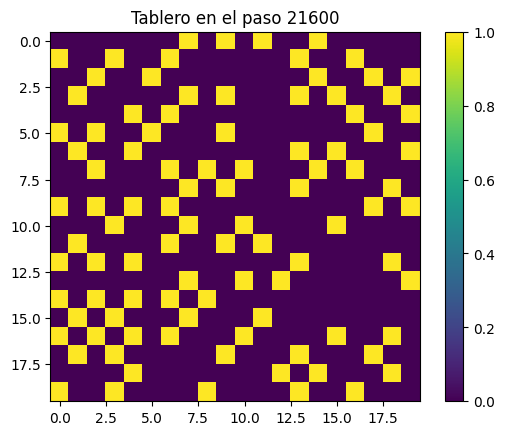

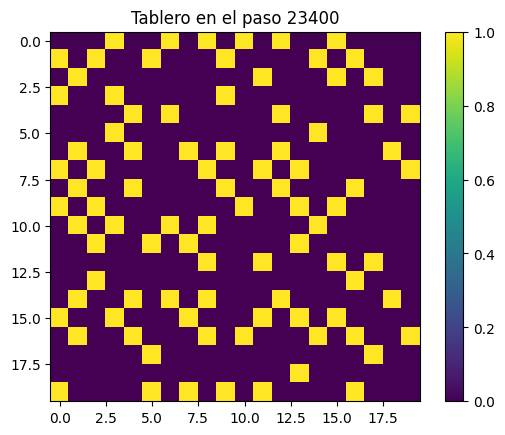

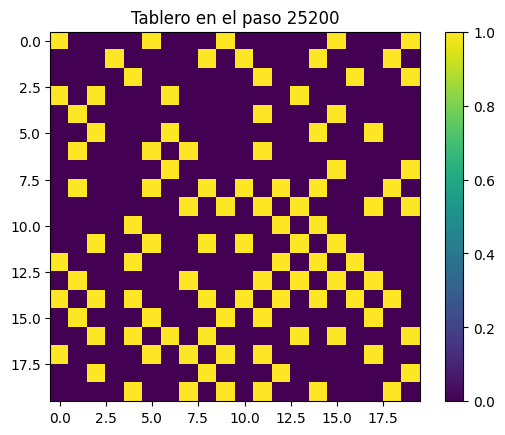

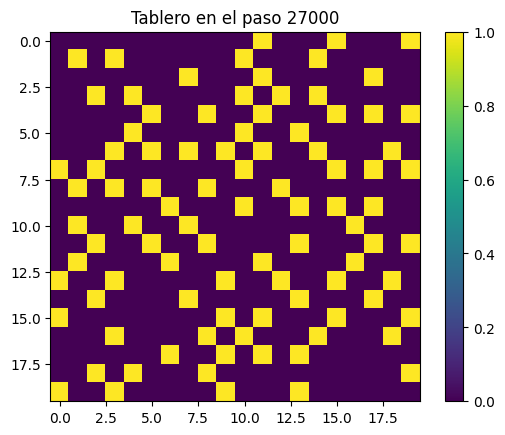

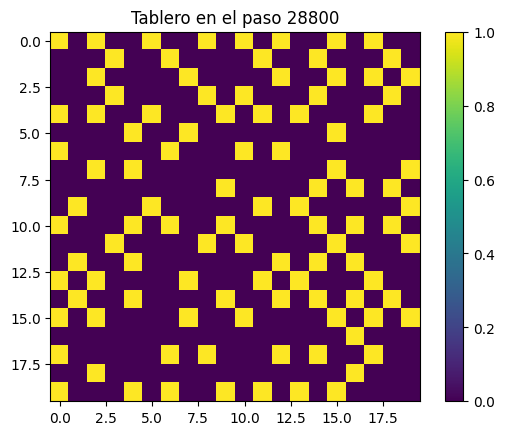

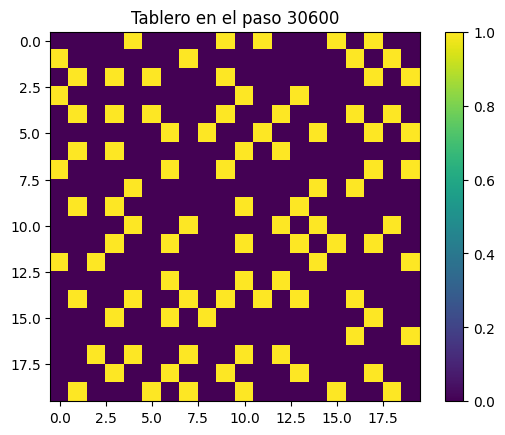

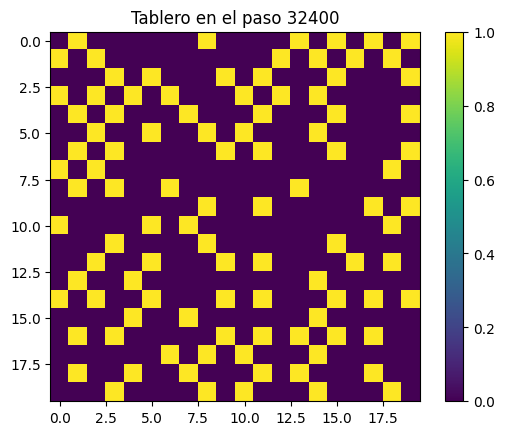

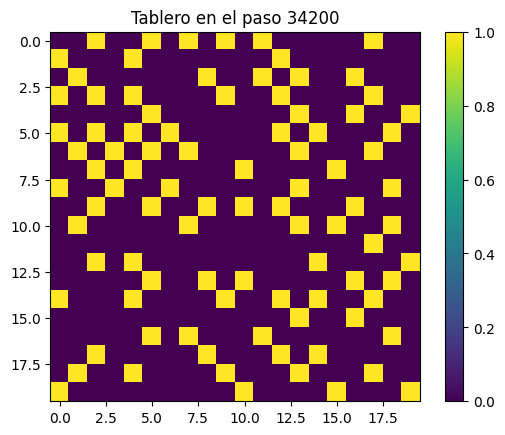

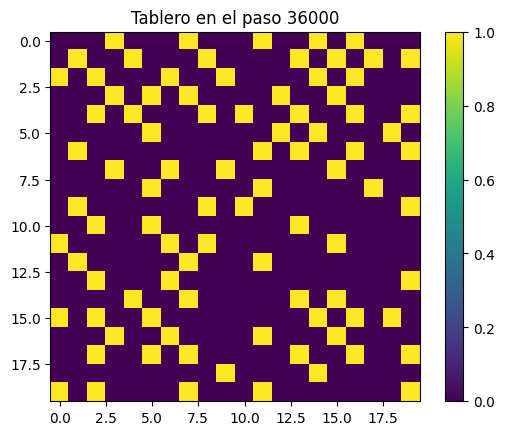

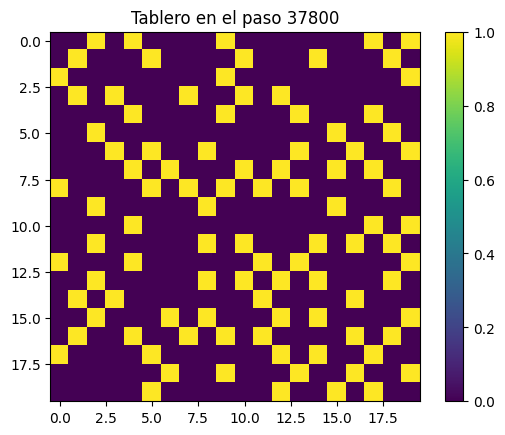

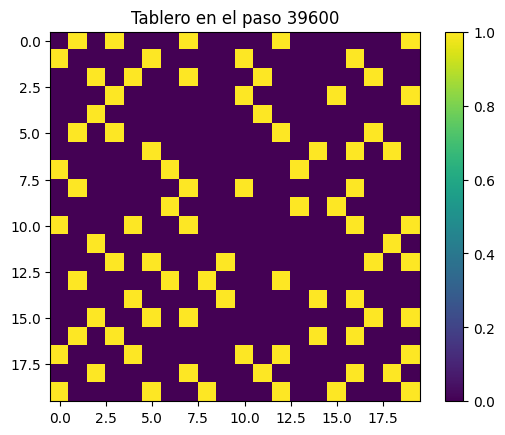

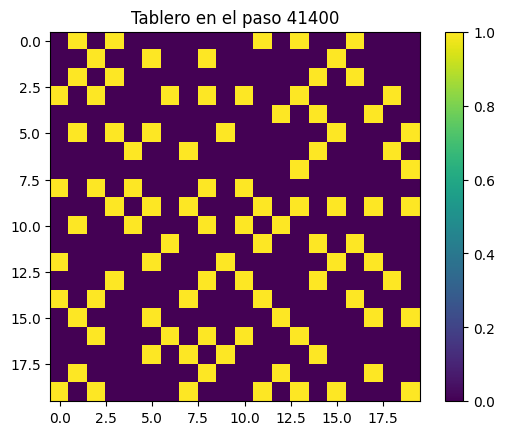

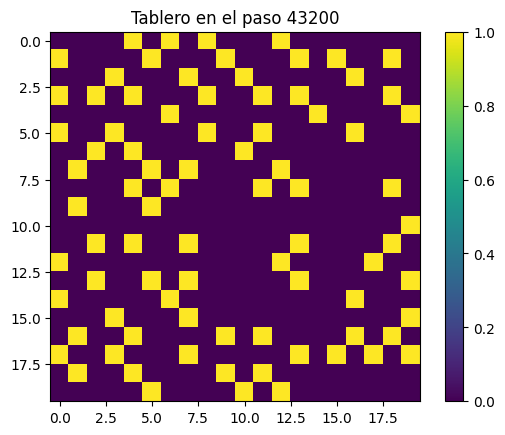

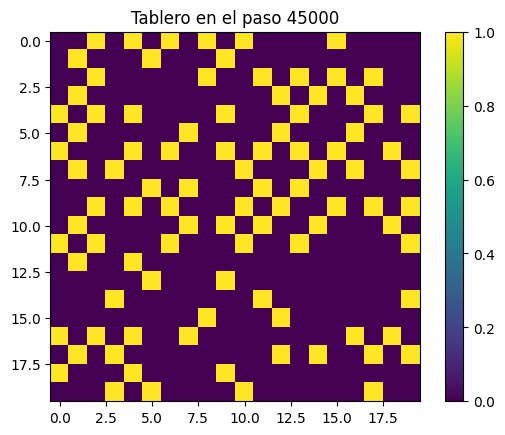

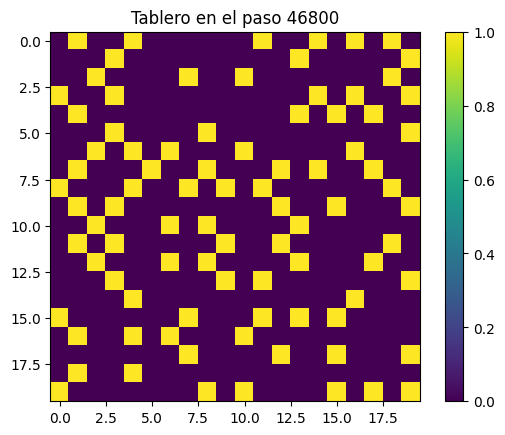

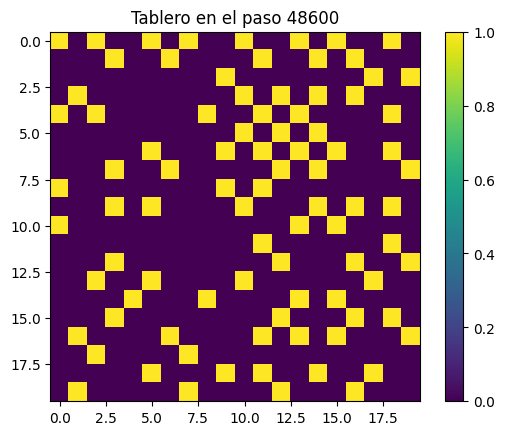

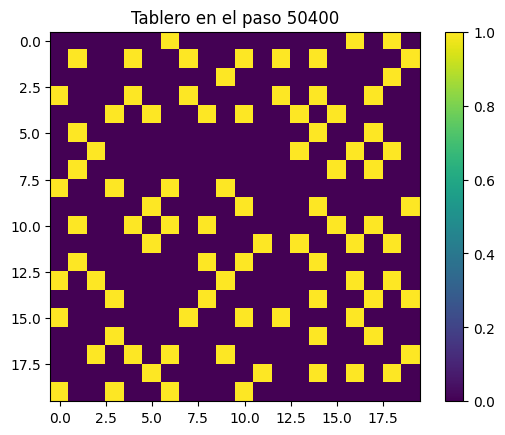

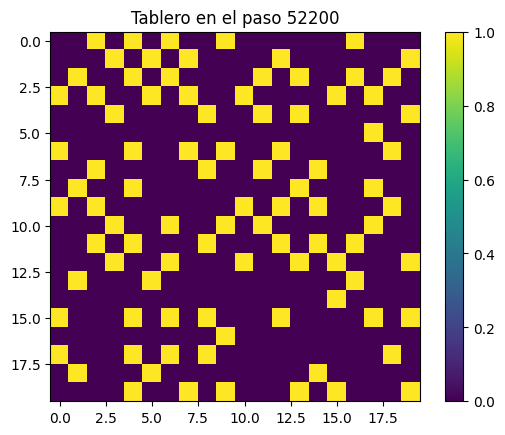

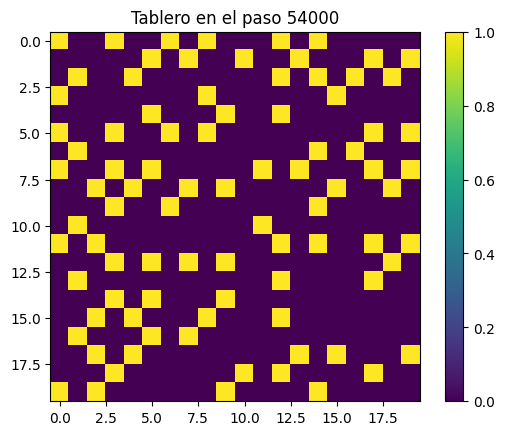

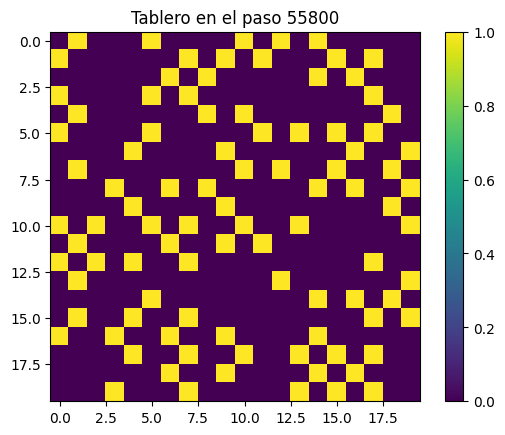

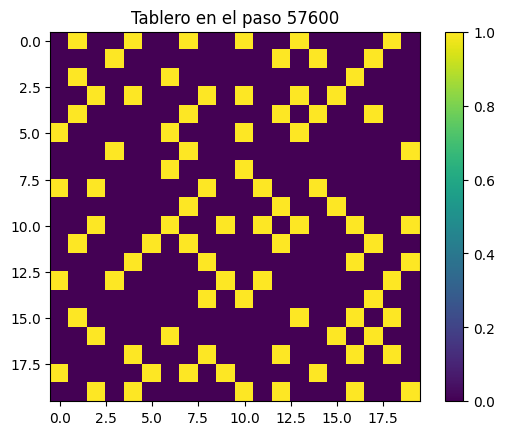

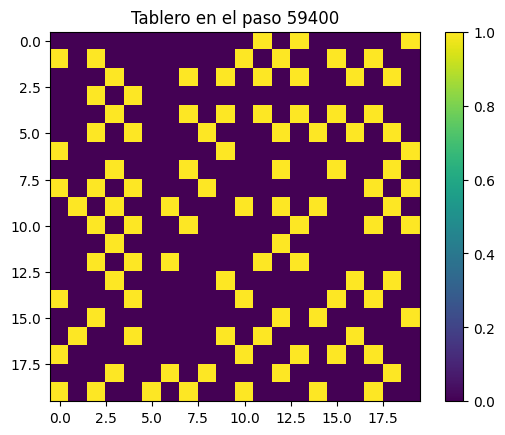

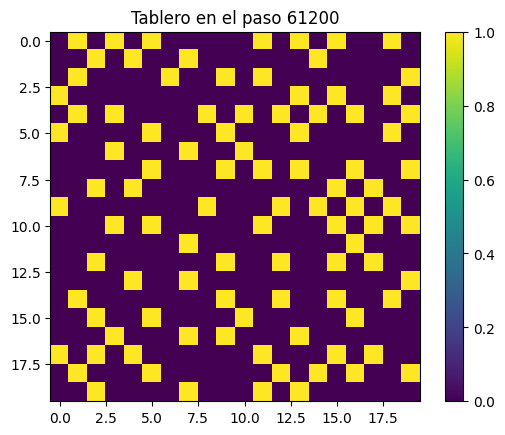

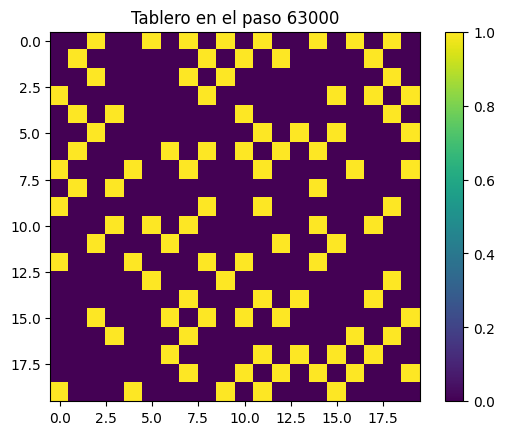

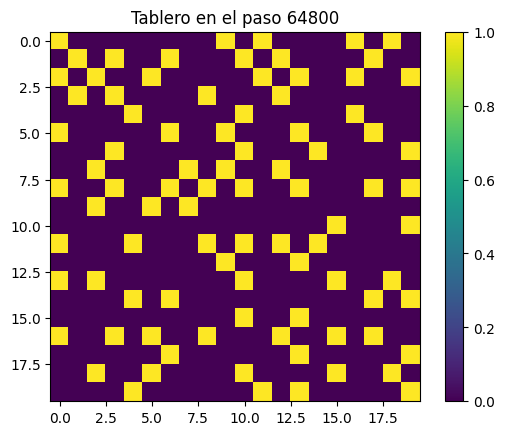

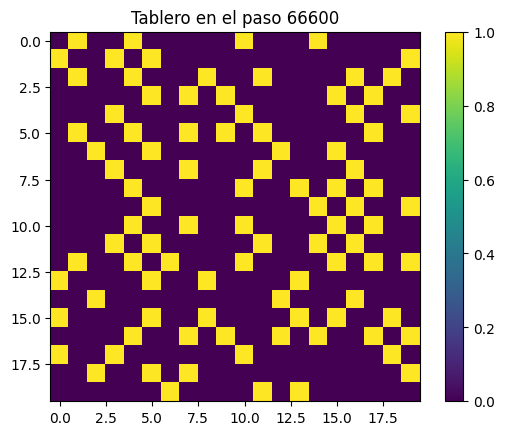

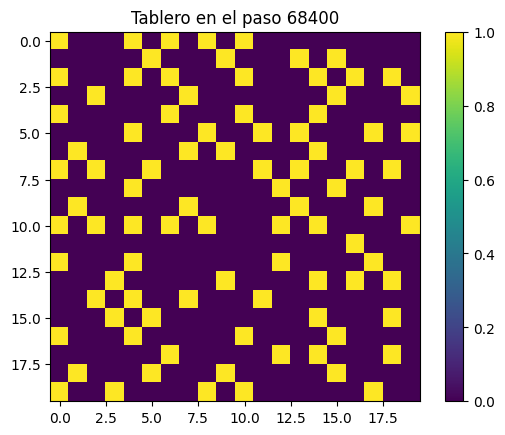

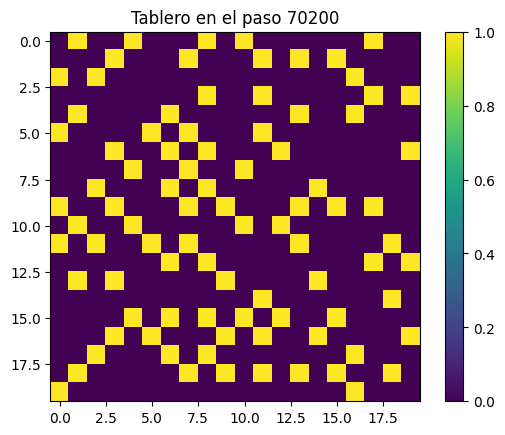

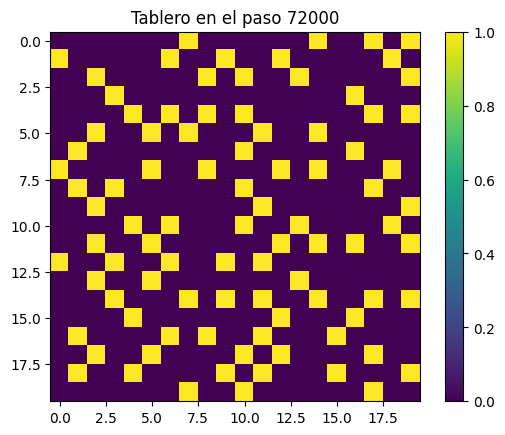

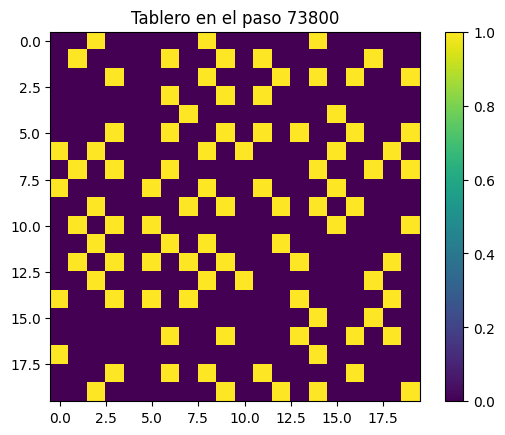

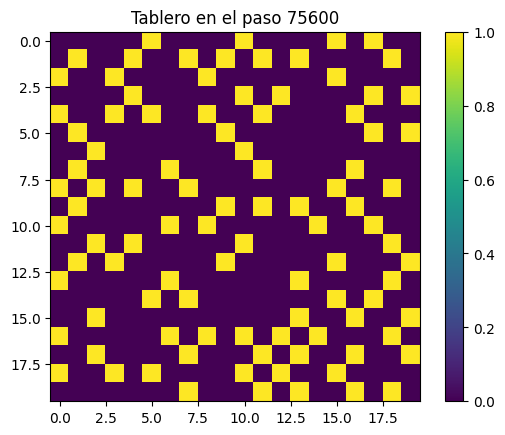

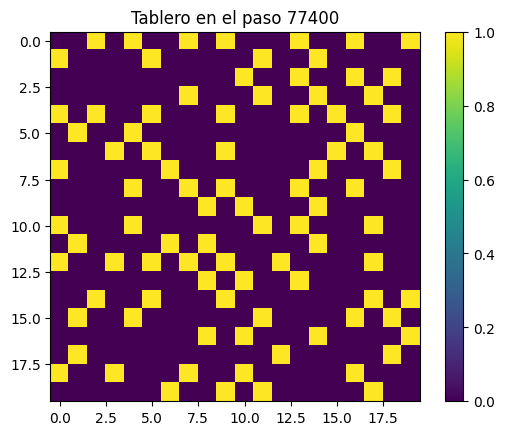

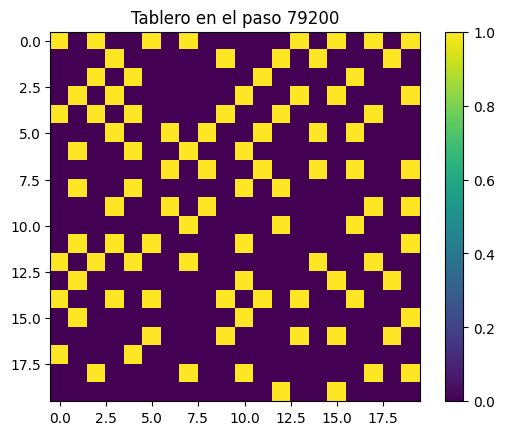

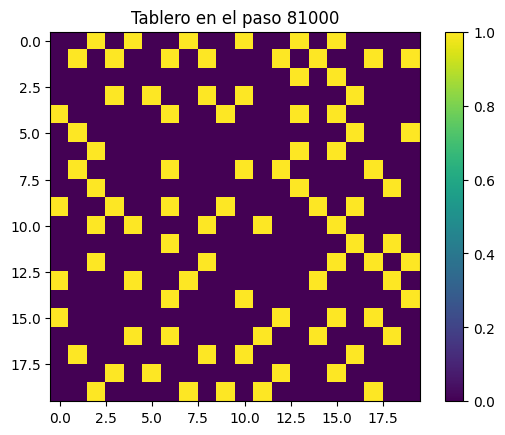

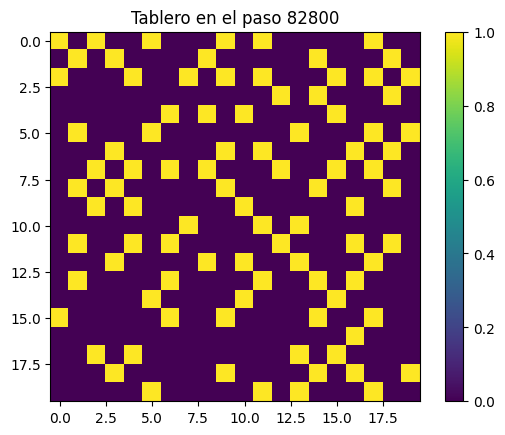

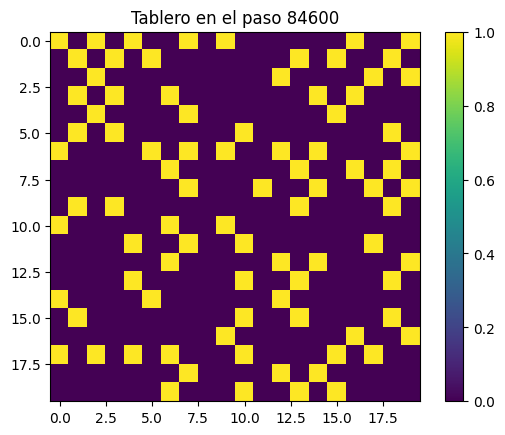

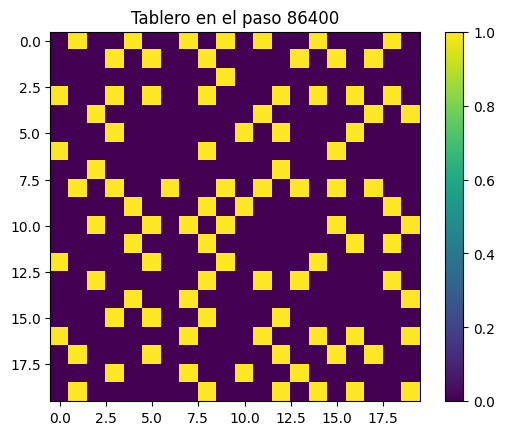

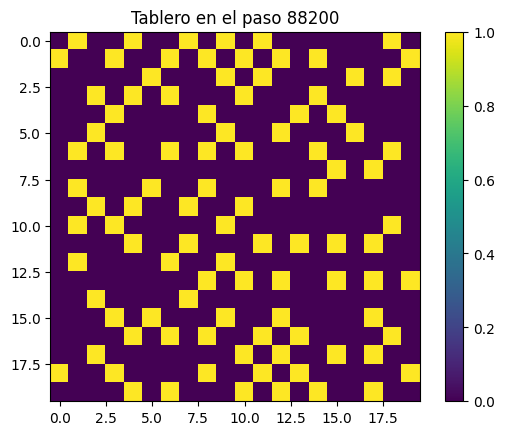

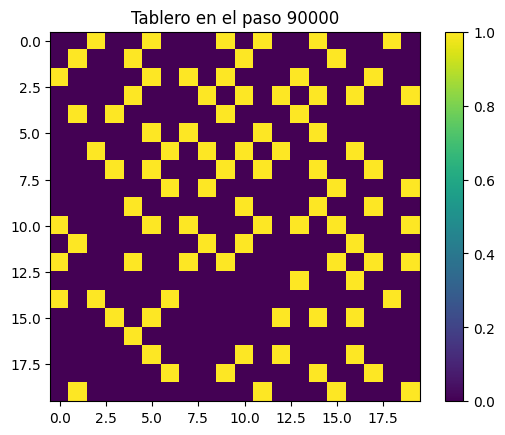

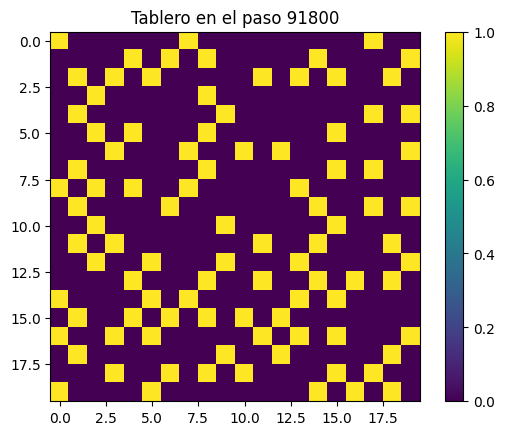

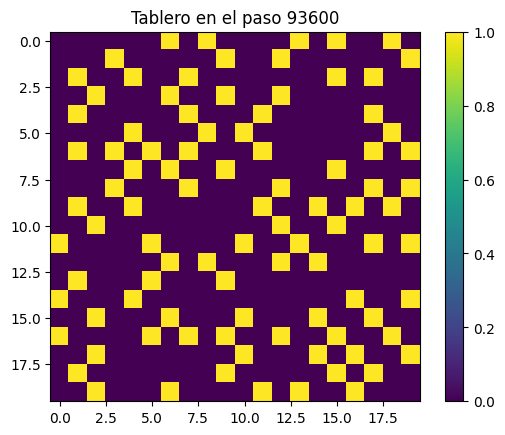

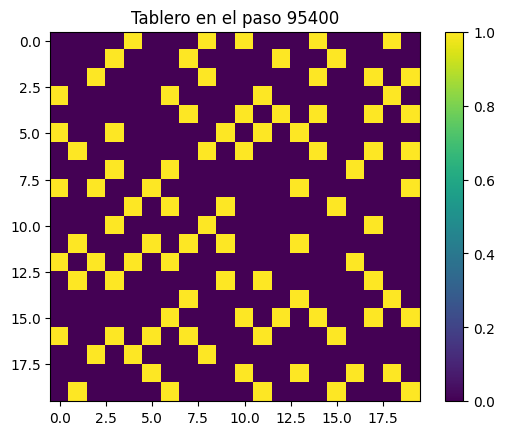

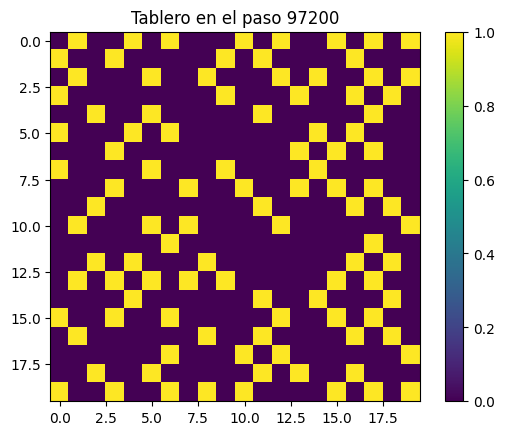

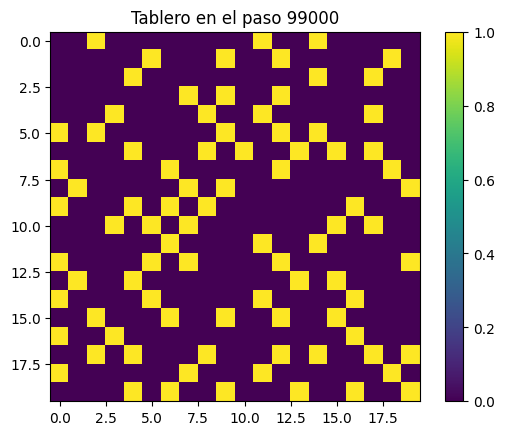

In [ ]:
final_configuration = hard_core_gibbs(dimension, iteration_total, interval=1800)

Para $k = 10$ y $X_{100000}$

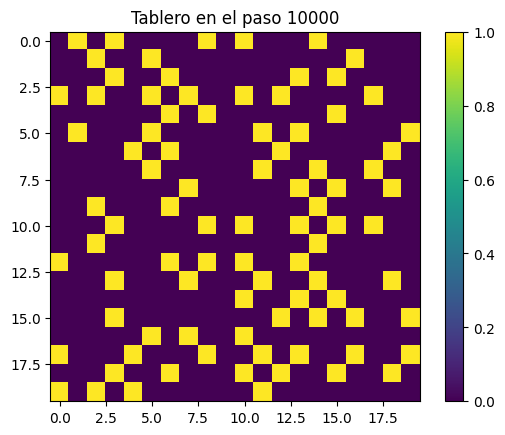

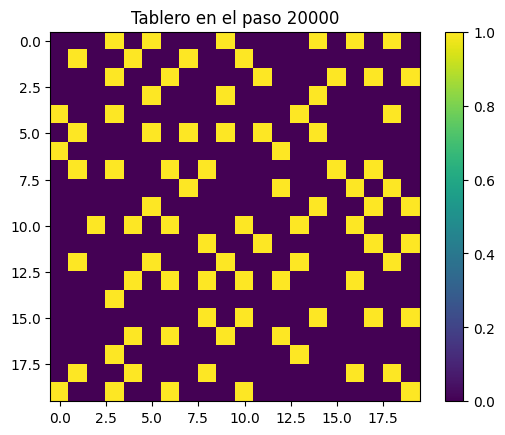

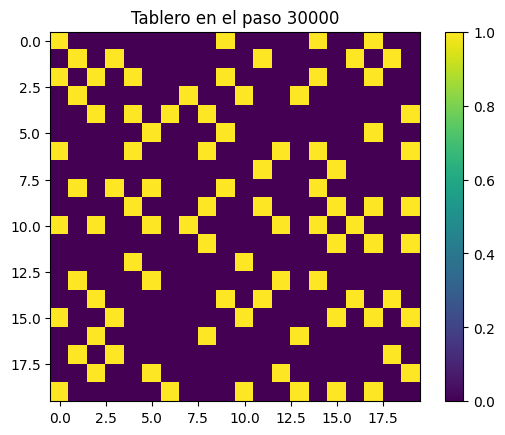

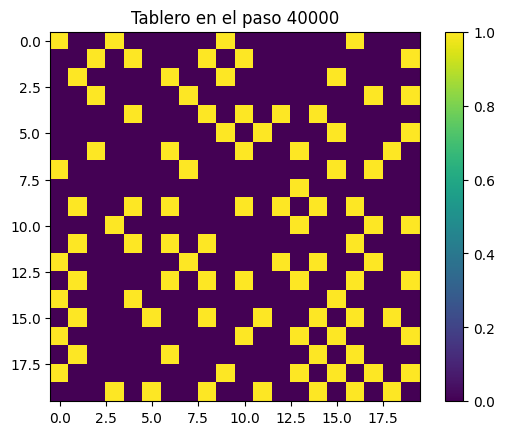

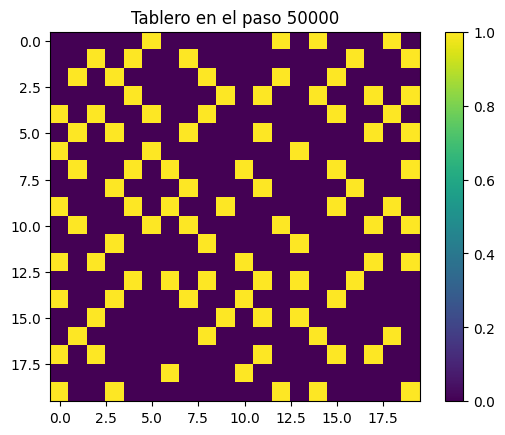

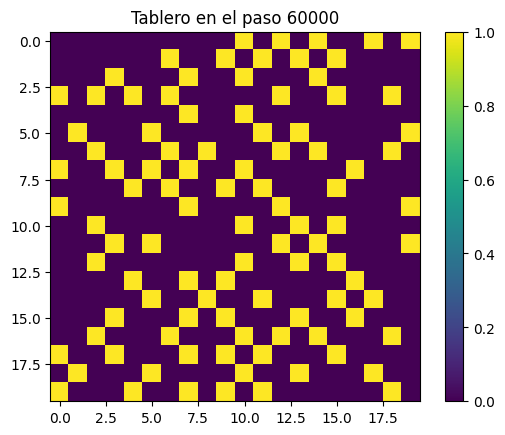

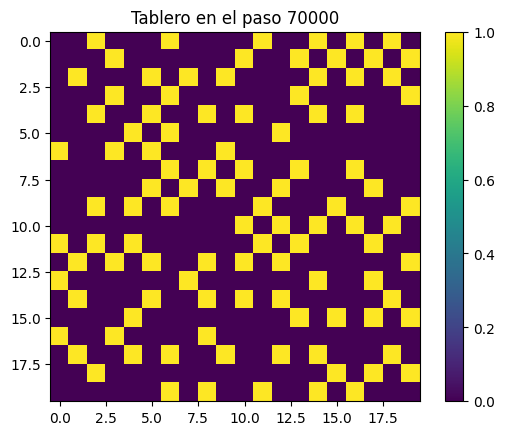

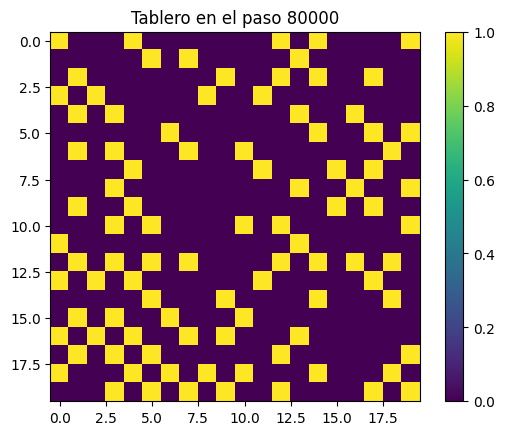

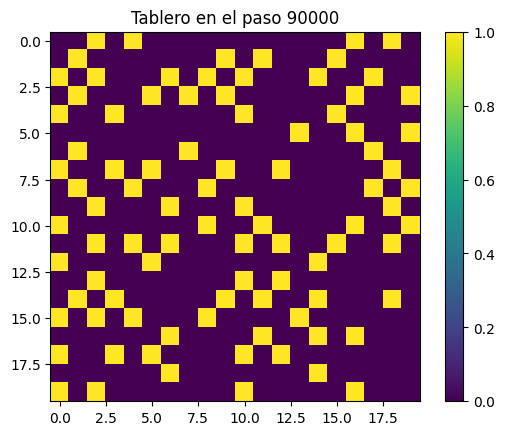

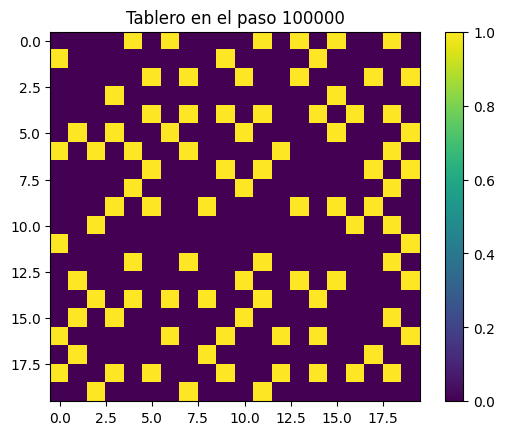

In [ ]:
final_configuration = hard_core_gibbs(dimension, iteration_total, interval=10000)

Para $k=15$ y $X_{100000}$

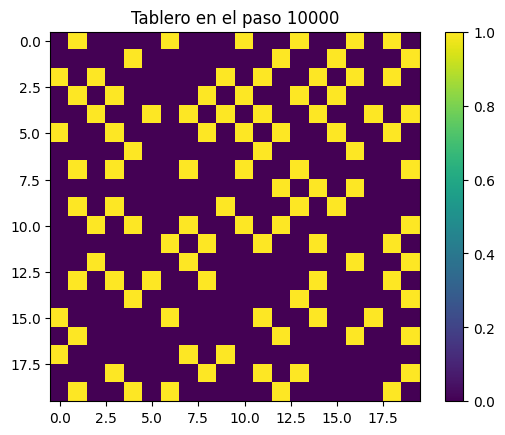

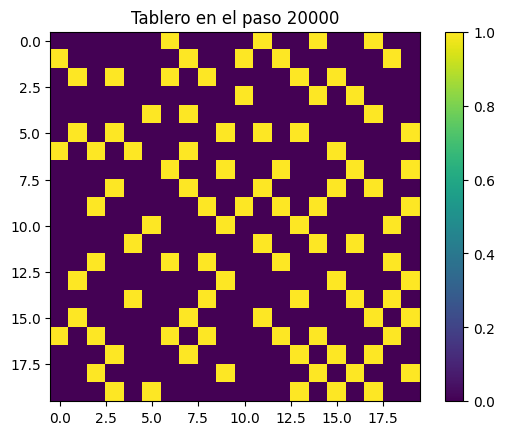

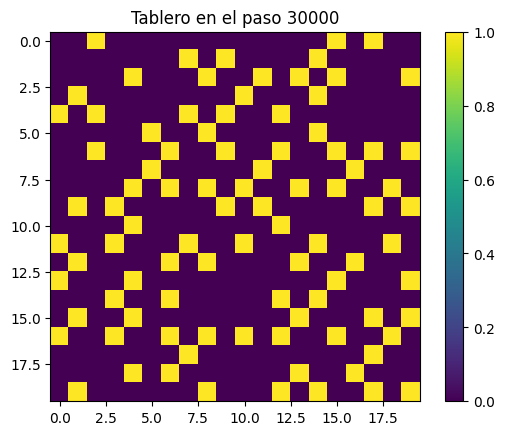

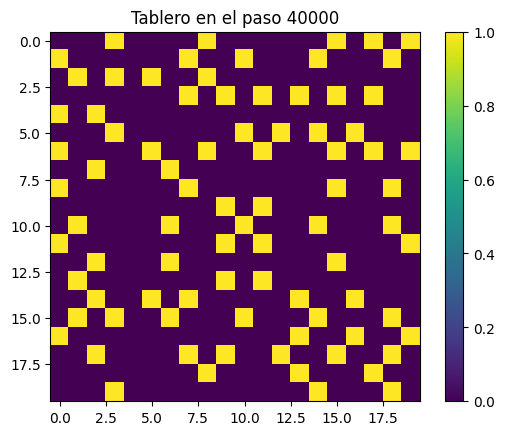

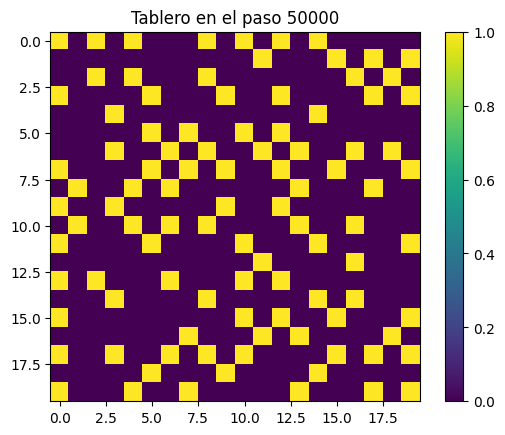

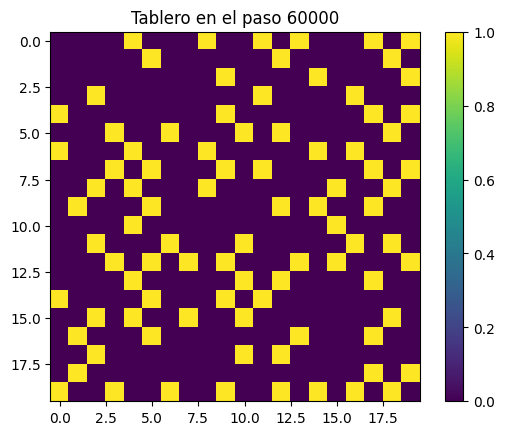

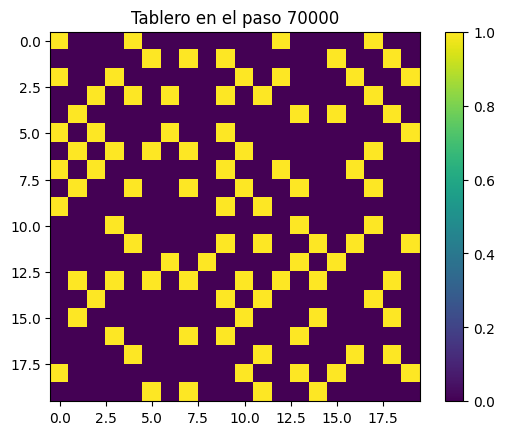

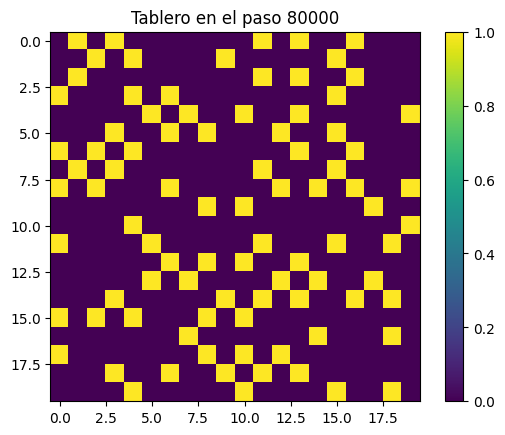

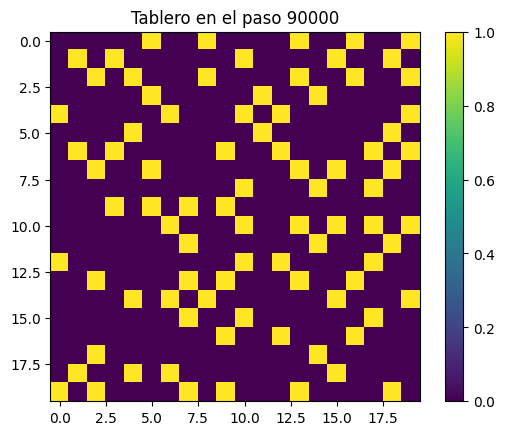

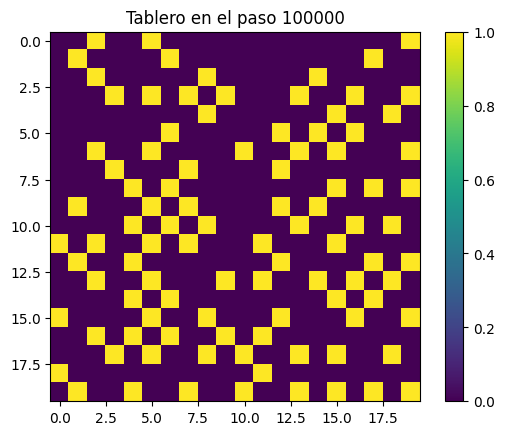

In [ ]:
final_configuration = hard_core_gibbs(dimension, iteration_total, interval=10000)

Para $k=20$ y $X_{10000}$

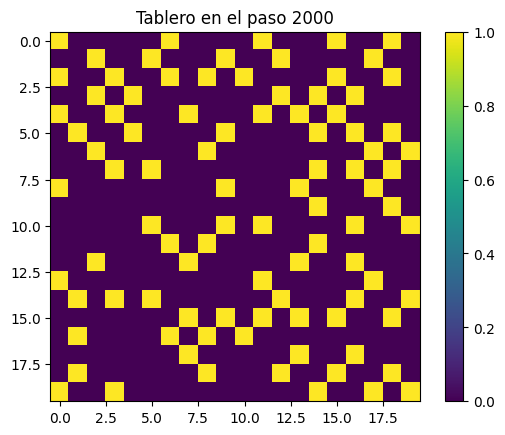

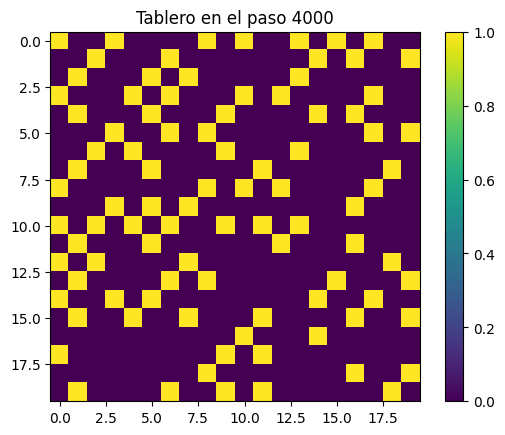

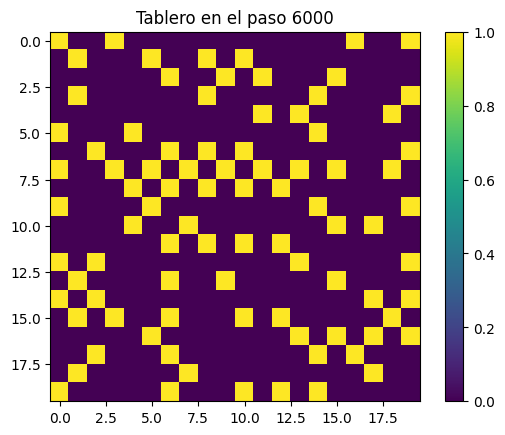

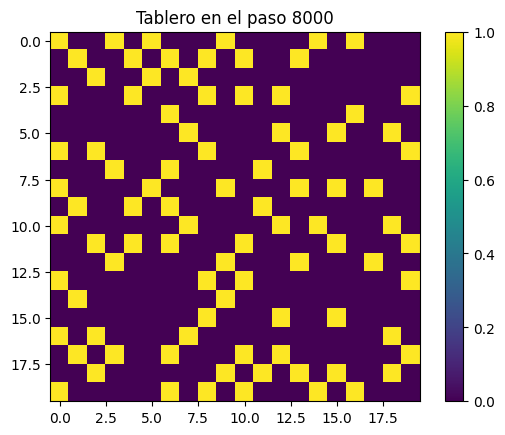

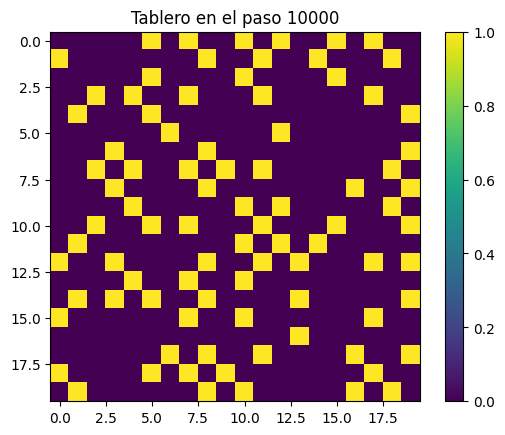

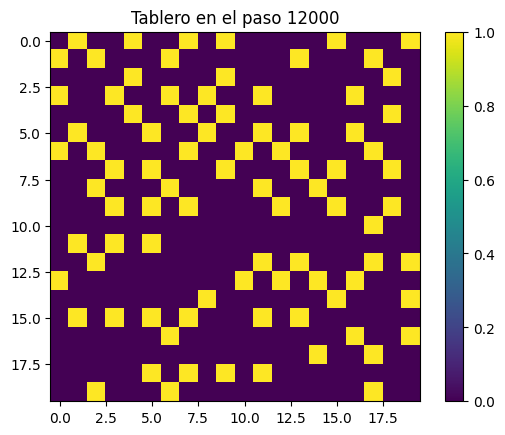

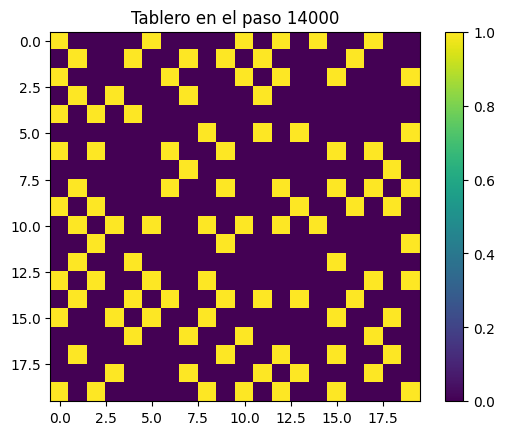

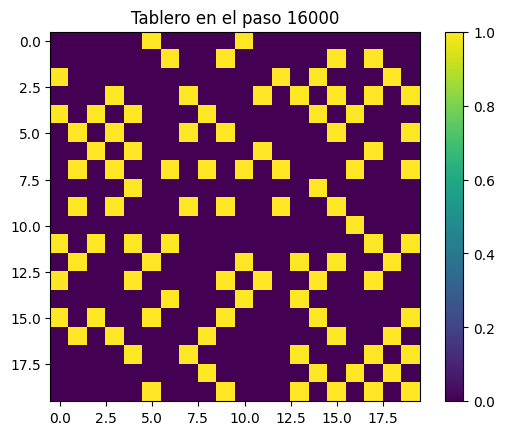

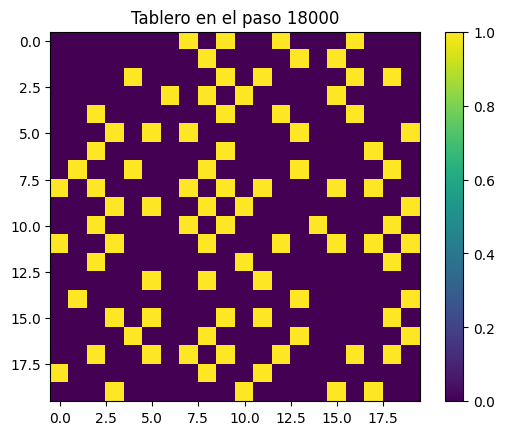

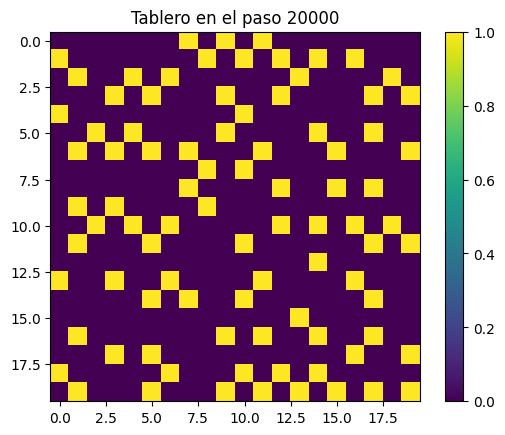

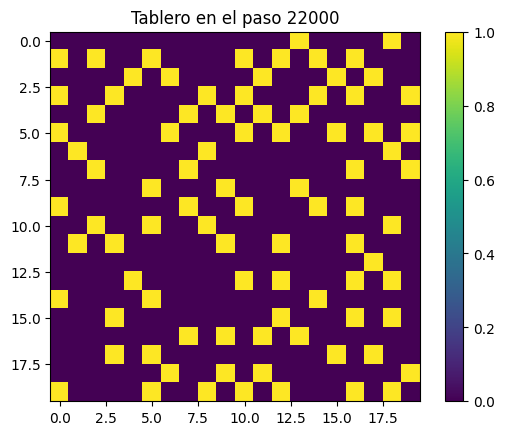

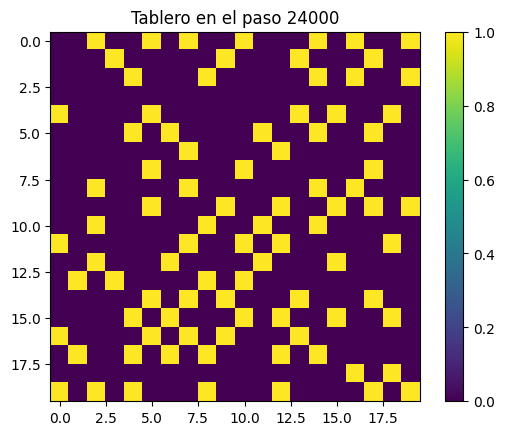

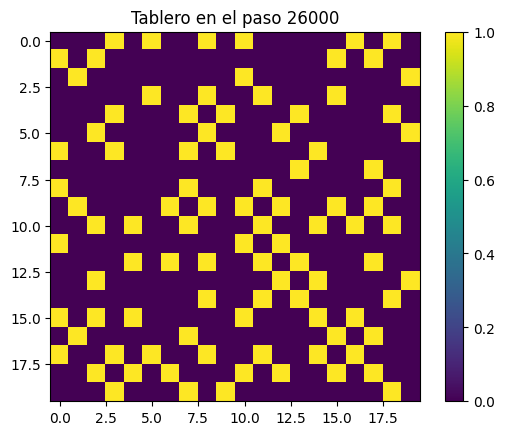

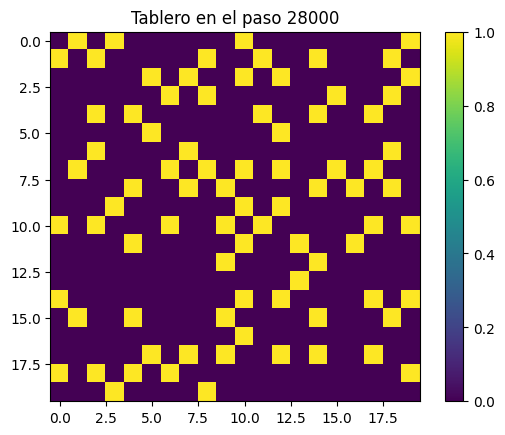

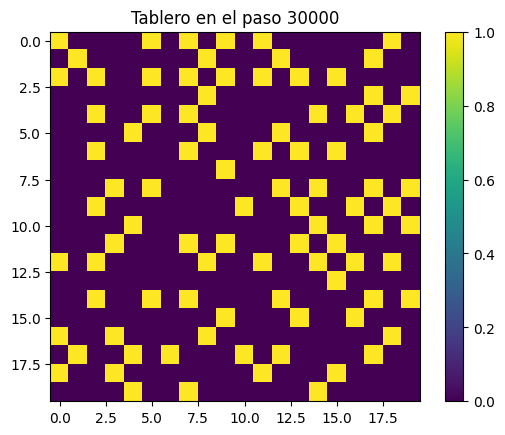

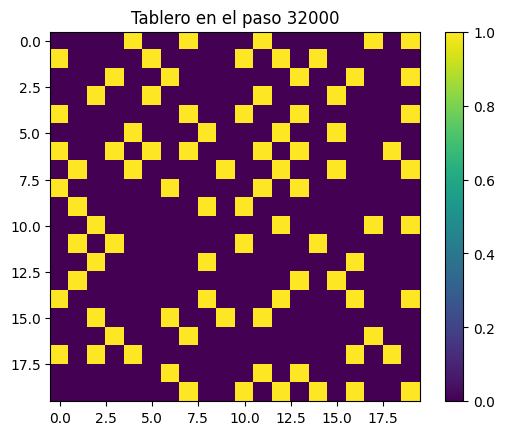

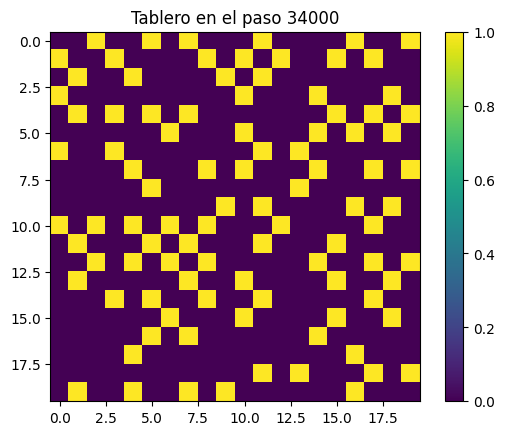

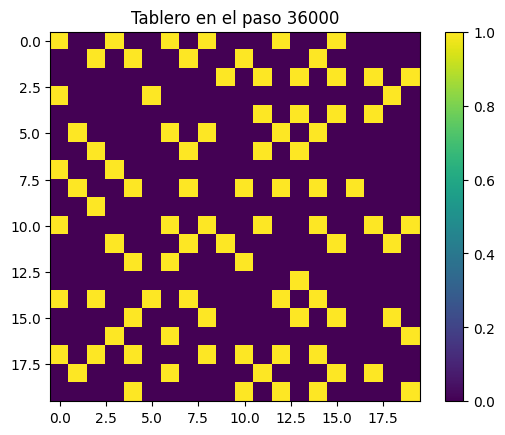

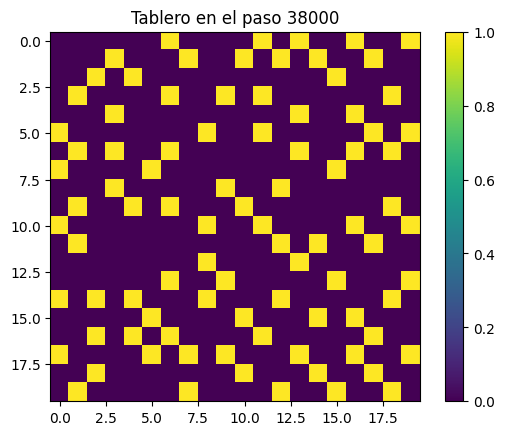

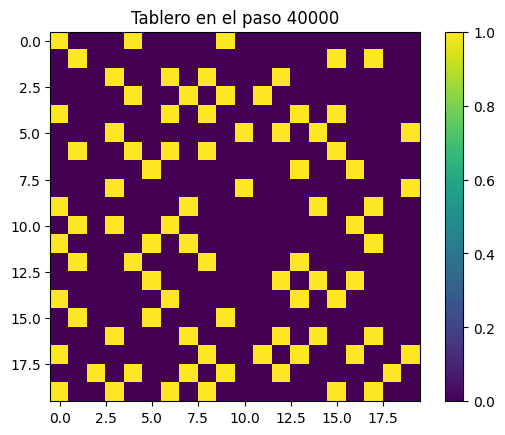

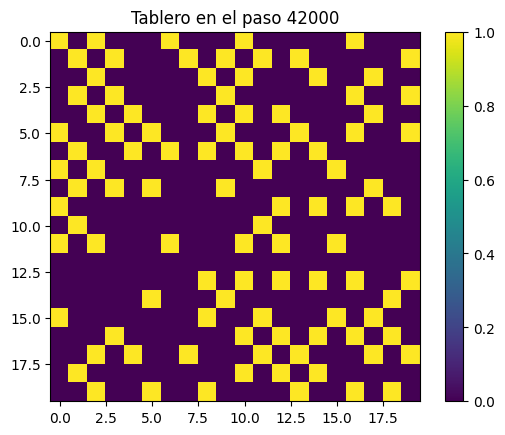

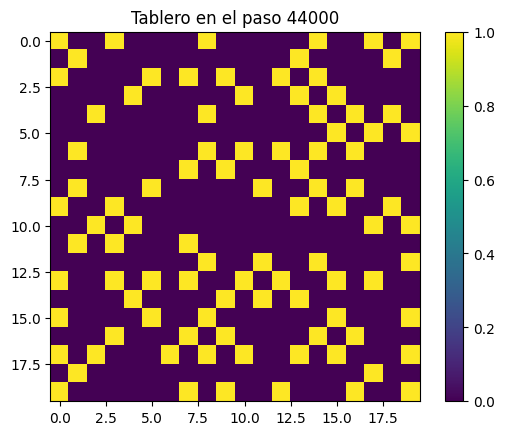

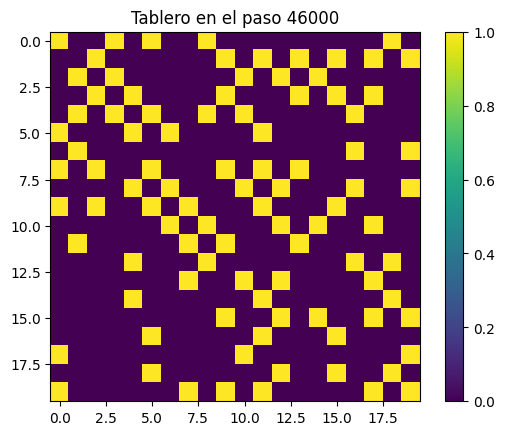

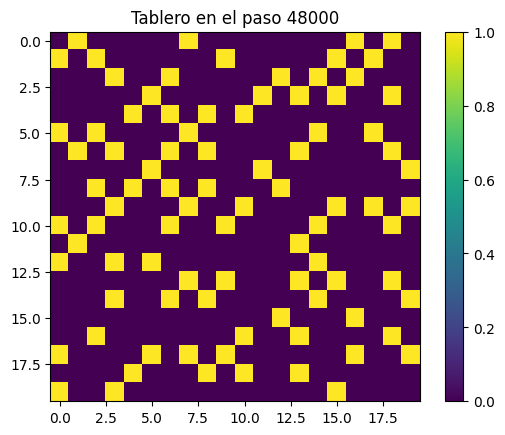

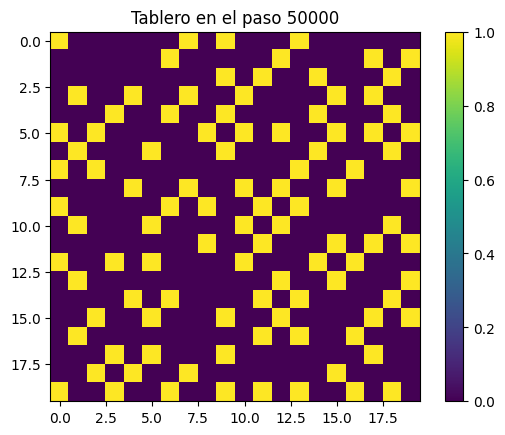

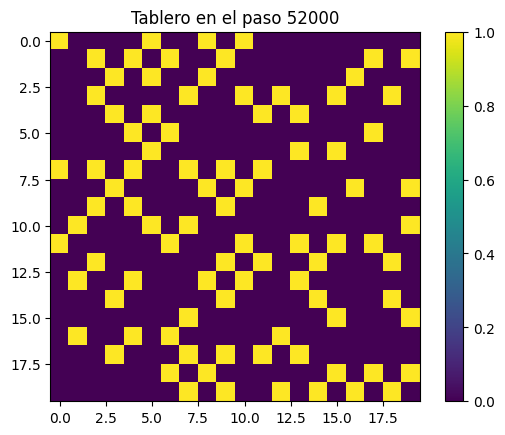

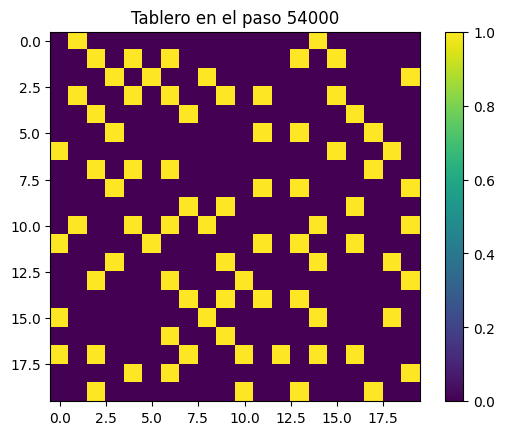

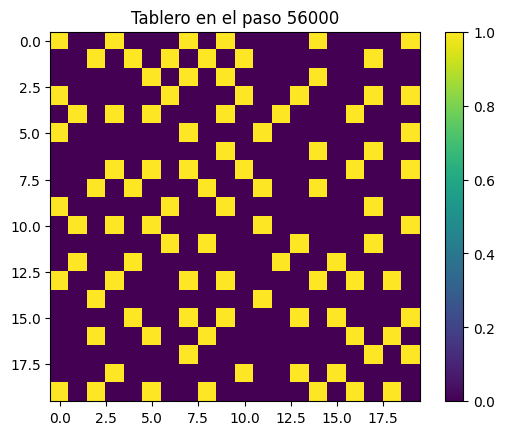

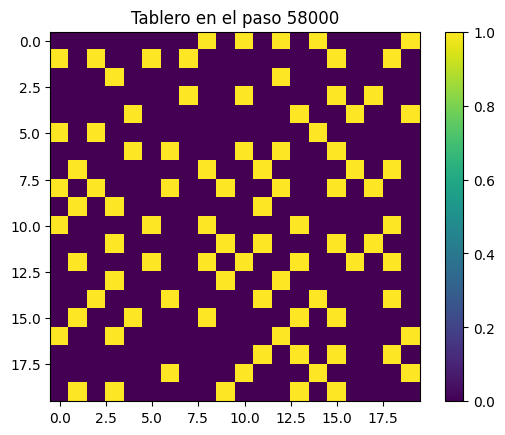

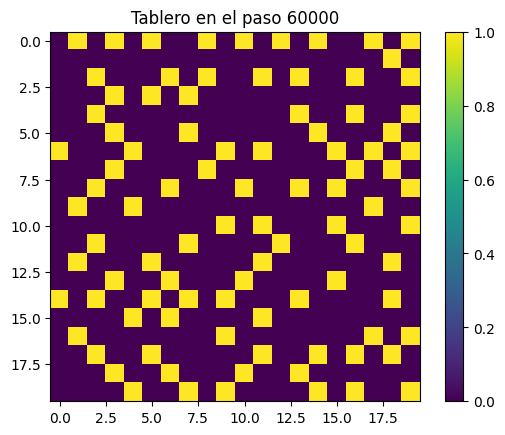

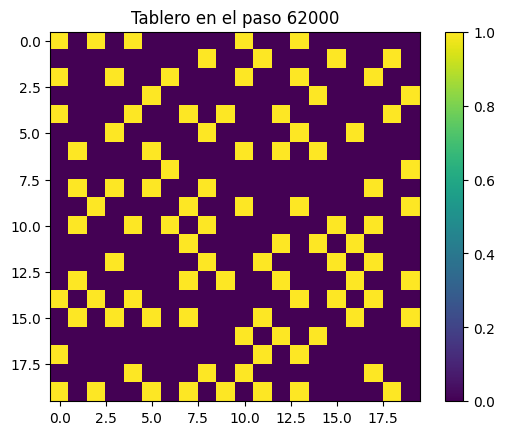

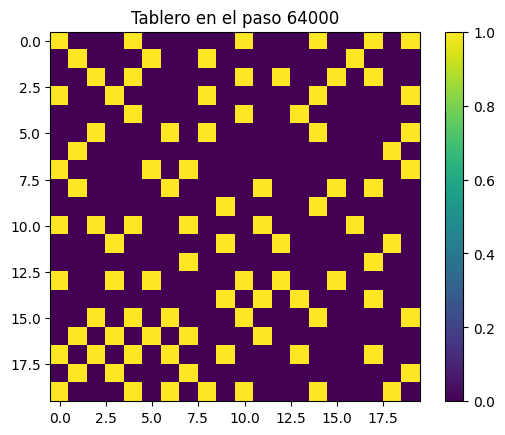

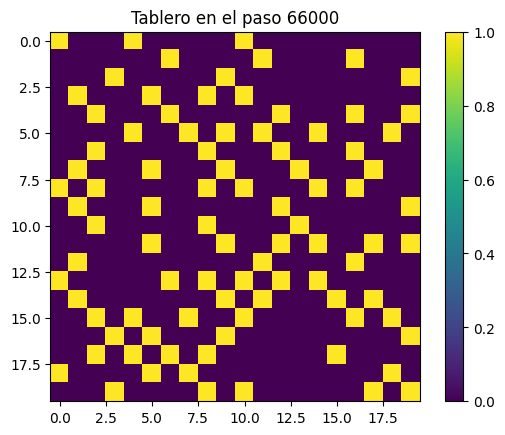

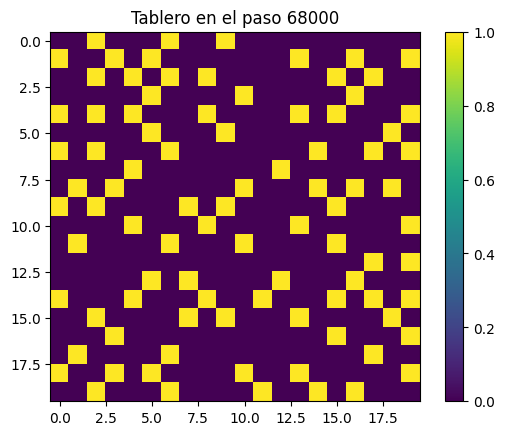

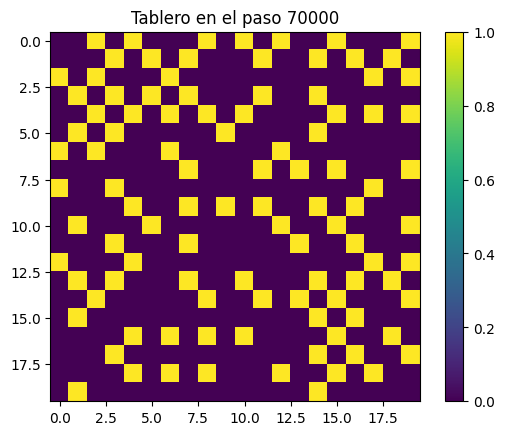

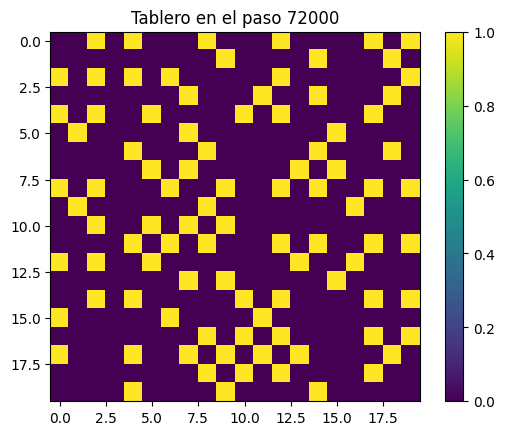

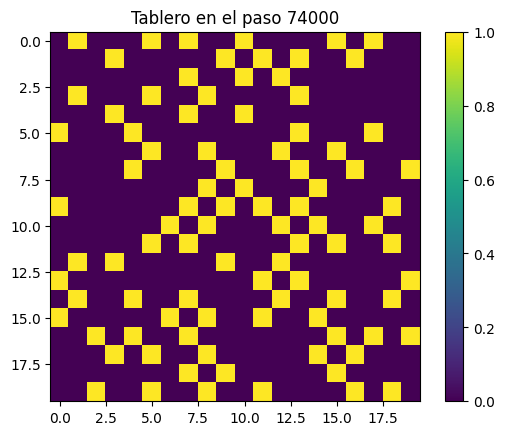

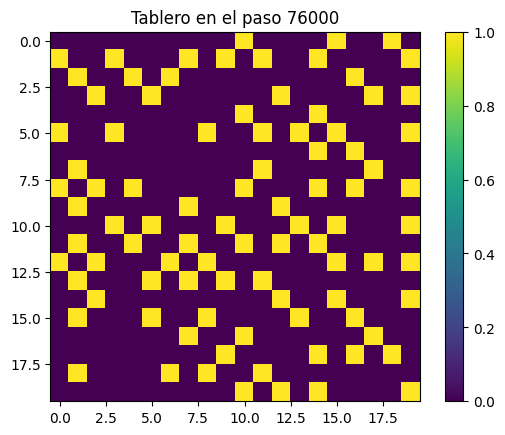

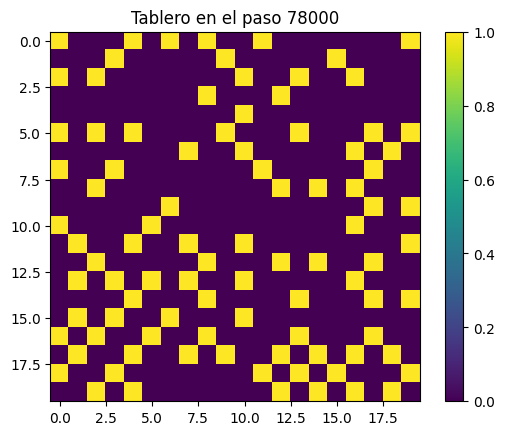

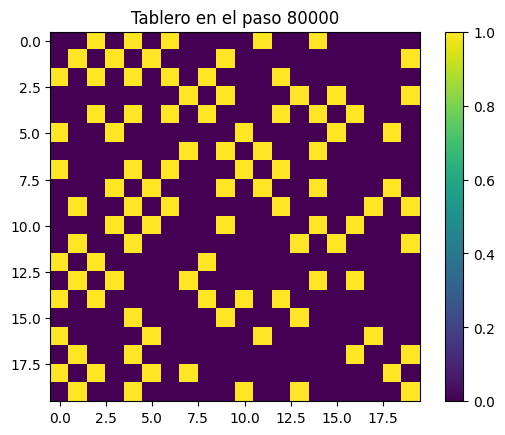

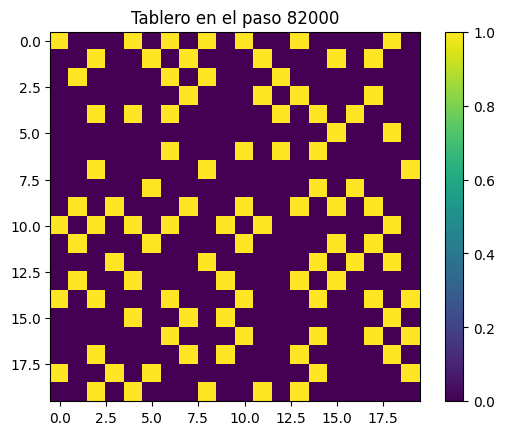

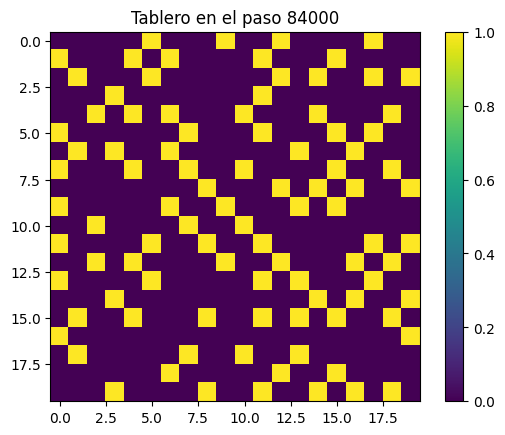

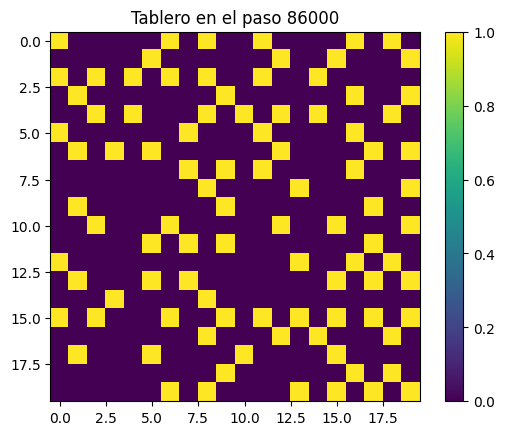

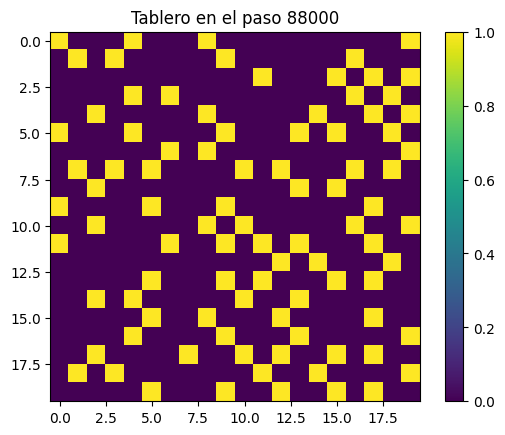

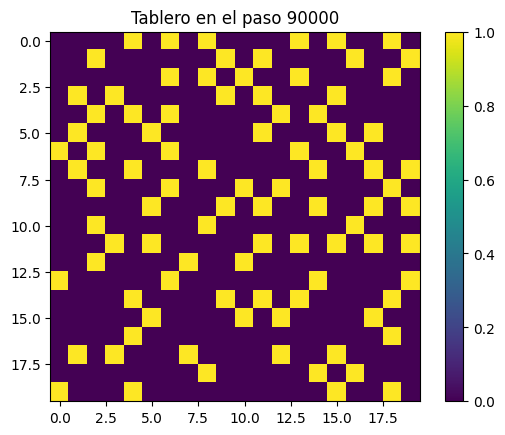

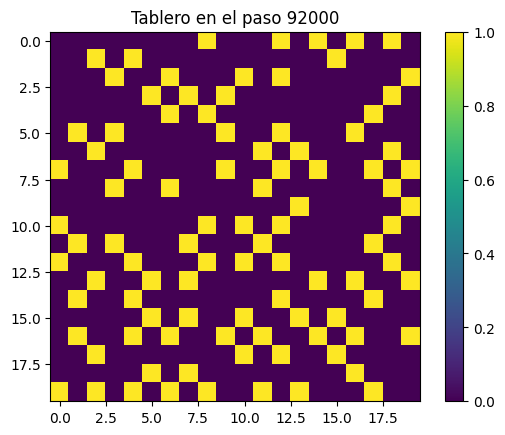

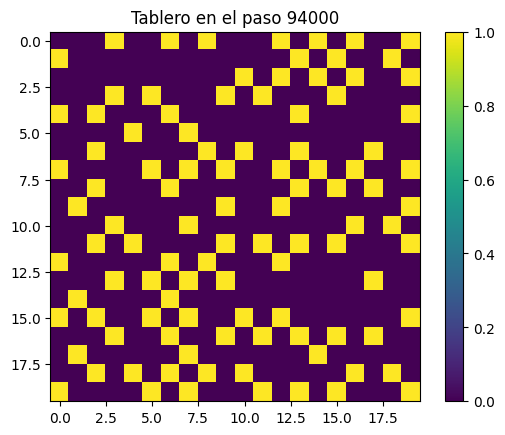

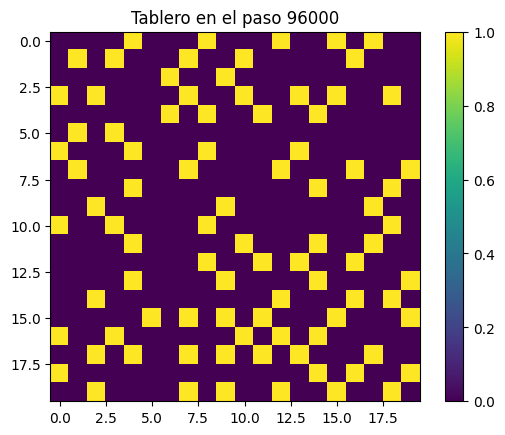

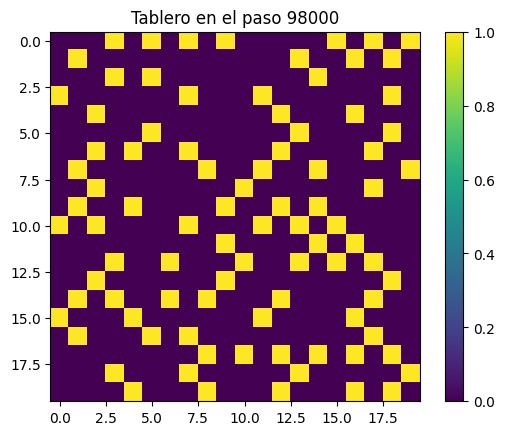

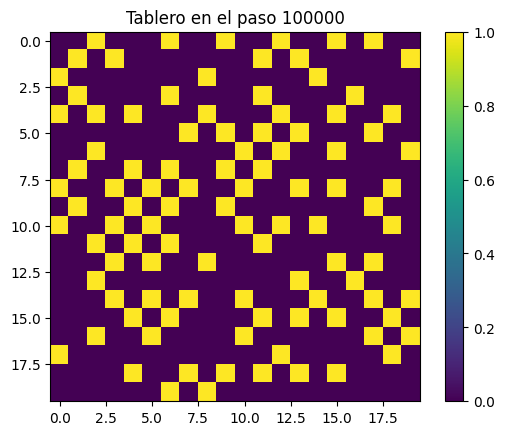

In [ ]:
final_configuration = hard_core_gibbs(dimension, iteration_total, interval=2000)

Para $k=20$ y $X_{100000}$

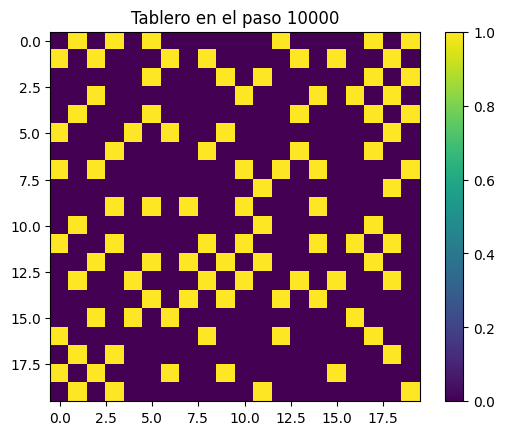

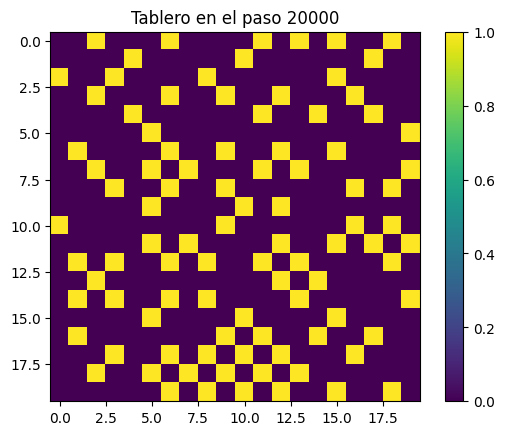

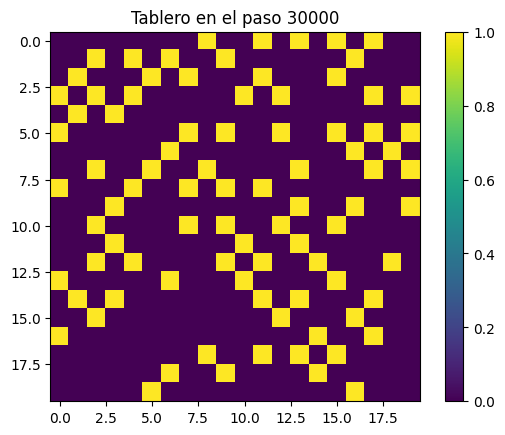

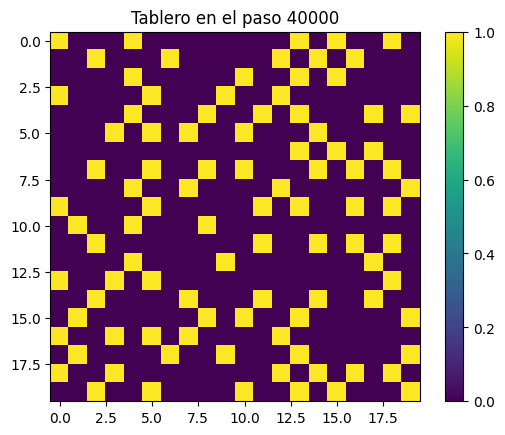

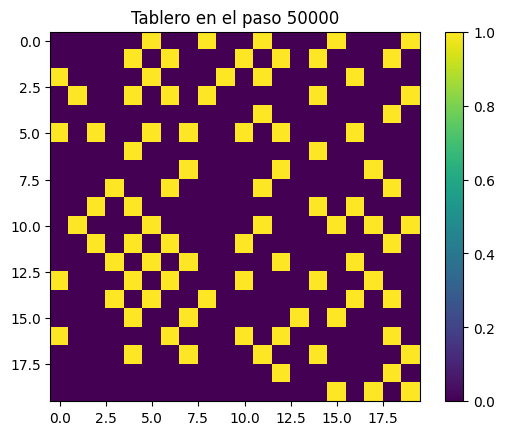

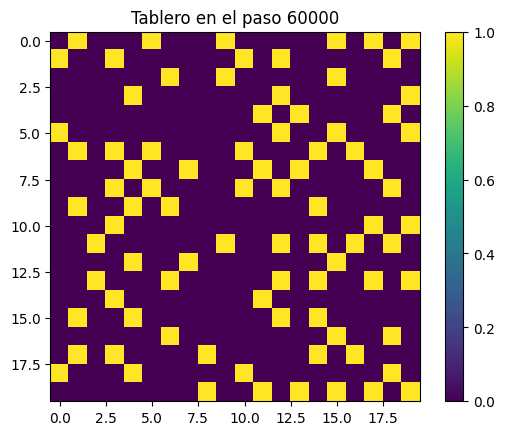

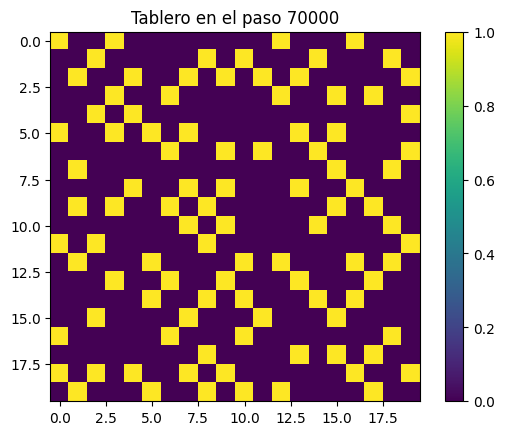

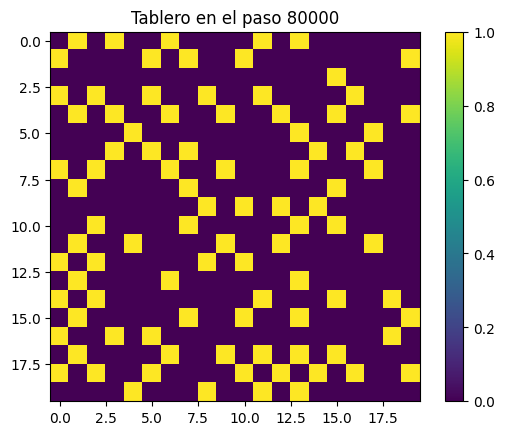

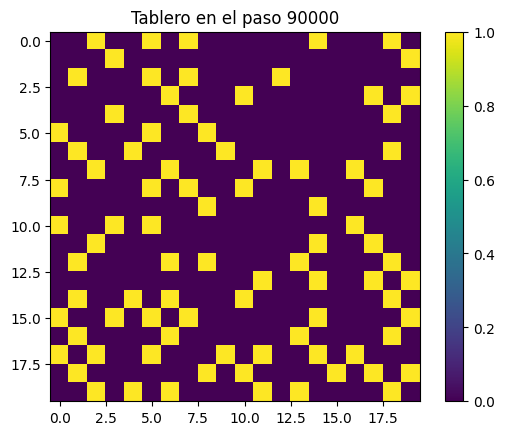

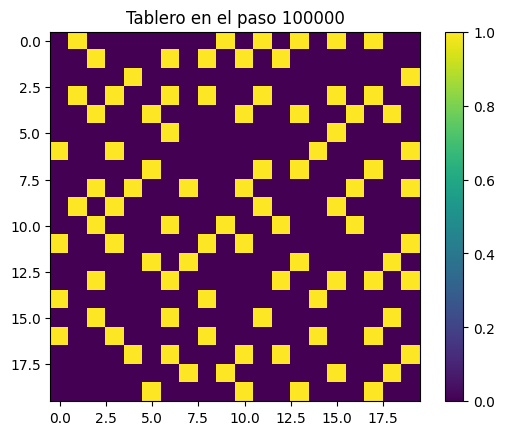

In [ ]:
final_configuration = hard_core_gibbs(dimension, iteration_total, interval=10000)

Ahora se intentará buscar los valores óptimos, es decir, que maximicen la cantidad de particulas para $k$ y $X$.

In [ ]:
def count_particles(grid):
    # Cuenta el número de partículas en el tablero
    return np.sum(grid)

In [ ]:
def check_placement(grid, row, col):
    # Verifica que no hay partículas en las celdas adyacentes
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for dr, dc in neighbors:
        r, c = row + dr, col + dc
        if 0 <= r < len(grid) and 0 <= c < len(grid[0]) and grid[r][c] == 1:
            return False
    return True

In [ ]:
def run_simulation(k, x):

  # Correr simulación sin graficar el tablero.
    grid = np.zeros((k, k), dtype=int)
    for _ in range(x):
        row, col = random.randint(0, k-1), random.randint(0, k-1)
        if grid[row][col] == 0 and check_placement(grid, row, col):
            grid[row][col] = 1
        elif grid[row][col] == 1:
            grid[row][col] = 0
    return count_particles(grid)

In [ ]:
# Definimos los rangos para k y x
k_values = range(3, 21)  # k de 3 a 20
x_values = [10000, 50000, 100000]  # x puede ser 10000, 50000 o 100000

In [ ]:
results = {}
for k in k_values:
    for x in x_values:
        particle_count = run_simulation(k, x)
        results[(k, x)] = particle_count
        print(f"Tamaño del tablero (k x k): {k}x{k}, Iteraciones(X): {x}, Particulas: {particle_count}")

Tamaño del tablero (k x k): 3x3, Iteraciones(X): 10000, Particulas: 3
Tamaño del tablero (k x k): 3x3, Iteraciones(X): 50000, Particulas: 4
Tamaño del tablero (k x k): 3x3, Iteraciones(X): 100000, Particulas: 3
Tamaño del tablero (k x k): 4x4, Iteraciones(X): 10000, Particulas: 4
Tamaño del tablero (k x k): 4x4, Iteraciones(X): 50000, Particulas: 4
Tamaño del tablero (k x k): 4x4, Iteraciones(X): 100000, Particulas: 5
Tamaño del tablero (k x k): 5x5, Iteraciones(X): 10000, Particulas: 8
Tamaño del tablero (k x k): 5x5, Iteraciones(X): 50000, Particulas: 5
Tamaño del tablero (k x k): 5x5, Iteraciones(X): 100000, Particulas: 8
Tamaño del tablero (k x k): 6x6, Iteraciones(X): 10000, Particulas: 10
Tamaño del tablero (k x k): 6x6, Iteraciones(X): 50000, Particulas: 9
Tamaño del tablero (k x k): 6x6, Iteraciones(X): 100000, Particulas: 8
Tamaño del tablero (k x k): 7x7, Iteraciones(X): 10000, Particulas: 6
Tamaño del tablero (k x k): 7x7, Iteraciones(X): 50000, Particulas: 9
Tamaño del tabl

#Conclusiones parciales

* se observa que para tamaños de tablero menores (3×3 a 6×6), las variaciones en el número de iteraciones tienen un impacto menos significativo en la cantidad de partículas para el modelo Hard-Core en comparación con los tableros más grandes. Esto puede ser indicativo de la limitación física del espacio disponible que restringe la capacidad del sistema para acomodar más partículas sin violar la restricción Hard-Core, independientemente del número de iteraciones realizadas.

* Para tamaños de tablero más grandes (10×10 en adelante), se evidencia un aumento notable en la cantidad de partículas a medida que el número de iteraciones se incrementa, especialmente notable en los rangos más altos de iteraciones (50000 y 100000). Este fenómeno sugiere que, dado un espacio suficientemente amplio, el sistema se beneficia de un mayor número de iteraciones para explorar y estabilizarse en configuraciones que maximizan la densidad de partículas.

* Una observación clave de este experimento es que para tamaños de tablero relativamente grandes, es crucial permitir un número suficiente de iteraciones para que el sistema explore adecuadamente el espacio de configuraciones posibles y se acerque a una distribución óptima de partículas. La realización de un número de iteraciones demasiado bajo en estos casos probablemente no permitirá alcanzar el máximo potencial del sistema para acomodar partículas bajo las restricciones del modelo Hard-Core. Esto subraya la naturaleza intrínsecamente ligada de la dimensión del espacio de configuraciones y el proceso estocástico representado por las cadenas de Markov en la búsqueda de estados óptimos en sistemas complejos.



---




#2.  Usar las muestras generadas en el ejercicio anterior para estimar el numero de particulas "típico" que tiene una configuración factible en la rejilla ($k$ x $k$)  
* Realice un histograma que refleje la frecuencia y el número de particulas
* Verifique como cambia el histograma si en el paso 1) se toman en ves de $X_{10000}$ o $X_{100000}$ otros tiempos de la cadena {$X_{t}$}






Solución:

Es importante recordar que para obtener una estimación precisa se deben generar un número suficente de muestras y dejar que el algoritmo converja adecuadamente para exportar la distribución de probabilidad efectiva (Ejercicio 1)

Para estimar el numero "típico" de particulas que tiene una configuracion factible en la rejilla $k$x$k$ (valor esperado) usando el metodo Monte Carlo tenemos que el estimador del número medio de particulas despues de k muestras esta dado por:

$\hat{n}^{(k)} = \frac{1}{k} \sum_{i=1}^{k} n^{(i)}$

donde $\hat{n}^{(k)}$ es el estimador del número medio de particulas y $n^{(i)}$ es el numero de particulas en el i-esima muestra.

Pero como las muestras en juego son el resultado de una simulación usando el algoritmo Gibbs Sampler para varias combianaciones del tamaño de la rejilla ($\approx$3 $\leq k \leq 20$) se puede tomar el estimador para cada conjunto de muestras y posteriormente el promedio , para así obtener la estimación del número típico de particulas que tiene una configuración factible en la rejilla



#Rejilla de 20x20

Se toman las muestras de la rejilla 20x20 en diferentes iteraciones del intervalo [10000,100000] usaremos diferentes (numero de mustras) salto por tiempo de computo

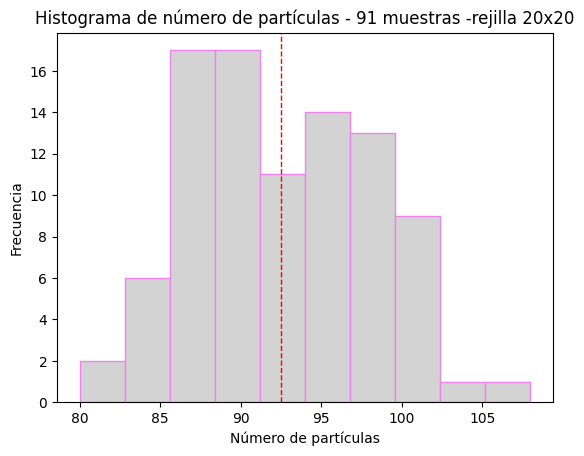

Promedio: 92.50549450549451


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


valores = [86, 88, 94, 86, 95, 100, 91, 94, 98, 90, 96, 95, 92, 97, 86, 97, 97, 97, 81, 91, 92, 89, 105, 92, 96, 93, 93, 97, 88, 86, 97, 94, 89, 90, 93, 89, 88, 94, 96, 88, 85, 92, 94, 93, 99, 102, 93, 91, 90, 99, 94, 90, 87, 100, 101, 86, 91, 93, 85, 80, 86, 86, 93, 96, 108, 100, 86, 84, 83, 91, 95, 87, 90, 87, 85, 89, 101, 98, 91, 100, 98, 99, 88, 91, 96, 84, 91, 99, 102, 102, 87]



promedio = np.mean(valores)


fig, ax = plt.subplots()
ax.hist(valores, color="lightgrey", edgecolor="violet")



#Promedio gráfico
ax.axvline(promedio, color='r', linestyle='dashed', linewidth=1)

# Etiquetas y título
ax.set_xlabel('Número de partículas')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de número de partículas - 91 muestras -rejilla 20x20')

# Mostrar el histograma
plt.show()

# Imprimir el promedio
print("Promedio:", promedio)


Mayor número de muestras

In [ ]:
# Definimos los rangos para k y x
k_values = [20]
x_values = [10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800, 10900, 11000, 11100, 11200, 11300, 11400, 11500, 11600, 11700, 11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500, 12600, 12700, 12800, 12900, 13000, 13100, 13200, 13300, 13400, 13500, 13600, 13700, 13800, 13900, 14000, 14100, 14200, 14300, 14400, 14500, 14600, 14700, 14800, 14900, 15000, 15100, 15200, 15300, 15400, 15500, 15600, 15700, 15800, 15900, 16000, 16100, 16200, 16300, 16400, 16500, 16600, 16700, 16800, 16900, 17000, 17100, 17200, 17300, 17400, 17500, 17600, 17700, 17800, 17900, 18000, 18100, 18200, 18300, 18400, 18500, 18600, 18700, 18800, 18900, 19000, 19100, 19200, 19300, 19400, 19500, 19600, 19700, 19800, 19900, 20000, 20100, 20200, 20300, 20400, 20500, 20600, 20700, 20800, 20900, 21000, 21100, 21200, 21300, 21400, 21500, 21600, 21700, 21800, 21900, 22000, 22100, 22200, 22300, 22400, 22500, 22600, 22700, 22800, 22900, 23000, 23100, 23200, 23300, 23400, 23500, 23600, 23700, 23800, 23900, 24000, 24100, 24200, 24300, 24400, 24500, 24600, 24700, 24800, 24900, 25000, 25100, 25200, 25300, 25400, 25500, 25600, 25700, 25800, 25900, 26000, 26100, 26200, 26300, 26400, 26500, 26600, 26700, 26800, 26900, 27000, 27100, 27200, 27300, 27400, 27500, 27600, 27700, 27800, 27900, 28000, 28100, 28200, 28300, 28400, 28500, 28600, 28700, 28800, 28900, 29000, 29100, 29200, 29300, 29400, 29500, 29600, 29700, 29800, 29900, 30000, 30100, 30200, 30300, 30400, 30500, 30600, 30700, 30800, 30900, 31000, 31100, 31200, 31300, 31400, 31500, 31600, 31700, 31800, 31900, 32000, 32100, 32200, 32300, 32400, 32500, 32600, 32700, 32800, 32900, 33000, 33100, 33200, 33300, 33400, 33500, 33600, 33700, 33800, 33900, 34000, 34100, 34200, 34300, 34400, 34500, 34600, 34700, 34800, 34900, 35000, 35100, 35200, 35300, 35400, 35500, 35600, 35700, 35800, 35900, 36000, 36100, 36200, 36300, 36400, 36500, 36600, 36700, 36800, 36900, 37000, 37100, 37200, 37300, 37400, 37500, 37600, 37700, 37800, 37900, 38000, 38100, 38200, 38300, 38400, 38500, 38600, 38700, 38800, 38900, 39000, 39100, 39200, 39300, 39400, 39500, 39600, 39700, 39800, 39900, 40000, 40100, 40200, 40300, 40400, 40500, 40600, 40700, 40800, 40900, 41000, 41100, 41200, 41300, 41400, 41500, 41600, 41700, 41800, 41900, 42000, 42100, 42200, 42300, 42400, 42500, 42600, 42700, 42800, 42900, 43000, 43100, 43200, 43300, 43400, 43500, 43600, 43700, 43800, 43900, 44000, 44100, 44200, 44300, 44400, 44500, 44600, 44700, 44800, 44900, 45000, 45100, 45200, 45300, 45400, 45500, 45600, 45700, 45800, 45900, 46000, 46100, 46200, 46300, 46400, 46500, 46600, 46700, 46800, 46900, 47000, 47100, 47200, 47300, 47400, 47500, 47600, 47700, 47800, 47900, 48000, 48100, 48200, 48300, 48400, 48500, 48600, 48700, 48800, 48900, 49000, 49100, 49200, 49300, 49400, 49500, 49600, 49700, 49800, 49900, 50000, 50100, 50200, 50300, 50400, 50500, 50600, 50700, 50800, 50900, 51000, 51100, 51200, 51300, 51400, 51500, 51600, 51700, 51800, 51900, 52000, 52100, 52200, 52300, 52400, 52500, 52600, 52700, 52800, 52900, 53000, 53100, 53200, 53300, 53400, 53500, 53600, 53700, 53800, 53900, 54000, 54100, 54200, 54300, 54400, 54500, 54600, 54700, 54800, 54900, 55000, 55100, 55200, 55300, 55400, 55500, 55600, 55700, 55800, 55900, 56000, 56100, 56200, 56300, 56400, 56500, 56600, 56700, 56800, 56900, 57000, 57100, 57200, 57300, 57400, 57500, 57600, 57700, 57800, 57900, 58000, 58100, 58200, 58300, 58400, 58500, 58600, 58700, 58800, 58900, 59000, 59100, 59200, 59300, 59400, 59500, 59600, 59700, 59800, 59900, 60000, 60100, 60200, 60300, 60400, 60500, 60600, 60700, 60800, 60900, 61000, 61100, 61200, 61300, 61400, 61500, 61600, 61700, 61800, 61900, 62000, 62100, 62200, 62300, 62400, 62500, 62600, 62700, 62800, 62900, 63000, 63100, 63200, 63300, 63400, 63500, 63600, 63700, 63800, 63900, 64000, 64100, 64200, 64300, 64400, 64500, 64600, 64700, 64800, 64900, 65000, 65100, 65200, 65300, 65400, 65500, 65600, 65700, 65800, 65900, 66000, 66100, 66200, 66300, 66400, 66500, 66600, 66700, 66800, 66900, 67000, 67100, 67200, 67300, 67400, 67500, 67600, 67700, 67800, 67900, 68000, 68100, 68200, 68300, 68400, 68500, 68600, 68700, 68800, 68900, 69000, 69100, 69200, 69300, 69400, 69500, 69600, 69700, 69800, 69900, 70000, 70100, 70200, 70300, 70400, 70500, 70600, 70700, 70800, 70900, 71000, 71100, 71200, 71300, 71400, 71500, 71600, 71700, 71800, 71900, 72000, 72100, 72200, 72300, 72400, 72500, 72600, 72700, 72800, 72900, 73000, 73100, 73200, 73300, 73400, 73500, 73600, 73700, 73800, 73900, 74000, 74100, 74200, 74300, 74400, 74500, 74600, 74700, 74800, 74900, 75000, 75100, 75200, 75300, 75400, 75500, 75600, 75700, 75800, 75900, 76000, 76100, 76200, 76300, 76400, 76500, 76600, 76700, 76800, 76900, 77000, 77100, 77200, 77300, 77400, 77500, 77600, 77700, 77800, 77900, 78000, 78100, 78200, 78300, 78400, 78500, 78600, 78700, 78800, 78900, 79000, 79100, 79200, 79300, 79400, 79500, 79600, 79700, 79800, 79900, 80000, 80100, 80200, 80300, 80400, 80500, 80600, 80700, 80800, 80900, 81000, 81100, 81200, 81300, 81400, 81500, 81600, 81700, 81800, 81900, 82000, 82100, 82200, 82300, 82400, 82500, 82600, 82700, 82800, 82900, 83000, 83100, 83200, 83300, 83400, 83500, 83600, 83700, 83800, 83900, 84000, 84100, 84200, 84300, 84400, 84500, 84600, 84700, 84800, 84900, 85000, 85100, 85200, 85300, 85400, 85500, 85600, 85700, 85800, 85900, 86000, 86100, 86200, 86300, 86400, 86500, 86600, 86700, 86800, 86900, 87000, 87100, 87200, 87300, 87400, 87500, 87600, 87700, 87800, 87900, 88000, 88100, 88200, 88300, 88400, 88500, 88600, 88700, 88800, 88900, 89000, 89100, 89200, 89300, 89400, 89500, 89600, 89700, 89800, 89900, 90000, 90100, 90200, 90300, 90400, 90500, 90600, 90700, 90800, 90900, 91000, 91100, 91200, 91300, 91400, 91500, 91600, 91700, 91800, 91900, 92000, 92100, 92200, 92300, 92400, 92500, 92600, 92700, 92800, 92900, 93000, 93100, 93200, 93300, 93400, 93500, 93600, 93700, 93800, 93900, 94000, 94100, 94200, 94300, 94400, 94500, 94600, 94700, 94800, 94900, 95000, 95100, 95200, 95300, 95400, 95500, 95600, 95700, 95800, 95900, 96000, 96100, 96200, 96300, 96400, 96500, 96600, 96700, 96800, 96900, 97000, 97100, 97200, 97300, 97400, 97500, 97600, 97700, 97800, 97900, 98000, 98100, 98200, 98300, 98400, 98500, 98600, 98700, 98800, 98900, 99000, 99100, 99200, 99300, 99400, 99500, 99600, 99700, 99800, 99900, 100000]

particle_counts = []

for k in k_values:
    for x in x_values:
        particle_count = run_simulation(k, x)
        particle_counts.append(particle_count)

print(particle_counts)


[93, 103, 82, 90, 90, 99, 90, 97, 90, 95, 100, 93, 96, 82, 91, 90, 91, 83, 87, 96, 100, 97, 102, 91, 89, 101, 94, 105, 101, 91, 88, 80, 111, 96, 92, 93, 88, 82, 104, 82, 97, 94, 100, 95, 90, 95, 85, 94, 91, 83, 85, 96, 80, 93, 100, 92, 87, 95, 89, 84, 91, 88, 101, 90, 95, 99, 94, 92, 99, 83, 96, 93, 73, 89, 90, 98, 107, 90, 92, 99, 94, 99, 93, 99, 86, 100, 92, 97, 107, 77, 98, 88, 100, 80, 92, 101, 85, 99, 84, 93, 101, 97, 94, 98, 89, 88, 84, 92, 88, 83, 93, 96, 93, 90, 96, 85, 92, 86, 89, 106, 97, 99, 101, 97, 98, 92, 88, 83, 107, 94, 90, 96, 91, 91, 95, 94, 94, 88, 88, 88, 92, 95, 86, 89, 101, 87, 96, 86, 84, 96, 93, 95, 86, 91, 94, 92, 93, 100, 92, 86, 83, 97, 85, 95, 103, 81, 96, 90, 92, 86, 90, 94, 95, 99, 84, 86, 88, 77, 81, 94, 87, 91, 100, 88, 88, 90, 91, 91, 88, 91, 98, 94, 95, 84, 94, 97, 100, 102, 89, 102, 80, 84, 94, 98, 88, 91, 85, 94, 92, 99, 92, 102, 97, 85, 92, 87, 100, 100, 93, 96, 81, 93, 96, 96, 91, 91, 92, 94, 91, 90, 98, 96, 97, 83, 93, 90, 82, 89, 98, 96, 102, 87,

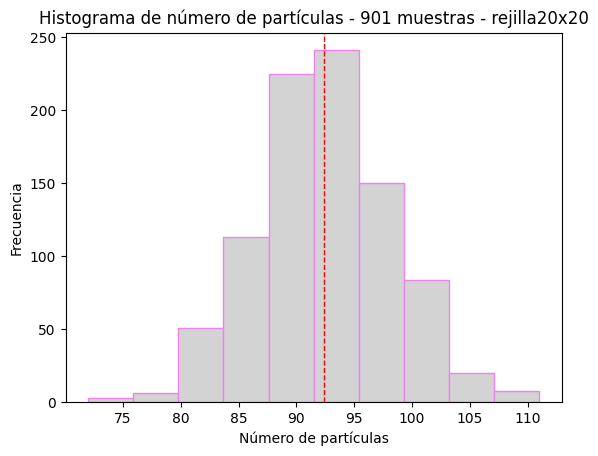

Promedio: 92.40066592674806


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


valores = [93, 103, 82, 90, 90, 99, 90, 97, 90, 95, 100, 93, 96, 82, 91, 90, 91, 83, 87, 96, 100, 97, 102, 91, 89, 101, 94, 105, 101, 91, 88, 80, 111, 96, 92, 93, 88, 82, 104, 82, 97, 94, 100, 95, 90, 95, 85, 94, 91, 83, 85, 96, 80, 93, 100, 92, 87, 95, 89, 84, 91, 88, 101, 90, 95, 99, 94, 92, 99, 83, 96, 93, 73, 89, 90, 98, 107, 90, 92, 99, 94, 99, 93, 99, 86, 100, 92, 97, 107, 77, 98, 88, 100, 80, 92, 101, 85, 99, 84, 93, 101, 97, 94, 98, 89, 88, 84, 92, 88, 83, 93, 96, 93, 90, 96, 85, 92, 86, 89, 106, 97, 99, 101, 97, 98, 92, 88, 83, 107, 94, 90, 96, 91, 91, 95, 94, 94, 88, 88, 88, 92, 95, 86, 89, 101, 87, 96, 86, 84, 96, 93, 95, 86, 91, 94, 92, 93, 100, 92, 86, 83, 97, 85, 95, 103, 81, 96, 90, 92, 86, 90, 94, 95, 99, 84, 86, 88, 77, 81, 94, 87, 91, 100, 88, 88, 90, 91, 91, 88, 91, 98, 94, 95, 84, 94, 97, 100, 102, 89, 102, 80, 84, 94, 98, 88, 91, 85, 94, 92, 99, 92, 102, 97, 85, 92, 87, 100, 100, 93, 96, 81, 93, 96, 96, 91, 91, 92, 94, 91, 90, 98, 96, 97, 83, 93, 90, 82, 89, 98, 96, 102, 87, 93, 103, 93, 92, 94, 93, 85, 101, 102, 90, 84, 81, 95, 83, 98, 99, 93, 97, 93, 92, 89, 90, 90, 93, 98, 89, 103, 98, 85, 91, 83, 98, 83, 93, 96, 93, 98, 75, 95, 92, 93, 86, 87, 88, 89, 82, 81, 97, 95, 92, 90, 80, 94, 99, 84, 100, 88, 100, 89, 93, 95, 94, 93, 95, 92, 103, 91, 85, 90, 92, 78, 90, 89, 85, 93, 91, 89, 92, 88, 99, 89, 101, 90, 89, 96, 88, 99, 88, 96, 88, 90, 96, 84, 90, 109, 97, 100, 93, 87, 96, 94, 98, 101, 90, 93, 92, 97, 93, 88, 82, 96, 90, 104, 95, 101, 93, 95, 84, 90, 83, 91, 92, 90, 99, 91, 83, 80, 89, 96, 99, 89, 93, 111, 93, 96, 96, 102, 84, 92, 91, 92, 96, 87, 82, 98, 93, 88, 101, 95, 89, 83, 97, 91, 98, 98, 92, 96, 108, 95, 97, 104, 87, 94, 85, 97, 99, 86, 86, 90, 96, 81, 88, 95, 86, 95, 102, 88, 94, 94, 93, 97, 79, 92, 84, 100, 86, 94, 100, 89, 97, 99, 92, 92, 93, 90, 92, 88, 83, 90, 94, 95, 92, 92, 93, 87, 83, 106, 86, 95, 84, 87, 88, 92, 88, 91, 87, 96, 94, 97, 96, 94, 93, 96, 94, 91, 93, 89, 84, 90, 103, 95, 92, 94, 103, 103, 100, 98, 90, 94, 89, 102, 90, 103, 89, 96, 96, 98, 91, 88, 102, 88, 87, 91, 94, 101, 95, 100, 88, 84, 89, 90, 103, 93, 98, 86, 105, 85, 93, 96, 95, 94, 110, 83, 86, 89, 92, 90, 98, 93, 101, 99, 95, 86, 91, 89, 92, 100, 81, 93, 90, 90, 85, 85, 91, 92, 91, 89, 95, 81, 88, 93, 84, 90, 108, 96, 83, 101, 100, 93, 90, 96, 87, 90, 92, 93, 94, 86, 82, 103, 84, 93, 89, 96, 90, 95, 90, 86, 83, 90, 97, 91, 87, 95, 95, 99, 96, 100, 87, 109, 91, 84, 84, 88, 97, 93, 91, 90, 93, 98, 93, 89, 83, 94, 98, 89, 96, 94, 82, 88, 80, 98, 87, 88, 88, 102, 93, 95, 92, 91, 105, 96, 90, 94, 94, 86, 84, 96, 82, 102, 92, 72, 96, 77, 98, 100, 83, 89, 90, 101, 88, 88, 87, 94, 91, 95, 79, 85, 89, 102, 93, 91, 94, 88, 94, 92, 86, 88, 88, 86, 93, 94, 90, 101, 91, 89, 95, 94, 93, 90, 90, 89, 90, 101, 87, 84, 86, 96, 86, 95, 91, 100, 94, 93, 90, 88, 86, 102, 84, 95, 80, 90, 84, 99, 95, 94, 89, 82, 94, 98, 85, 84, 88, 93, 93, 94, 94, 95, 93, 95, 90, 102, 92, 86, 101, 90, 88, 89, 96, 91, 94, 93, 95, 92, 98, 98, 88, 91, 89, 93, 85, 88, 96, 92, 102, 101, 93, 85, 92, 97, 87, 97, 102, 97, 104, 95, 85, 89, 88, 90, 87, 99, 94, 90, 87, 84, 100, 98, 99, 97, 92, 94, 87, 86, 84, 90, 93, 90, 91, 95, 92, 91, 90, 95, 105, 99, 90, 97, 89, 87, 96, 87, 91, 97, 96, 89, 95, 94, 105, 98, 88, 82, 97, 95, 89, 92, 85, 85, 88, 93, 95, 90, 94, 100, 90, 90, 94, 101, 94, 92, 98, 93, 92, 102, 89, 87, 104, 87, 88, 100, 94, 91, 88, 89, 85, 87, 88, 88, 92, 85, 105, 97, 95, 90, 96, 90, 103, 89, 91, 88, 98, 86, 97, 87, 81, 89, 86, 94, 89, 92, 98, 96, 104, 90, 104, 88, 97, 90, 85, 92, 93, 91, 98, 92, 98, 93, 91, 92, 100, 97, 99, 109, 95, 96, 90, 83, 100, 98, 85, 95, 106, 93, 94, 92, 92, 90, 100, 95, 94, 103, 97, 95, 88, 93, 97, 99, 90, 93, 100, 91, 89, 101, 98, 88, 95, 97, 104, 103, 94, 84]

promedio = np.mean(valores)


fig, ax = plt.subplots()
ax.hist(valores, color="lightgrey", edgecolor="violet")



#Promedio gráfico
ax.axvline(promedio, color='r', linestyle='dashed', linewidth=1)

# Etiquetas y título
ax.set_xlabel('Número de partículas')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de número de partículas - 901 muestras - rejilla20x20')

# Mostrar el histograma
plt.show()

# Imprimir el promedio
print("Promedio:", promedio)

#Rejilla de 15x15

In [ ]:
# Definimos los rangos para k y x
k_values = [15]
x_values = [10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800, 10900, 11000, 11100, 11200, 11300, 11400, 11500, 11600, 11700, 11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500, 12600, 12700, 12800, 12900, 13000, 13100, 13200, 13300, 13400, 13500, 13600, 13700, 13800, 13900, 14000, 14100, 14200, 14300, 14400, 14500, 14600, 14700, 14800, 14900, 15000, 15100, 15200, 15300, 15400, 15500, 15600, 15700, 15800, 15900, 16000, 16100, 16200, 16300, 16400, 16500, 16600, 16700, 16800, 16900, 17000, 17100, 17200, 17300, 17400, 17500, 17600, 17700, 17800, 17900, 18000, 18100, 18200, 18300, 18400, 18500, 18600, 18700, 18800, 18900, 19000, 19100, 19200, 19300, 19400, 19500, 19600, 19700, 19800, 19900, 20000, 20100, 20200, 20300, 20400, 20500, 20600, 20700, 20800, 20900, 21000, 21100, 21200, 21300, 21400, 21500, 21600, 21700, 21800, 21900, 22000, 22100, 22200, 22300, 22400, 22500, 22600, 22700, 22800, 22900, 23000, 23100, 23200, 23300, 23400, 23500, 23600, 23700, 23800, 23900, 24000, 24100, 24200, 24300, 24400, 24500, 24600, 24700, 24800, 24900, 25000, 25100, 25200, 25300, 25400, 25500, 25600, 25700, 25800, 25900, 26000, 26100, 26200, 26300, 26400, 26500, 26600, 26700, 26800, 26900, 27000, 27100, 27200, 27300, 27400, 27500, 27600, 27700, 27800, 27900, 28000, 28100, 28200, 28300, 28400, 28500, 28600, 28700, 28800, 28900, 29000, 29100, 29200, 29300, 29400, 29500, 29600, 29700, 29800, 29900, 30000, 30100, 30200, 30300, 30400, 30500, 30600, 30700, 30800, 30900, 31000, 31100, 31200, 31300, 31400, 31500, 31600, 31700, 31800, 31900, 32000, 32100, 32200, 32300, 32400, 32500, 32600, 32700, 32800, 32900, 33000, 33100, 33200, 33300, 33400, 33500, 33600, 33700, 33800, 33900, 34000, 34100, 34200, 34300, 34400, 34500, 34600, 34700, 34800, 34900, 35000, 35100, 35200, 35300, 35400, 35500, 35600, 35700, 35800, 35900, 36000, 36100, 36200, 36300, 36400, 36500, 36600, 36700, 36800, 36900, 37000, 37100, 37200, 37300, 37400, 37500, 37600, 37700, 37800, 37900, 38000, 38100, 38200, 38300, 38400, 38500, 38600, 38700, 38800, 38900, 39000, 39100, 39200, 39300, 39400, 39500, 39600, 39700, 39800, 39900, 40000, 40100, 40200, 40300, 40400, 40500, 40600, 40700, 40800, 40900, 41000, 41100, 41200, 41300, 41400, 41500, 41600, 41700, 41800, 41900, 42000, 42100, 42200, 42300, 42400, 42500, 42600, 42700, 42800, 42900, 43000, 43100, 43200, 43300, 43400, 43500, 43600, 43700, 43800, 43900, 44000, 44100, 44200, 44300, 44400, 44500, 44600, 44700, 44800, 44900, 45000, 45100, 45200, 45300, 45400, 45500, 45600, 45700, 45800, 45900, 46000, 46100, 46200, 46300, 46400, 46500, 46600, 46700, 46800, 46900, 47000, 47100, 47200, 47300, 47400, 47500, 47600, 47700, 47800, 47900, 48000, 48100, 48200, 48300, 48400, 48500, 48600, 48700, 48800, 48900, 49000, 49100, 49200, 49300, 49400, 49500, 49600, 49700, 49800, 49900, 50000, 50100, 50200, 50300, 50400, 50500, 50600, 50700, 50800, 50900, 51000, 51100, 51200, 51300, 51400, 51500, 51600, 51700, 51800, 51900, 52000, 52100, 52200, 52300, 52400, 52500, 52600, 52700, 52800, 52900, 53000, 53100, 53200, 53300, 53400, 53500, 53600, 53700, 53800, 53900, 54000, 54100, 54200, 54300, 54400, 54500, 54600, 54700, 54800, 54900, 55000, 55100, 55200, 55300, 55400, 55500, 55600, 55700, 55800, 55900, 56000, 56100, 56200, 56300, 56400, 56500, 56600, 56700, 56800, 56900, 57000, 57100, 57200, 57300, 57400, 57500, 57600, 57700, 57800, 57900, 58000, 58100, 58200, 58300, 58400, 58500, 58600, 58700, 58800, 58900, 59000, 59100, 59200, 59300, 59400, 59500, 59600, 59700, 59800, 59900, 60000, 60100, 60200, 60300, 60400, 60500, 60600, 60700, 60800, 60900, 61000, 61100, 61200, 61300, 61400, 61500, 61600, 61700, 61800, 61900, 62000, 62100, 62200, 62300, 62400, 62500, 62600, 62700, 62800, 62900, 63000, 63100, 63200, 63300, 63400, 63500, 63600, 63700, 63800, 63900, 64000, 64100, 64200, 64300, 64400, 64500, 64600, 64700, 64800, 64900, 65000, 65100, 65200, 65300, 65400, 65500, 65600, 65700, 65800, 65900, 66000, 66100, 66200, 66300, 66400, 66500, 66600, 66700, 66800, 66900, 67000, 67100, 67200, 67300, 67400, 67500, 67600, 67700, 67800, 67900, 68000, 68100, 68200, 68300, 68400, 68500, 68600, 68700, 68800, 68900, 69000, 69100, 69200, 69300, 69400, 69500, 69600, 69700, 69800, 69900, 70000, 70100, 70200, 70300, 70400, 70500, 70600, 70700, 70800, 70900, 71000, 71100, 71200, 71300, 71400, 71500, 71600, 71700, 71800, 71900, 72000, 72100, 72200, 72300, 72400, 72500, 72600, 72700, 72800, 72900, 73000, 73100, 73200, 73300, 73400, 73500, 73600, 73700, 73800, 73900, 74000, 74100, 74200, 74300, 74400, 74500, 74600, 74700, 74800, 74900, 75000, 75100, 75200, 75300, 75400, 75500, 75600, 75700, 75800, 75900, 76000, 76100, 76200, 76300, 76400, 76500, 76600, 76700, 76800, 76900, 77000, 77100, 77200, 77300, 77400, 77500, 77600, 77700, 77800, 77900, 78000, 78100, 78200, 78300, 78400, 78500, 78600, 78700, 78800, 78900, 79000, 79100, 79200, 79300, 79400, 79500, 79600, 79700, 79800, 79900, 80000, 80100, 80200, 80300, 80400, 80500, 80600, 80700, 80800, 80900, 81000, 81100, 81200, 81300, 81400, 81500, 81600, 81700, 81800, 81900, 82000, 82100, 82200, 82300, 82400, 82500, 82600, 82700, 82800, 82900, 83000, 83100, 83200, 83300, 83400, 83500, 83600, 83700, 83800, 83900, 84000, 84100, 84200, 84300, 84400, 84500, 84600, 84700, 84800, 84900, 85000, 85100, 85200, 85300, 85400, 85500, 85600, 85700, 85800, 85900, 86000, 86100, 86200, 86300, 86400, 86500, 86600, 86700, 86800, 86900, 87000, 87100, 87200, 87300, 87400, 87500, 87600, 87700, 87800, 87900, 88000, 88100, 88200, 88300, 88400, 88500, 88600, 88700, 88800, 88900, 89000, 89100, 89200, 89300, 89400, 89500, 89600, 89700, 89800, 89900, 90000, 90100, 90200, 90300, 90400, 90500, 90600, 90700, 90800, 90900, 91000, 91100, 91200, 91300, 91400, 91500, 91600, 91700, 91800, 91900, 92000, 92100, 92200, 92300, 92400, 92500, 92600, 92700, 92800, 92900, 93000, 93100, 93200, 93300, 93400, 93500, 93600, 93700, 93800, 93900, 94000, 94100, 94200, 94300, 94400, 94500, 94600, 94700, 94800, 94900, 95000, 95100, 95200, 95300, 95400, 95500, 95600, 95700, 95800, 95900, 96000, 96100, 96200, 96300, 96400, 96500, 96600, 96700, 96800, 96900, 97000, 97100, 97200, 97300, 97400, 97500, 97600, 97700, 97800, 97900, 98000, 98100, 98200, 98300, 98400, 98500, 98600, 98700, 98800, 98900, 99000, 99100, 99200, 99300, 99400, 99500, 99600, 99700, 99800, 99900, 100000]

particle_counts = []

for k in k_values:
    for x in x_values:
        particle_count = run_simulation(k, x)
        particle_counts.append(particle_count)

print(particle_counts)


[50, 43, 56, 58, 51, 54, 54, 57, 53, 53, 52, 49, 54, 51, 48, 51, 48, 47, 58, 52, 53, 59, 59, 40, 52, 56, 49, 54, 48, 54, 59, 55, 51, 45, 58, 55, 59, 54, 45, 50, 47, 55, 45, 50, 48, 52, 52, 50, 50, 50, 55, 52, 50, 48, 58, 60, 57, 54, 53, 54, 55, 64, 47, 54, 53, 52, 54, 49, 55, 43, 44, 49, 55, 59, 56, 55, 50, 56, 61, 46, 56, 50, 56, 55, 50, 48, 46, 45, 51, 47, 59, 51, 56, 56, 50, 46, 58, 54, 50, 52, 54, 60, 54, 49, 59, 50, 52, 51, 46, 48, 57, 54, 49, 46, 51, 54, 47, 48, 54, 56, 51, 48, 47, 48, 55, 57, 44, 52, 57, 47, 45, 55, 46, 51, 50, 52, 47, 53, 60, 56, 64, 53, 55, 48, 52, 47, 57, 56, 51, 55, 52, 48, 51, 50, 52, 52, 46, 58, 58, 50, 56, 48, 52, 61, 51, 53, 50, 61, 50, 53, 52, 54, 56, 53, 46, 57, 44, 52, 52, 59, 52, 53, 48, 58, 52, 49, 52, 60, 53, 51, 47, 49, 50, 54, 45, 46, 50, 55, 60, 52, 54, 52, 58, 57, 62, 59, 49, 50, 54, 55, 59, 47, 43, 52, 52, 55, 48, 56, 39, 51, 56, 60, 54, 53, 55, 57, 45, 53, 52, 44, 47, 50, 51, 62, 51, 51, 55, 53, 53, 47, 53, 53, 57, 56, 63, 59, 49, 44, 46, 50,

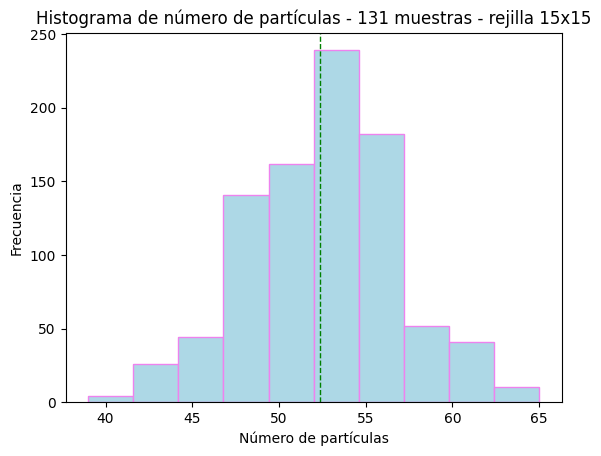

Promedio: 52.39178690344062


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


valores = [50, 43, 56, 58, 51, 54, 54, 57, 53, 53, 52, 49, 54, 51, 48, 51, 48, 47, 58, 52, 53, 59, 59, 40, 52, 56, 49, 54, 48, 54, 59, 55, 51, 45, 58, 55, 59, 54, 45, 50, 47, 55, 45, 50, 48, 52, 52, 50, 50, 50, 55, 52, 50, 48, 58, 60, 57, 54, 53, 54, 55, 64, 47, 54, 53, 52, 54, 49, 55, 43, 44, 49, 55, 59, 56, 55, 50, 56, 61, 46, 56, 50, 56, 55, 50, 48, 46, 45, 51, 47, 59, 51, 56, 56, 50, 46, 58, 54, 50, 52, 54, 60, 54, 49, 59, 50, 52, 51, 46, 48, 57, 54, 49, 46, 51, 54, 47, 48, 54, 56, 51, 48, 47, 48, 55, 57, 44, 52, 57, 47, 45, 55, 46, 51, 50, 52, 47, 53, 60, 56, 64, 53, 55, 48, 52, 47, 57, 56, 51, 55, 52, 48, 51, 50, 52, 52, 46, 58, 58, 50, 56, 48, 52, 61, 51, 53, 50, 61, 50, 53, 52, 54, 56, 53, 46, 57, 44, 52, 52, 59, 52, 53, 48, 58, 52, 49, 52, 60, 53, 51, 47, 49, 50, 54, 45, 46, 50, 55, 60, 52, 54, 52, 58, 57, 62, 59, 49, 50, 54, 55, 59, 47, 43, 52, 52, 55, 48, 56, 39, 51, 56, 60, 54, 53, 55, 57, 45, 53, 52, 44, 47, 50, 51, 62, 51, 51, 55, 53, 53, 47, 53, 53, 57, 56, 63, 59, 49, 44, 46, 50, 50, 58, 50, 46, 53, 50, 47, 56, 53, 56, 45, 53, 54, 57, 47, 55, 47, 48, 56, 55, 49, 48, 49, 52, 50, 58, 53, 53, 57, 55, 49, 58, 54, 49, 57, 51, 52, 54, 56, 50, 49, 60, 50, 63, 47, 54, 50, 44, 52, 53, 45, 57, 48, 50, 51, 51, 55, 55, 44, 58, 48, 52, 60, 53, 55, 46, 52, 45, 52, 47, 46, 49, 54, 53, 50, 56, 52, 54, 53, 50, 55, 60, 52, 52, 51, 53, 58, 45, 56, 50, 50, 55, 49, 59, 52, 47, 55, 59, 51, 53, 58, 52, 52, 50, 54, 52, 49, 56, 51, 60, 50, 51, 56, 50, 52, 52, 48, 57, 55, 49, 56, 55, 56, 50, 55, 51, 53, 59, 50, 56, 49, 55, 57, 60, 51, 55, 48, 56, 51, 48, 45, 50, 54, 48, 49, 46, 50, 47, 48, 54, 54, 56, 56, 47, 48, 48, 44, 48, 48, 50, 56, 55, 55, 54, 52, 58, 57, 47, 56, 45, 53, 53, 61, 40, 52, 50, 54, 46, 55, 53, 61, 54, 52, 60, 57, 45, 52, 54, 54, 48, 55, 60, 55, 50, 46, 40, 49, 52, 57, 56, 48, 51, 50, 55, 48, 54, 47, 50, 57, 44, 51, 53, 52, 53, 46, 47, 54, 51, 50, 52, 56, 60, 48, 54, 51, 50, 55, 52, 51, 56, 53, 44, 47, 53, 51, 49, 48, 50, 52, 50, 60, 55, 54, 52, 55, 51, 50, 50, 51, 52, 48, 51, 53, 51, 61, 53, 53, 47, 52, 48, 57, 57, 55, 59, 58, 43, 48, 51, 55, 56, 54, 54, 52, 53, 56, 48, 53, 51, 49, 52, 45, 62, 52, 54, 47, 53, 52, 61, 52, 49, 57, 59, 50, 55, 54, 49, 53, 48, 63, 55, 48, 53, 58, 51, 56, 48, 56, 60, 43, 46, 51, 60, 53, 51, 50, 47, 49, 51, 43, 55, 50, 52, 54, 54, 48, 47, 55, 50, 47, 53, 55, 50, 55, 55, 55, 50, 55, 55, 50, 52, 60, 54, 49, 57, 49, 57, 56, 52, 56, 53, 44, 52, 61, 52, 53, 57, 55, 54, 54, 51, 56, 55, 51, 54, 51, 52, 59, 54, 52, 54, 50, 51, 59, 42, 51, 48, 50, 46, 43, 47, 51, 54, 49, 48, 51, 54, 50, 53, 61, 57, 54, 47, 55, 50, 47, 56, 44, 50, 52, 47, 53, 47, 50, 56, 53, 53, 56, 51, 55, 58, 60, 50, 53, 50, 54, 55, 58, 56, 52, 53, 49, 50, 57, 55, 54, 57, 49, 53, 58, 56, 49, 54, 45, 57, 52, 50, 52, 51, 48, 54, 48, 52, 53, 48, 55, 51, 45, 53, 53, 55, 42, 56, 49, 57, 54, 61, 51, 51, 56, 59, 58, 45, 56, 52, 49, 52, 52, 55, 50, 49, 49, 47, 48, 50, 60, 50, 53, 52, 61, 54, 54, 57, 63, 54, 50, 48, 57, 49, 52, 48, 56, 50, 50, 49, 53, 53, 48, 57, 48, 51, 58, 54, 61, 50, 50, 47, 58, 44, 59, 57, 50, 47, 51, 43, 54, 45, 54, 48, 65, 45, 50, 46, 54, 49, 54, 53, 50, 53, 58, 49, 51, 57, 55, 50, 54, 54, 55, 57, 56, 54, 55, 55, 56, 50, 57, 50, 52, 53, 53, 50, 57, 57, 51, 50, 62, 55, 49, 53, 56, 59, 50, 55, 51, 52, 50, 50, 54, 56, 57, 52, 47, 61, 61, 47, 58, 52, 50, 52, 56, 50, 58, 51, 50, 55, 48, 43, 56, 54, 45, 51, 55, 53, 59, 55, 53, 58, 50, 49, 50, 55, 57, 53, 63, 57, 51, 53, 47, 56, 48, 53, 56, 42, 49, 59, 55, 52, 56, 54, 50, 52, 54, 52, 47, 53, 46, 56, 54, 55, 55, 61, 61, 50, 53, 56, 52, 65, 50, 49, 64, 44, 59, 61, 46, 53, 54, 53, 51, 52, 45, 56, 55]


promedio = np.mean(valores)


fig, ax = plt.subplots()
ax.hist(valores, color="lightblue", edgecolor="violet")



#Promedio gráfico
ax.axvline(promedio, color='g', linestyle='dashed', linewidth=1)

# Etiquetas y título
ax.set_xlabel('Número de partículas')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de número de partículas - 131 muestras - rejilla 15x15')

# Mostrar el histograma
plt.show()

# Imprimir el promedio
print("Promedio:", promedio)

# Cambio de histograma con valores de {$X_{t}$} distintos

In [ ]:
# Definimos los rangos para k y x
k_values = [15]
x_values = [1, 1001, 2001, 3001, 4001, 5001, 6001, 7001, 8001, 9001, 10001, 11001, 12001, 13001, 14001, 15001, 16001, 17001, 18001, 19001, 20001, 21001, 22001, 23001, 24001, 25001, 26001, 27001, 28001, 29001, 30001, 31001, 32001, 33001, 34001, 35001, 36001, 37001, 38001, 39001, 40001, 41001, 42001, 43001, 44001, 45001, 46001, 47001, 48001, 49001]


particle_counts = []

for k in k_values:
    for x in x_values:
        particle_count = run_simulation(k, x)
        particle_counts.append(particle_count)

print(particle_counts)


[1, 53, 53, 61, 42, 48, 50, 55, 48, 45, 51, 64, 50, 55, 51, 48, 50, 51, 63, 58, 53, 55, 54, 59, 54, 51, 56, 53, 54, 51, 51, 58, 53, 53, 48, 53, 55, 53, 49, 54, 48, 48, 48, 52, 53, 53, 55, 59, 49, 45]


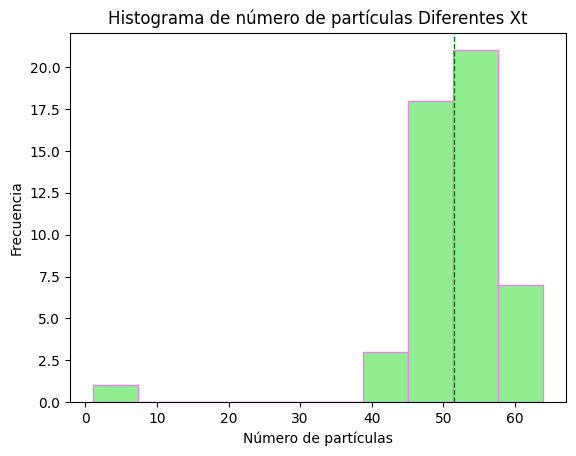

Promedio: 51.48


In [2]:
import numpy as np
import matplotlib.pyplot as plt


valores = [1, 53, 53, 61, 42, 48, 50, 55, 48, 45, 51, 64, 50, 55, 51, 48, 50, 51, 63, 58, 53, 55, 54, 59, 54, 51, 56, 53, 54, 51, 51, 58, 53, 53, 48, 53, 55, 53, 49, 54, 48, 48, 48, 52, 53, 53, 55, 59, 49, 45]


promedio = np.mean(valores)


fig, ax = plt.subplots()
ax.hist(valores, color="lightgreen", edgecolor="violet")



#Promedio gráfico
ax.axvline(promedio, color='g', linestyle='dashed', linewidth=1)

# Etiquetas y título
ax.set_xlabel('Número de partículas')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de número de partículas Diferentes Xt')

# Mostrar el histograma
plt.show()

# Imprimir el promedio
print("Promedio:", promedio)

#Conclusiones


* Se obtuvo que la cantidad de particulas que hacen que la regilla sea factible en promedio es de 92.4 , es decir numero "Típico" de particulas es del 23% respecto a $k$ (número total de particulas)
* Es interesante observar que a mayor numero de muestras la grafica se acerca mas a la forma de la distrubución uniforme , justo lo que resolvimos en el ejercicio 1

*   Es posible notar que a medida que $X$ aumenta la distribución tiende a concentrase mas alrededor de ciertos valores típicos , es decir el intervalo de tiempo en el que generemos nuestras mustras afecta significativamente el valor "tipico" en el que nuestra rejilla es satisfactible




---



#3. Replicar lo hecho en $1$ para q-coloraciones. ($2 \leq q \leq 10, 3 \leq k \leq 20$)

In [ ]:
def is_valid_assignment(graph, node, color, assignment):
  # verifica si es valido
    for neighbor in graph.neighbors(node):
        if assignment.get(neighbor, -1) == color:
            return False
    return True

In [ ]:
def gibbs_sampling(graph, num_colors, num_iterations, num_visualizations, stuck_threshold):
    # Algoritmo de Gibbs

    # inicializar grafo
    color_assignment = {node: random.randint(0, num_colors - 1) for node in graph.nodes()}

    iterations_to_visualize = sorted(random.sample(range(num_iterations), num_visualizations))

    visualization_states = []

    # Si se queda atascado reiniciar el grafo
    stuck_counter = 0

    for i in range(num_iterations):
        node = random.choice(list(graph.nodes()))
        colors = list(range(num_colors))
        random.shuffle(colors)


        found_new_color = False
        for color in colors:
            if is_valid_assignment(graph, node, color, color_assignment):
                color_assignment[node] = color
                found_new_color = True
                stuck_counter = 0
                break


        if not found_new_color:
            stuck_counter += 1
            if stuck_counter >= stuck_threshold:

                print(f"Stuck at iteration {i}, re-randomizing colors.")
                color_assignment = {node: random.randint(0, num_colors - 1) for node in graph.nodes()}
                stuck_counter = 0

        if i in iterations_to_visualize:
            visualization_states.append((i, dict(color_assignment)))

    return visualization_states

In [ ]:
def visualize_coloring(graph, visualization_states):
    # Visualizar grafos
    for iteration, assignment in visualization_states:
        plt.figure(figsize=(8, 8))
        color_map = [assignment[node] for node in graph.nodes()]
        pos = nx.spring_layout(graph, seed=42)
        nx.draw(graph, pos, node_color=color_map, with_labels=True, cmap=plt.cm.jet)
        plt.title(f'Grafo en la iteración: {iteration}')
        plt.show()

Ahora veamos algunas ejecuciones para valores de nodos($n$), $q$ y $X$ distintos:

Para  $n=4$ ,  $q=3$  y  $X=100$

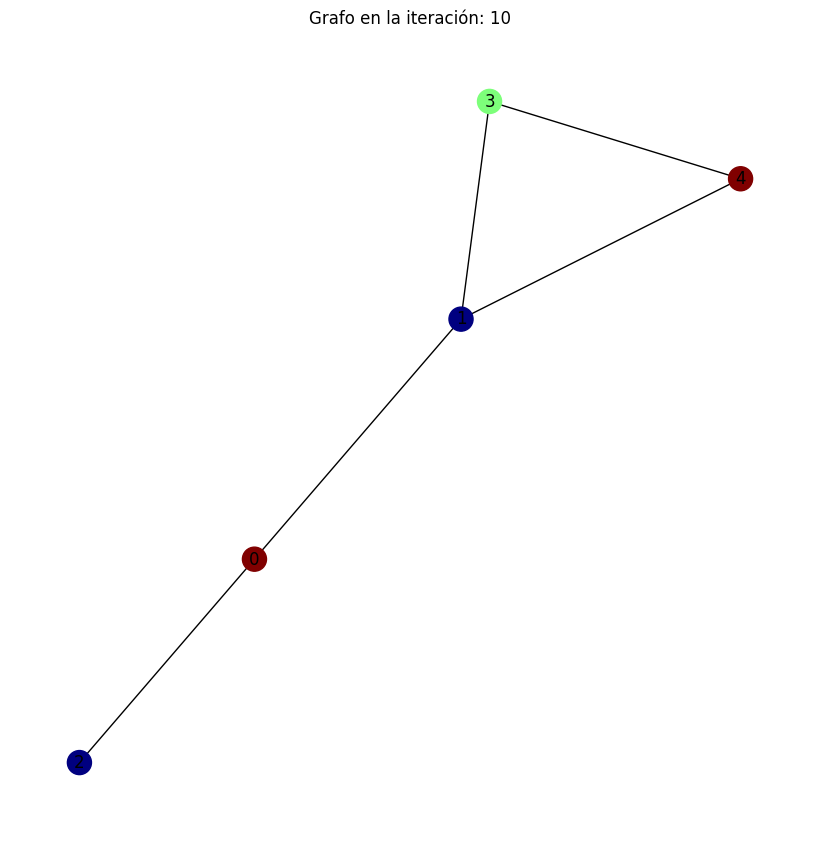

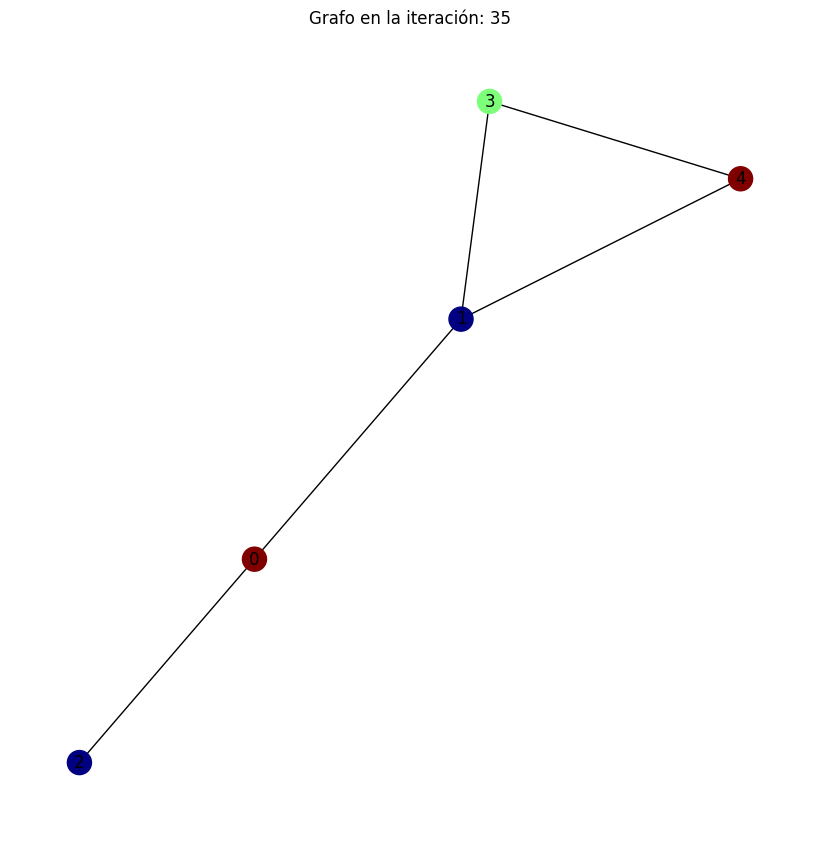

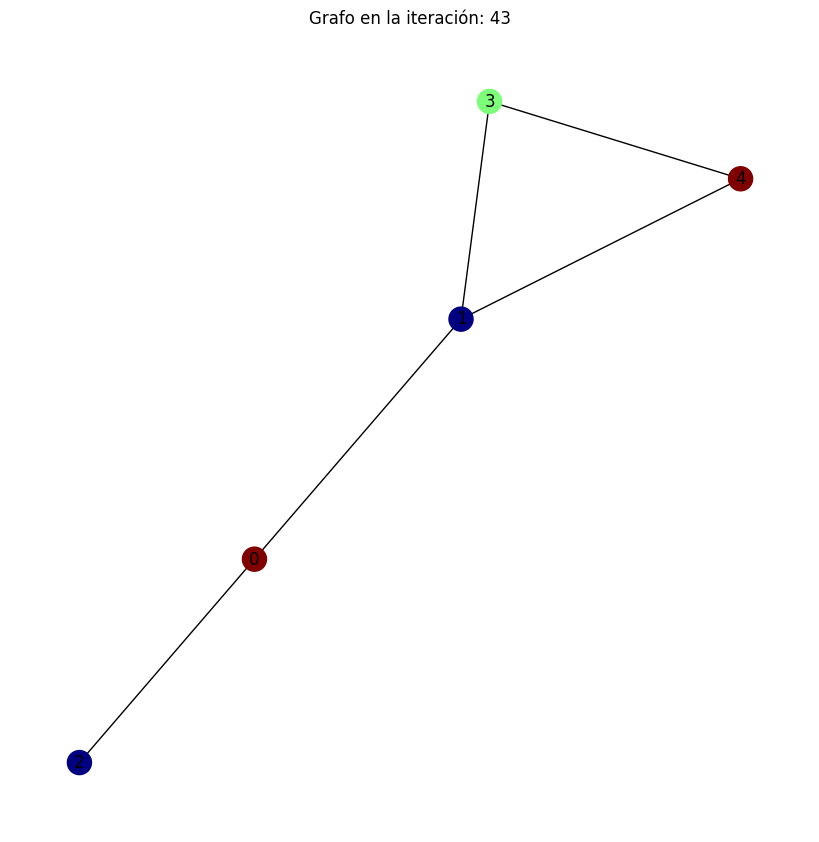

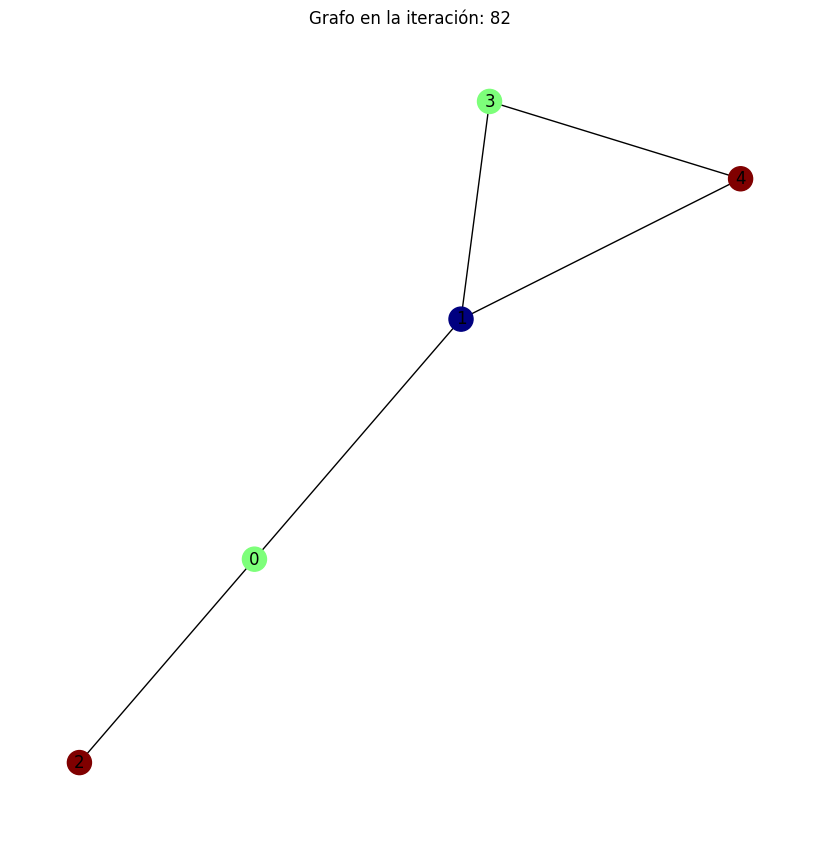

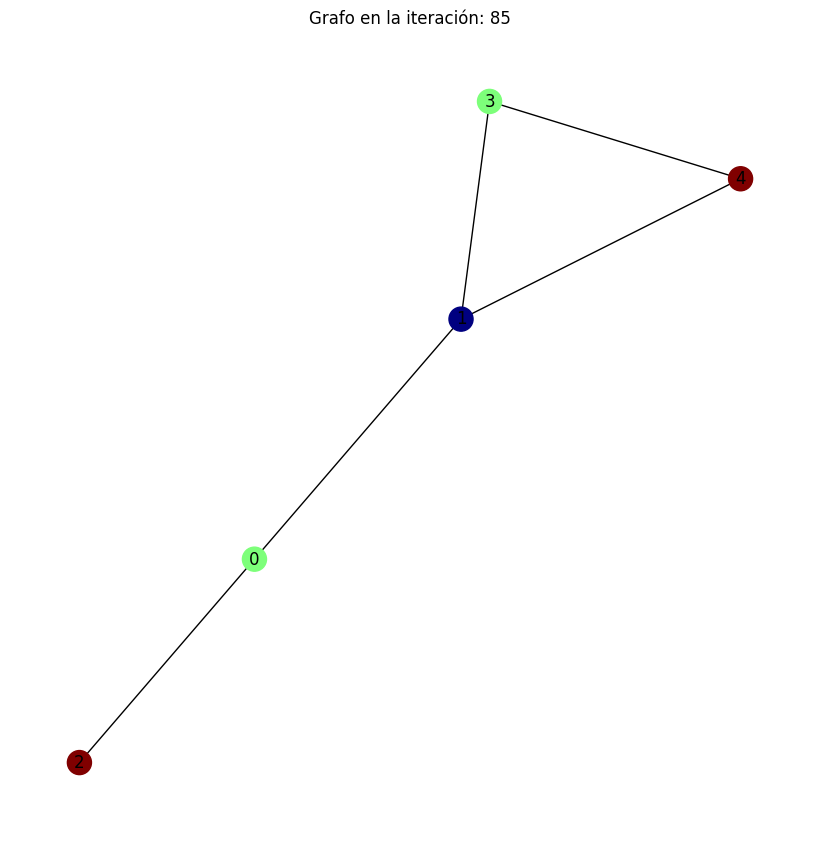

In [ ]:
# Parametros
num_nodes = 5  # Número de nodos
num_colors = 3  # q
num_iterations = 100  # Número de iteraciones
num_visualizations = 5  # Número de visualizaciones
stuck_threshold = 10  # Umbral para reiniciar el grafo por si se que atascado

G = nx.connected_watts_strogatz_graph(n=num_nodes, k=3, p=0.5, tries=100, seed=42)

visualization_states = gibbs_sampling(G, num_colors, num_iterations, num_visualizations, stuck_threshold)

visualize_coloring(G, visualization_states)


Para $n = 5$, $q=3$ y $X=5000$

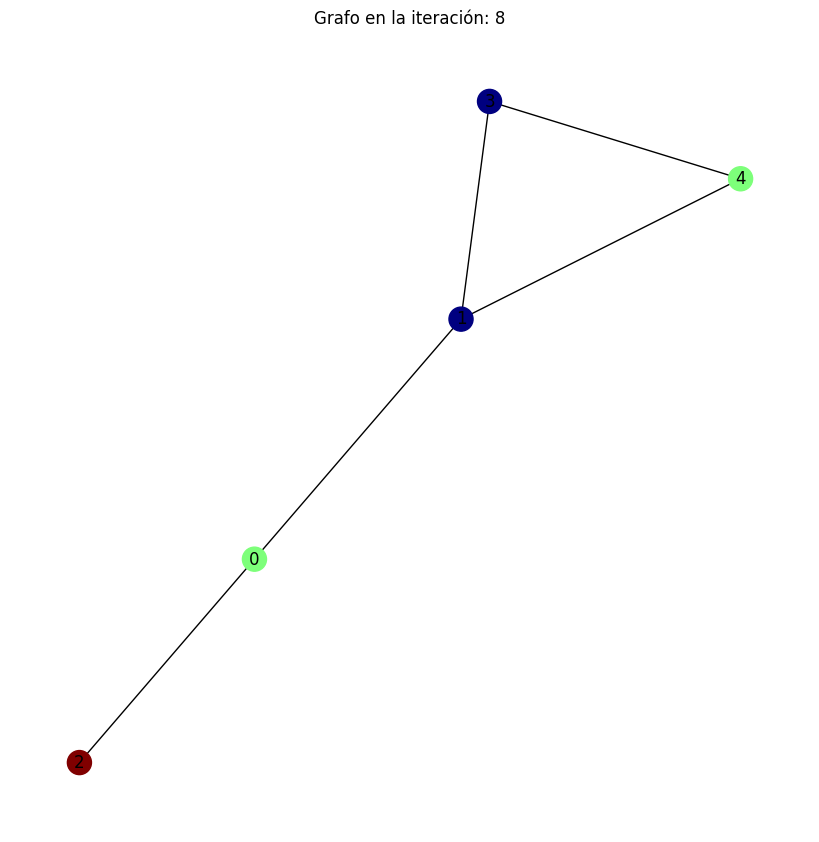

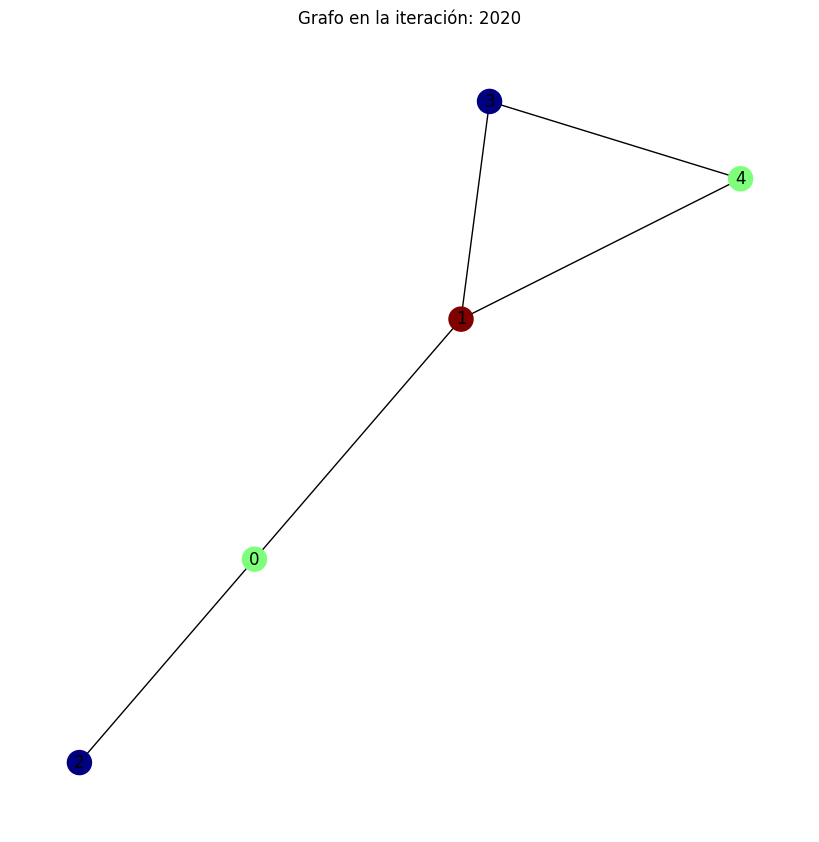

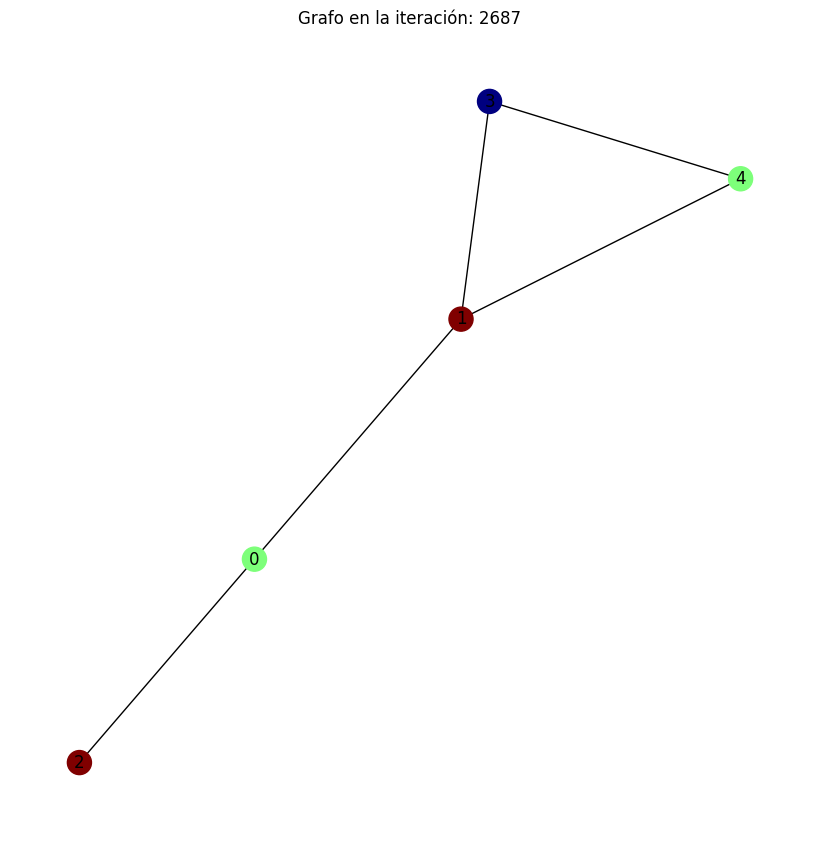

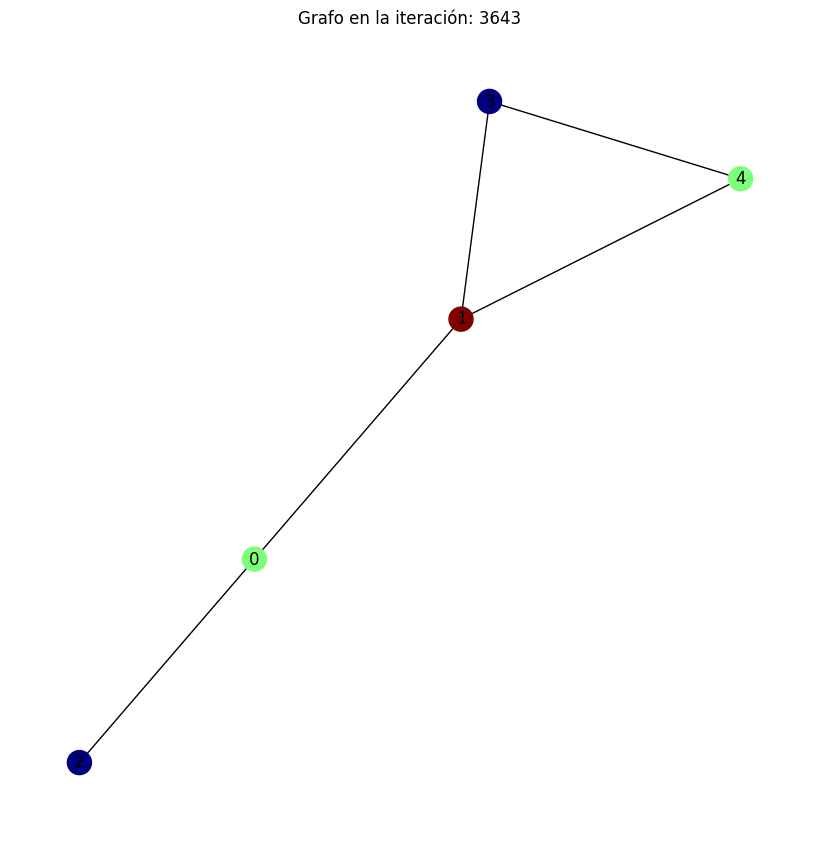

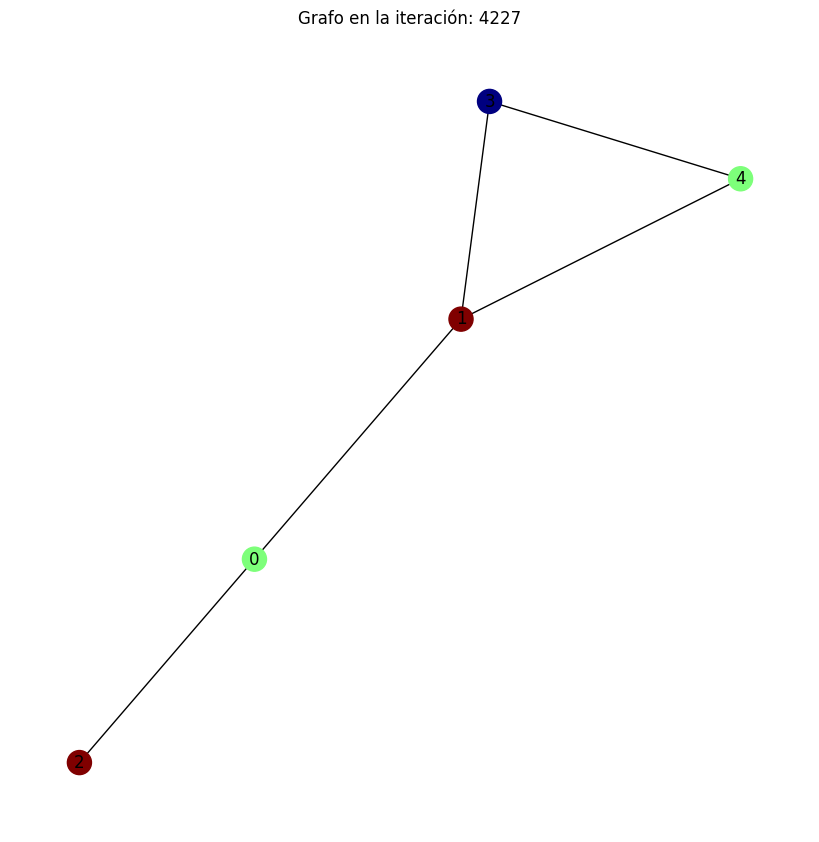

In [ ]:
# Parametros
num_nodes = 5  # Número de nodos
num_colors = 3  # q
num_iterations = 5000  # Número de iteraciones
num_visualizations = 5  # Número de visualizaciones
stuck_threshold = 10  # Umbral para reiniciar el grafo por si se que atascado

G = nx.connected_watts_strogatz_graph(n=num_nodes, k=3, p=0.5, tries=100, seed=42)

visualization_states = gibbs_sampling(G, num_colors, num_iterations, num_visualizations, stuck_threshold)

visualize_coloring(G, visualization_states)


Para $n=10$, $q=3$ y $X=5000$

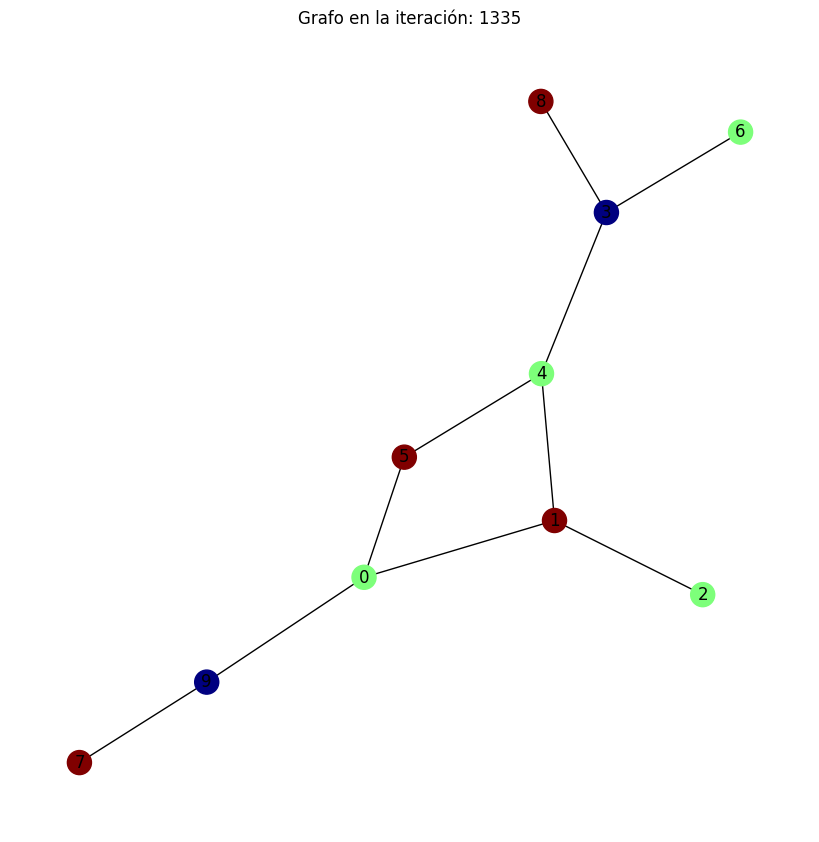

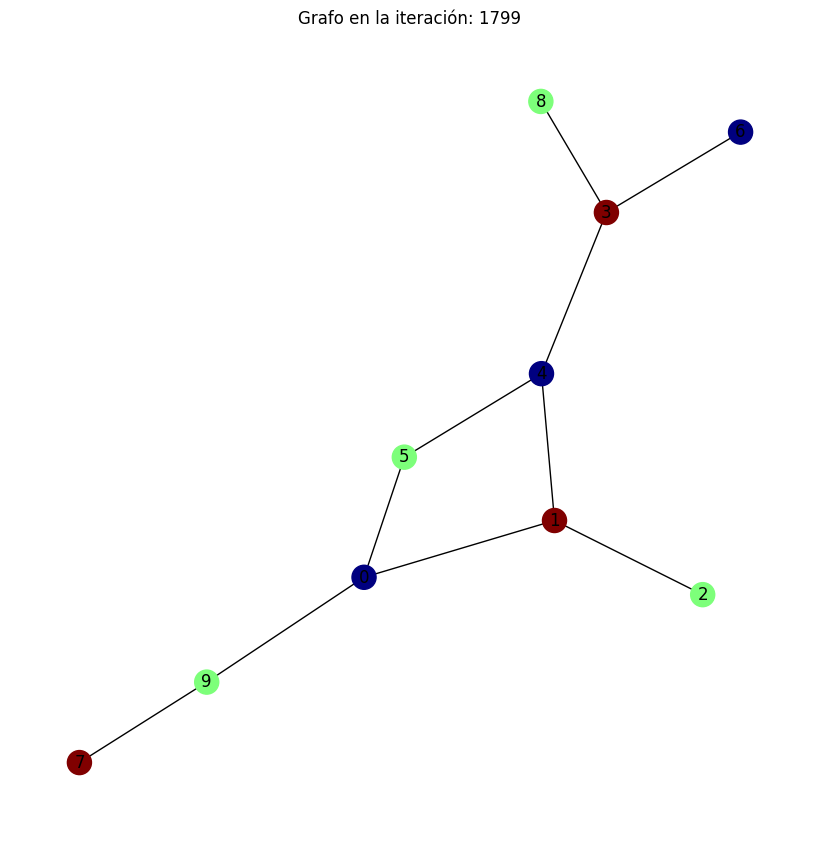

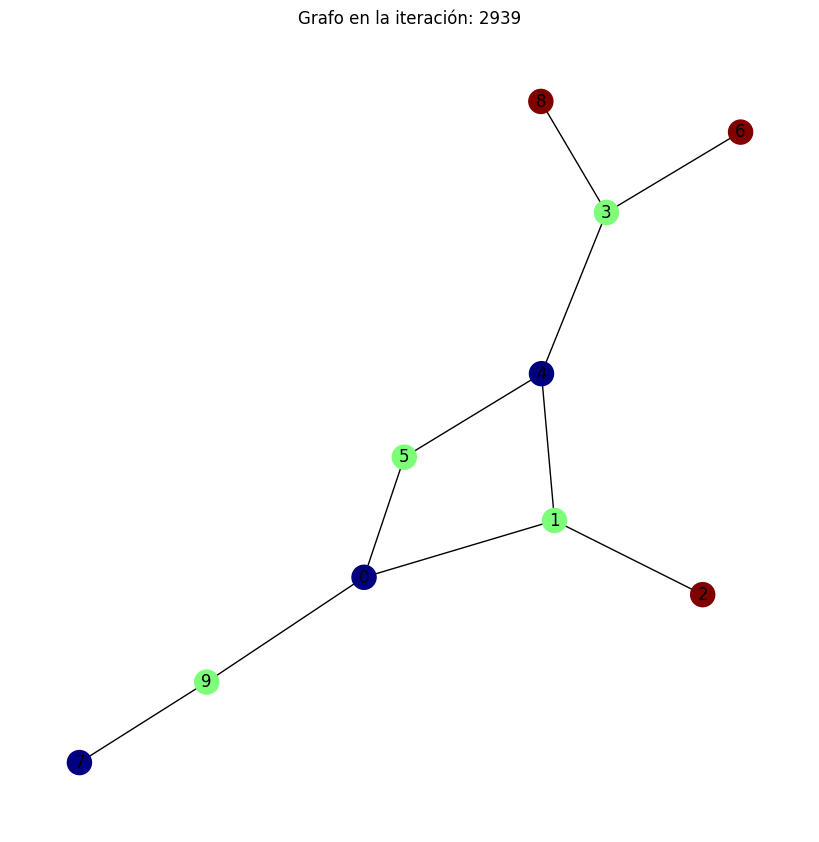

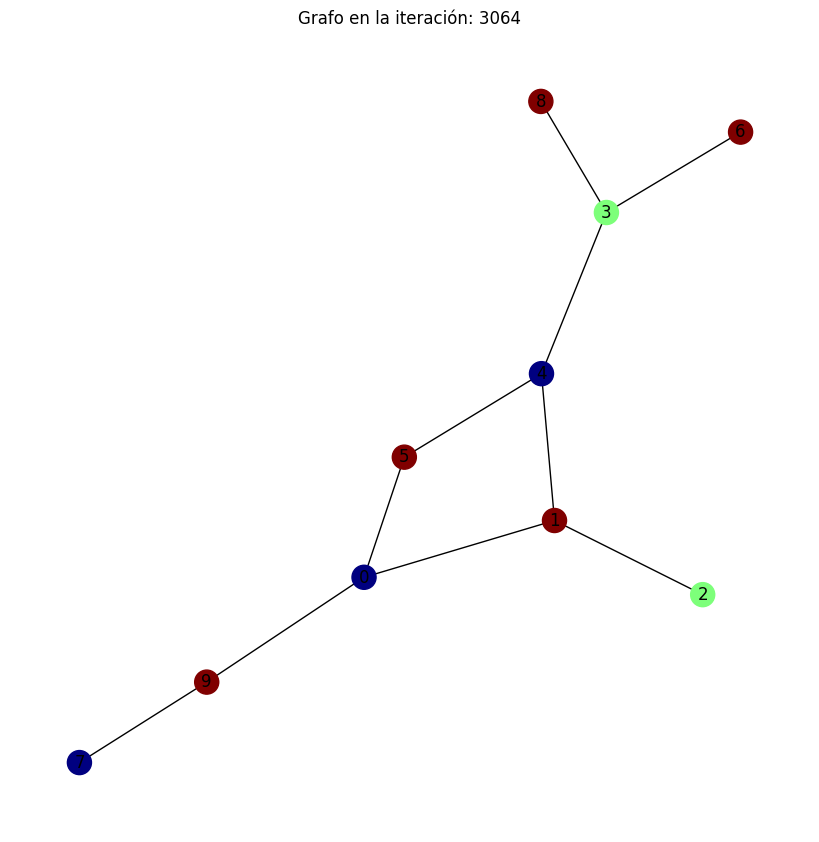

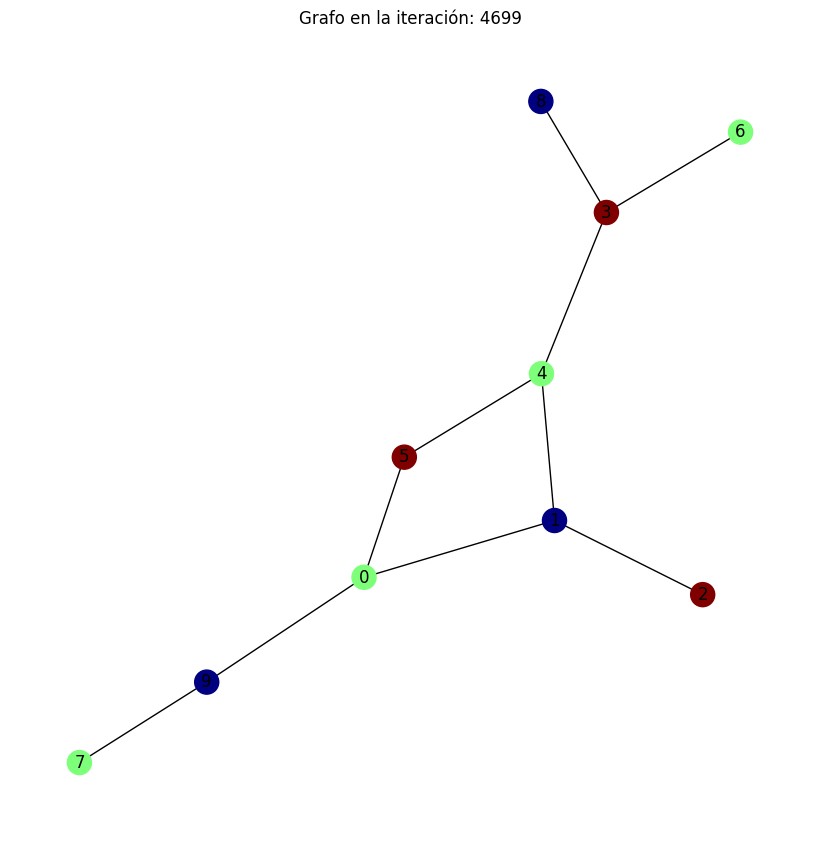

In [ ]:
# Parametros
num_nodes = 10  # Número de nodos
num_colors = 3  # q
num_iterations = 5000  # Número de iteraciones
num_visualizations = 5  # Número de visualizaciones
stuck_threshold = 100  # Umbral para reiniciar el grafo por si se que atascado

G = nx.connected_watts_strogatz_graph(n=num_nodes, k=3, p=0.5, tries=100, seed=42)

visualization_states = gibbs_sampling(G, num_colors, num_iterations, num_visualizations, stuck_threshold)

visualize_coloring(G, visualization_states)

Para $n=15$, $q=6$ y $X=10000$

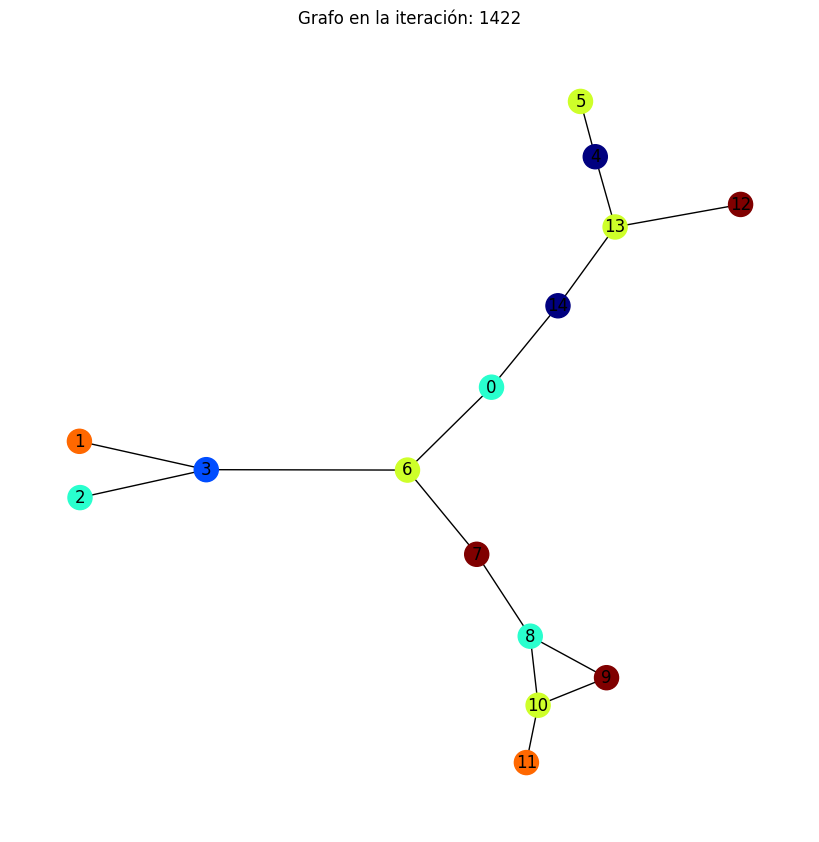

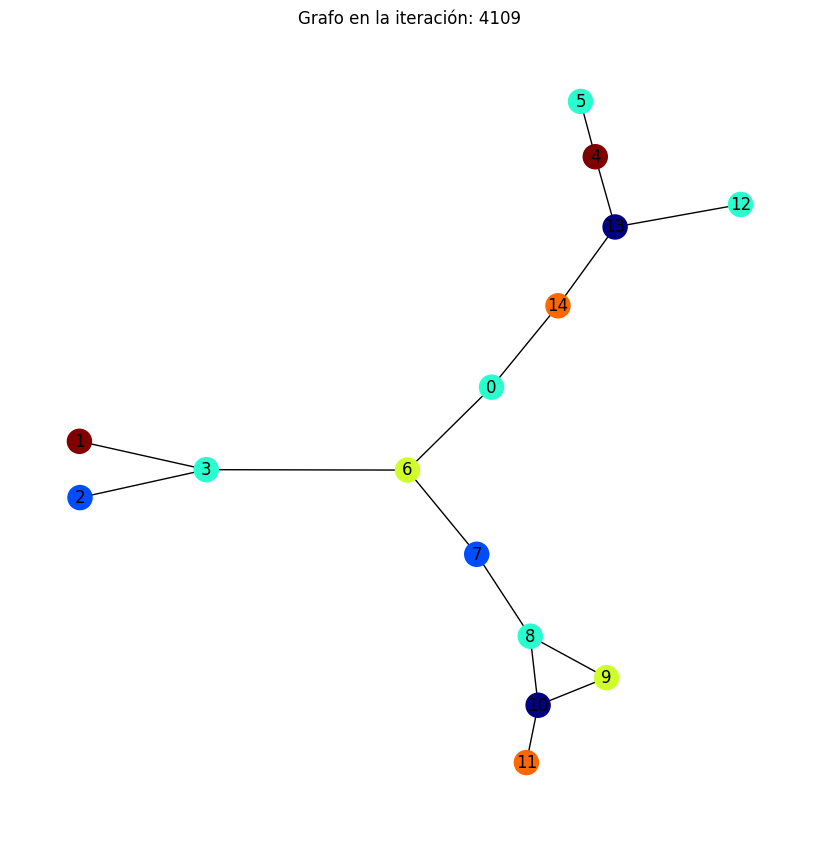

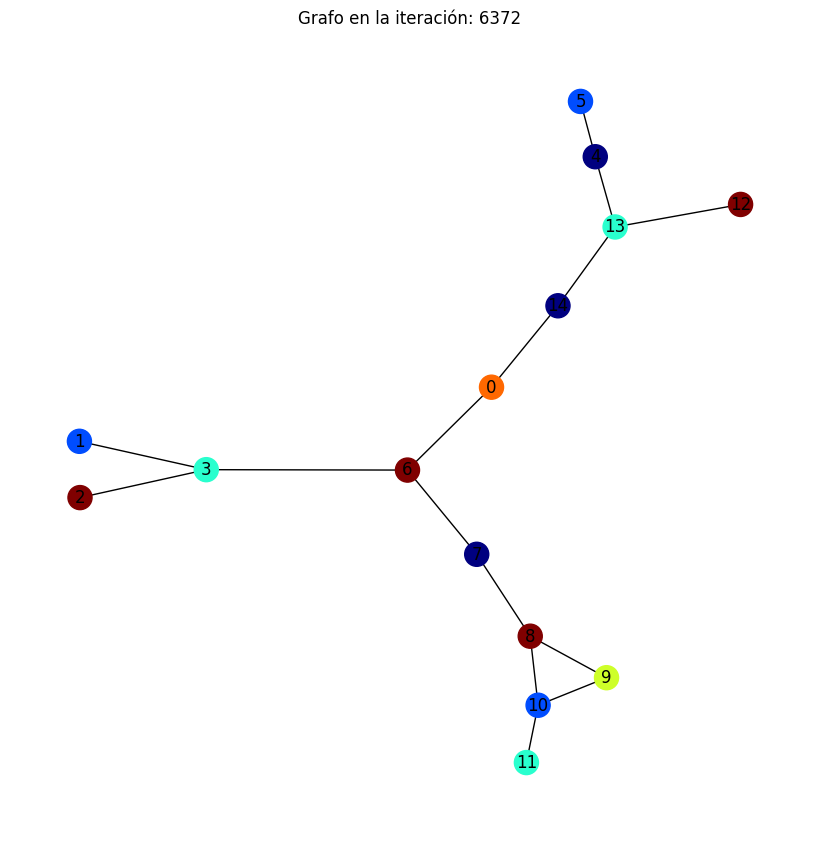

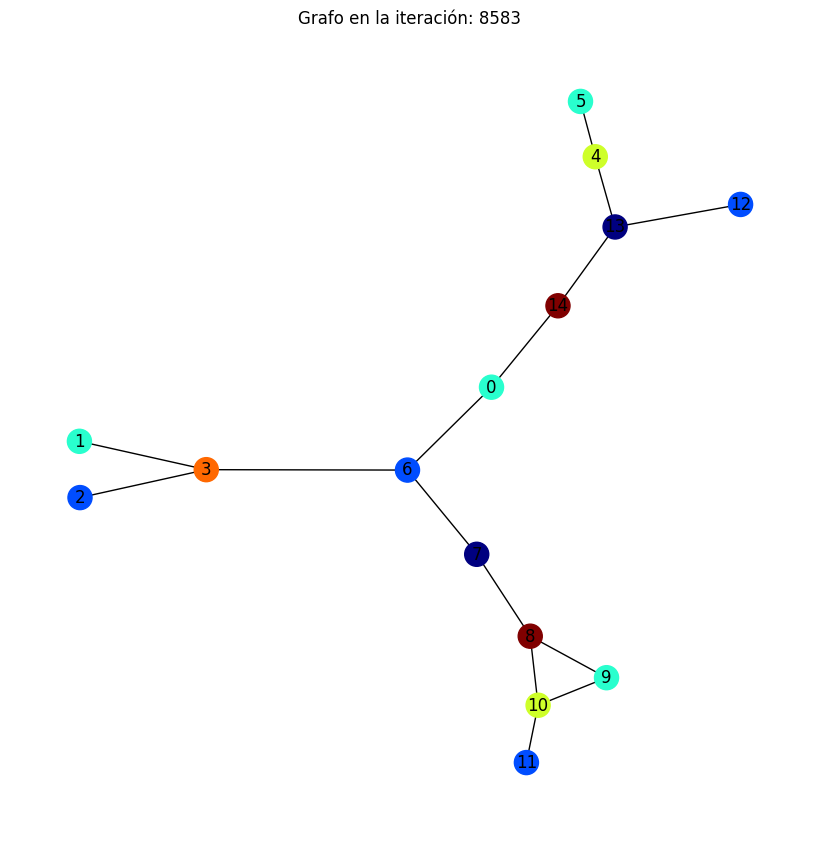

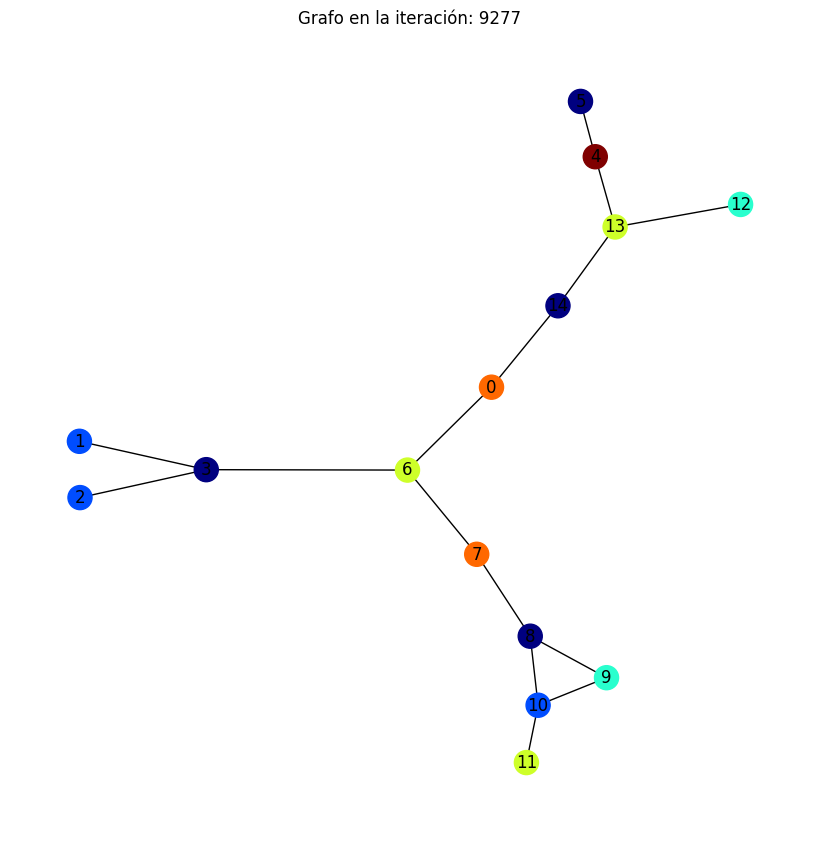

In [ ]:
# Parametros
num_nodes = 15  # Número de nodos
num_colors = 6  # q
num_iterations = 10000  # Número de iteraciones
num_visualizations = 5  # Número de visualizaciones
stuck_threshold = 100  # Umbral para reiniciar el grafo por si se que atascado

G = nx.connected_watts_strogatz_graph(n=num_nodes, k=3, p=0.5, tries=100, seed=42)

visualization_states = gibbs_sampling(G, num_colors, num_iterations, num_visualizations, stuck_threshold)

visualize_coloring(G, visualization_states)

Para $n=20$, $q = 10$ y $X=10000$

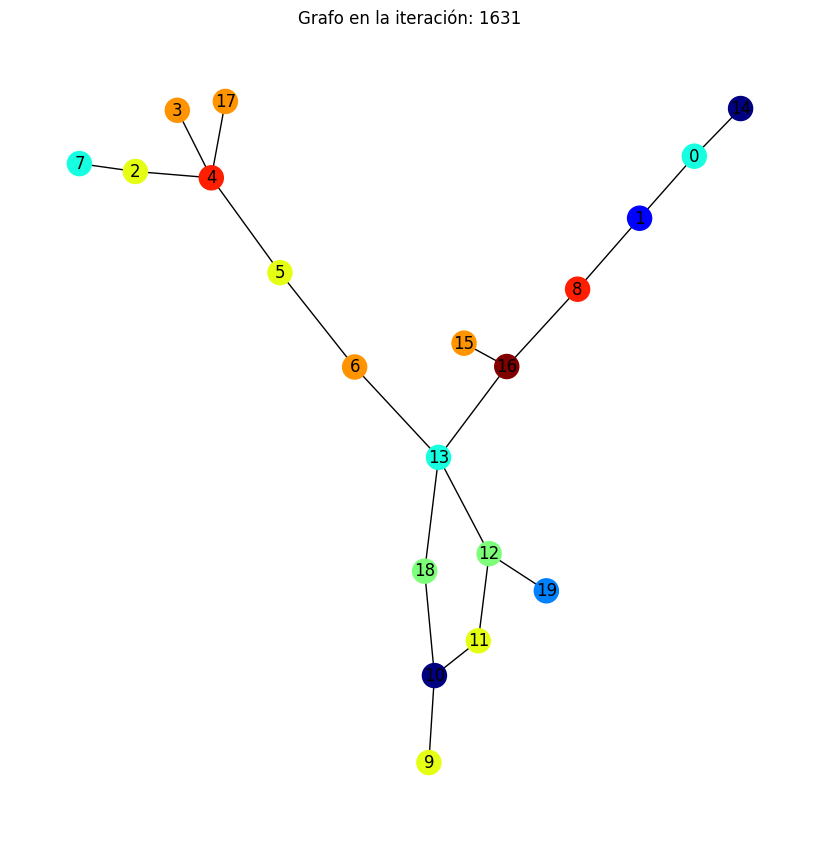

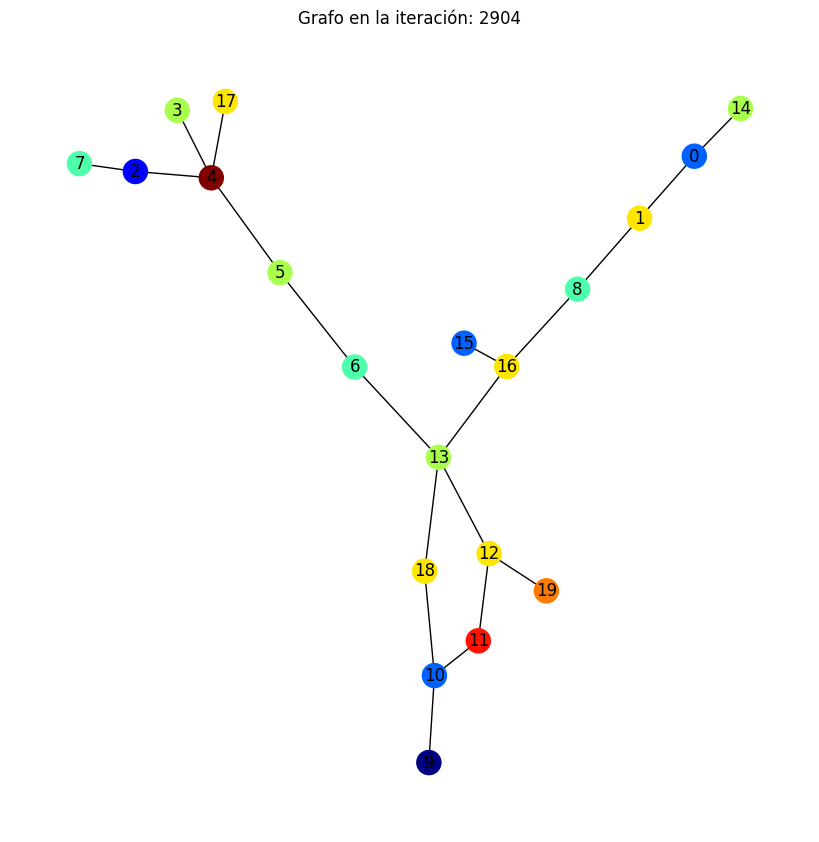

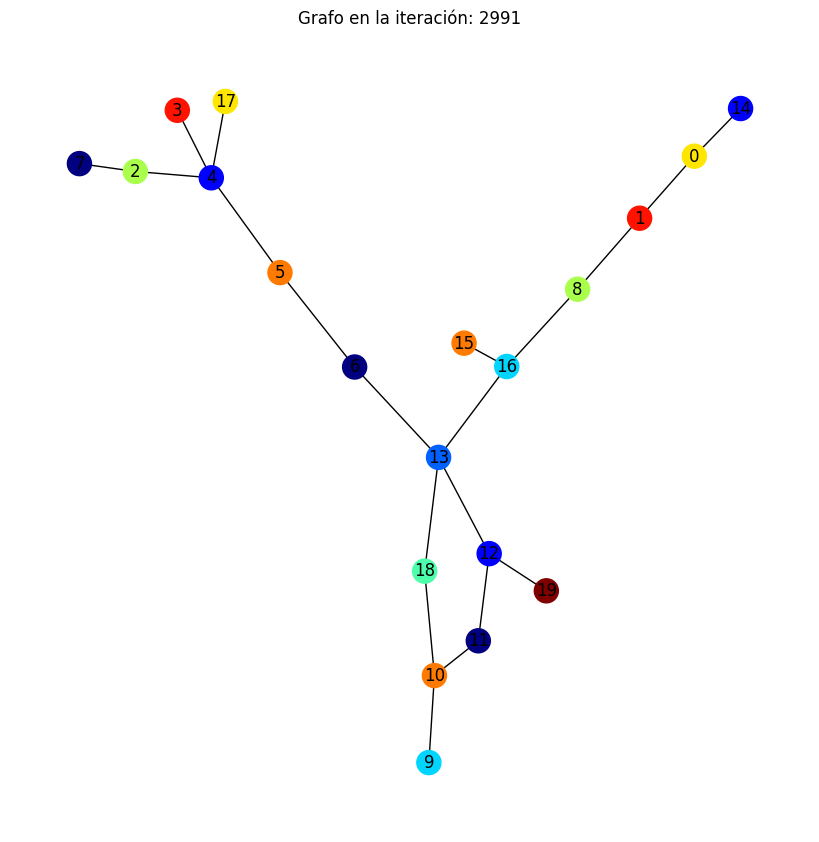

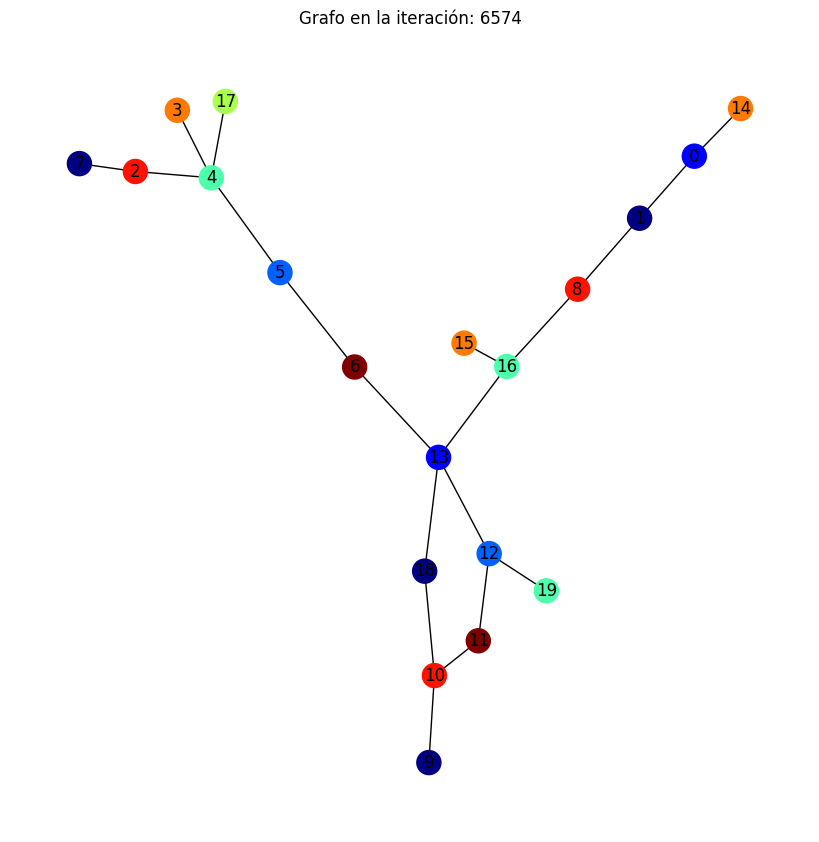

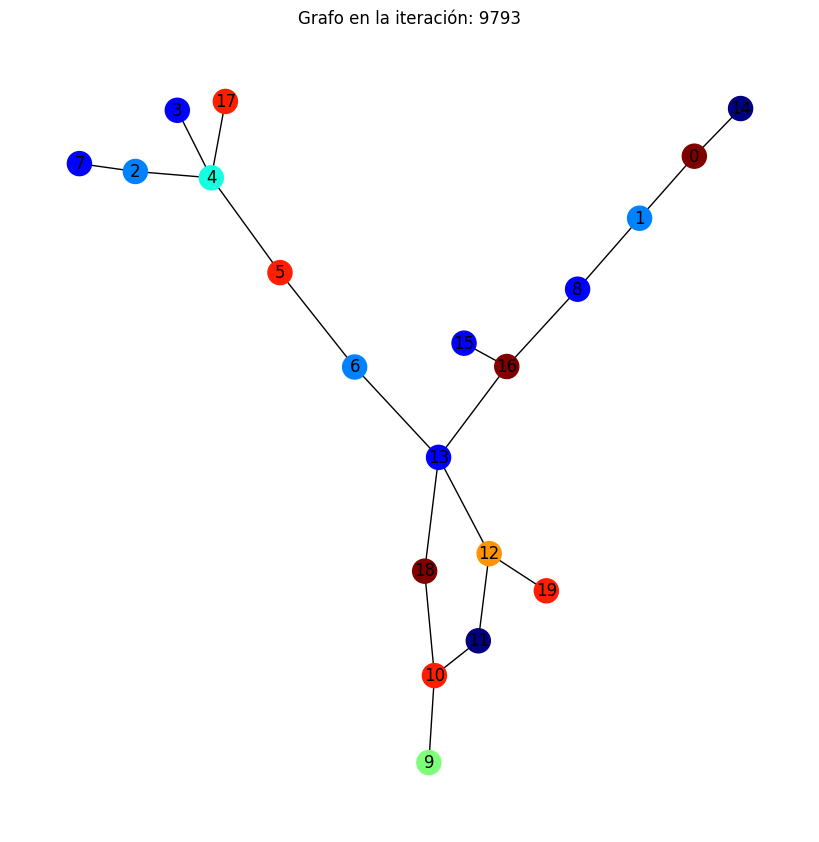

In [ ]:
# Parametros
num_nodes = 20  # Número de nodos
num_colors = 10  # q
num_iterations = 10000  # Número de iteraciones
num_visualizations = 5  # Número de visualizaciones
stuck_threshold = 100  # Umbral para reiniciar el grafo por si se que atascado

G = nx.connected_watts_strogatz_graph(n=num_nodes, k=3, p=0.5, tries=100, seed=42)

visualization_states = gibbs_sampling(G, num_colors, num_iterations, num_visualizations, stuck_threshold)

visualize_coloring(G, visualization_states)

# Conclusiones parciales



*   El algoritmo de Gibbs Sampling es efectivo para explorar el espacio de estados de coloraciones posibles en grafos. A pesar de las restricciones impuestas por las reglas de q-coloración, el método puede navegar por diferentes configuraciones y encontrar soluciones válidas.Aunque algunas veces debido a la complejidad del problema se atasca en algunas configuraciones, sobretodo en el problema NP-hard de 3-coloraciones.

*  La utilización de Cadenas de Markov asegura que, dada suficiente cantidad de tiempo (iteraciones), el proceso convergerá hacia una distribución estacionaria. Esta distribución representa las probabilidades de todas las configuraciones de coloración válidas del grafo en equilibrio.

* La cantidad de colores disponibles influye significativamente en la velocidad de convergencia y en la calidad de la solución encontrada. Con más colores disponibles, es más probable encontrar rápidamente una coloración válida, pero el espacio de búsqueda también es más grande, lo que podría requerir más iteraciones para una exploración adecuada.



